<a href="https://colab.research.google.com/github/Nair987/MSc-Project-/blob/main/MScProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the necessary libraries

In [36]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#Taking CSV file from google drive

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Performing Exploratory Data Analysis

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/creditcard.csv')
df.head()

Time        V1        V2       V3        V4        V5        V6  \
0 0.000000 -1.359807 -0.072781 2.536347  1.378155 -0.338321  0.462388   
1 0.000000  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361   
2 1.000000 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499   
3 1.000000 -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203   
4 2.000000 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28     Amount    Class  
0 -0.021053 149.620000 0.000000  
1  0.014724   2.690000 0.000000  
2 -0.059752 378.660000 0.000000  
3  0.061458 123.500000 0.000000  
4  0.215153  69.990000 0.000000

#Lisitng out the Columnn Names

In [39]:
column_list = (list(df.columns))
print(column_list)


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


#Identifying the different datatypes present in the dataframe

In [40]:
print("Data types of the columns in the data frame:", df.dtypes)

Data types of the columns in the data frame: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


In [41]:
print("Shape of the data frame:", df.shape)

Shape of the data frame: (284617, 31)


#Observing the detailed information about the dataframe

In [42]:
print("Information about the data frame:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284617 entries, 0 to 284616
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20406 non-null  float64
 1   V1      20406 non-null  float64
 2   V2      20406 non-null  float64
 3   V3      20406 non-null  float64
 4   V4      20406 non-null  float64
 5   V5      20406 non-null  float64
 6   V6      20406 non-null  float64
 7   V7      20406 non-null  float64
 8   V8      20406 non-null  float64
 9   V9      20406 non-null  float64
 10  V10     20406 non-null  float64
 11  V11     20406 non-null  float64
 12  V12     20406 non-null  float64
 13  V13     20406 non-null  float64
 14  V14     20406 non-null  float64
 15  V15     20406 non-null  float64
 16  V16     20406 non-null  float64
 17  V17     20406 non-null  float64
 18  V18     20406 non-null  float64
 19  V19     20406 non-null  float64
 20  V20     20406 non-null  float64
 21  V21     20406 non-null  float64
 

#Handling Missing Values

**Checking for any missing values present in each columns**

In [43]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Total   Percent
Time    264211 92.830365
V16     264211 92.830365
Amount  264211 92.830365
V28     264211 92.830365
V27     264211 92.830365
V26     264211 92.830365
V25     264211 92.830365
V24     264211 92.830365
V23     264211 92.830365
V22     264211 92.830365
V21     264211 92.830365
V20     264211 92.830365
V19     264211 92.830365
V18     264211 92.830365
V17     264211 92.830365
V15     264211 92.830365
V1      264211 92.830365
V14     264211 92.830365
V13     264211 92.830365
V12     264211 92.830365
V11     264211 92.830365
V10     264211 92.830365
V9      264211 92.830365
V8      264211 92.830365
V7      264211 92.830365
V6      264211 92.830365
V5      264211 92.830365
V4      264211 92.830365
V3      264211 92.830365
V2      264211 92.830365
Class   264211 92.830365

##As we have seen there are missing values in the dataset. First we drop remove the missing values.##

In [44]:
df = df.dropna()

In [45]:
df

Time        V1        V2        V3        V4        V5  \
0           0.000000 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1           0.000000  1.191857  0.266151  0.166480  0.448154  0.060018   
2           1.000000 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3           1.000000 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4           2.000000 -1.158233  0.877737  1.548718  0.403034 -0.407193   
...              ...       ...       ...       ...       ...       ...   
279863 169142.000000 -1.927883  1.125653 -4.518331  1.749293 -1.566487   
280143 169347.000000  1.378559  1.289381 -5.004247  1.411850  0.442581   
280149 169351.000000 -0.676143  1.126366 -2.213700  0.468308 -1.120541   
281144 169966.000000 -3.113832  0.585864 -5.399730  1.817092 -0.840618   
281674 170348.000000  1.991976  0.158476 -2.583441  0.408670  1.151147   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801   
1      -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235   
2       1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084   
3       1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228   
4       0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -2.010494 -0.882850  0.697211 -2.064945 -5.587794  2.115795 -5.417424   
280143 -1.326536 -1.413170  0.248525 -1.127396 -3.232153  2.858466 -3.096915   
280149 -0.003346 -2.234739  1.210158 -0.652250 -3.463891  1.794969 -2.775022   
281144 -2.943548 -2.208002  1.058733 -1.632333 -5.245984  1.933520 -5.030465   
281674 -0.096695  0.223050 -0.068384  0.577829 -0.888722  0.491140  0.728903   

             V13       V14       V15       V16       V17       V18       V19  \
0      -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993   
1       0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783   
2       0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857   
3       0.507757 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622   
4       1.345852 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.235123 -6.665177  0.401701 -2.897825 -4.570529 -1.315147  0.391167   
280143 -0.792532 -5.210141 -0.613803 -2.155297 -3.267116 -0.688505  0.737657   
280149 -0.418950 -4.057162 -0.712616 -1.603015 -5.035326 -0.507000  0.266272   
281144 -1.127455 -6.416628  0.141237 -2.549498 -4.614717 -1.478138 -0.035480   
281674  0.380428 -1.948883 -0.832498  0.519436  0.903562  1.197315  0.593509   

             V20       V21       V22       V23       V24       V25       V26  \
0       0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1      -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895   
2       0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3      -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4       0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292   
...          ...       ...       ...       ...       ...       ...       ...   
279863  1.252967  0.778584 -0.319189  0.639419 -0.294885  0.537503  0.788395   
280143  0.226138  0.370612  0.028234 -0.145640 -0.081049  0.521875  0.739467   
280149  0.247968  0.751826  0.834108  0.190944  0.032070 -0.739695  0.471111   
281144  0.306271  0.583276 -0.269209 -0.456108 -0.183659 -0.328168  0.606116   
281674 -0.017652 -0.164350 -0.295135 -0.072173 -0.450261  0.313267 -0.289617   

             V27       V28     Amount    Class  
0       0.133558 -0.021053 149.620000 0.000000  
1      -0.008983  0.014724   2.690000 0.000000  
2      -0.055353 -0.059752 378.660000 0.000000  
3       0.062723  0.061458 123.500000 0.000000  

##Checking for any missing values present in each columns##

In [46]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Total  Percent
Time        0 0.000000
V16         0 0.000000
Amount      0 0.000000
V28         0 0.000000
V27         0 0.000000
V26         0 0.000000
V25         0 0.000000
V24         0 0.000000
V23         0 0.000000
V22         0 0.000000
V21         0 0.000000
V20         0 0.000000
V19         0 0.000000
V18         0 0.000000
V17         0 0.000000
V15         0 0.000000
V1          0 0.000000
V14         0 0.000000
V13         0 0.000000
V12         0 0.000000
V11         0 0.000000
V10         0 0.000000
V9          0 0.000000
V8          0 0.000000
V7          0 0.000000
V6          0 0.000000
V5          0 0.000000
V4          0 0.000000
V3          0 0.000000
V2          0 0.000000
Class       0 0.000000

##Observation

**We can see that there are no missing value present in the dataframe.**

#Outliers treatment

**As the whole dataset is transformed with PCA, so assuming that the outliers are already treated.**

**We are not performing any outliers treatment on the dataframe, though we still see outliers available.**

#Observing the distribution of our class

**Calculates the number of transactions that are classified as "Fraudulent" and "Non-Fraudulent"**

**It then computes the percentage of each class and stores it in "normal_share" and "fraud_share" variables, respectively.**

**Then prints out the percentage of Non-Fraudulent and Fraudulent transactions in the DataFrame using a formatted string.**

In [47]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 97.59 %
    Fraudulent : 2.41 %


**Computes the percentage of normal and fraudulent transactions in the dataset, and calculates the imbalance percentage between the two.**

**The output includes the percentage of normal transactions and fraudulent transactions, as well as the imbalance percentage between the two.**

In [48]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)

 Normal_share= 97.58894442810939 
 Fraud_share= 2.4110555718906204


In [49]:
imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Imbalance Percentage = 2.470623681831877


#Data Visualisation

**Creating a figure that displays two subplots side by side, with the left subplot showing the number of transactions in each class (0 or 1) and the right subplot showing the percentage of transactions in each class.**

**Creating bar charts for the two subplots using the 'plot' method of the pandas DataFrame 'classes'. The y-axis label of the left subplot is set to 'Number of Transactions', and the x-axis label is set to 'Class', with a title of 'Number of Class Distributions'. Similarly, the y-axis label of the right subplot is set to 'Percentage of Transactions', and the x-axis label is set to 'Class', with a title of 'Percentage of Distributions'.**

<Figure size 2000x600 with 0 Axes>

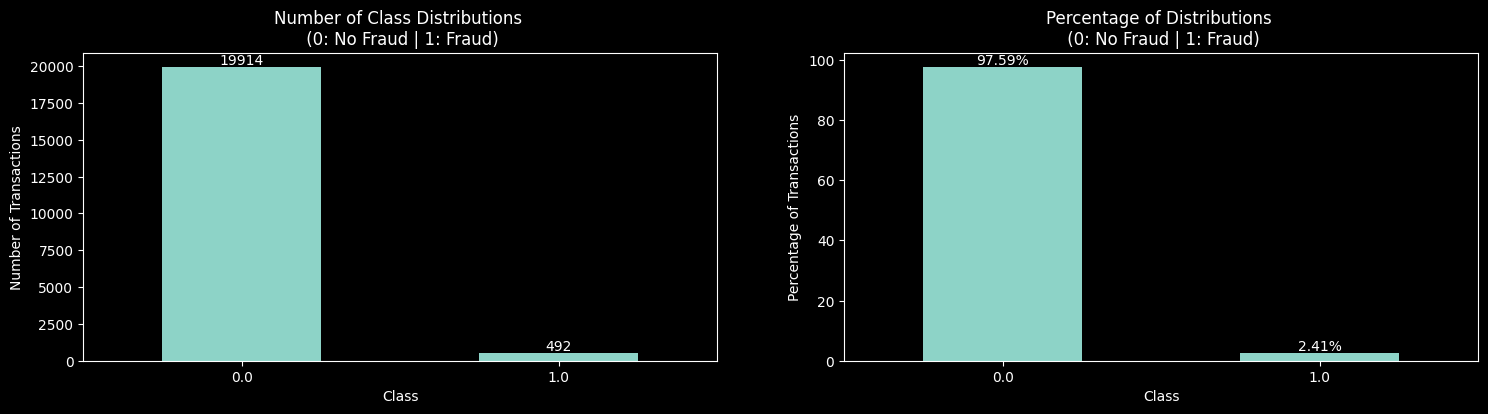

In [50]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='m')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')

    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')

    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

##Observation

**The dataset has very high imbalance class. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.**

**The percentage of distribution for majority class is 99.83% and minority class is 0.17%**

#Creating a scatter plot of Time vs Class with color-coded points and a legend.

**Creating a scatter plot of the Time variable on the x-axis and the Class variable on the y-axis.**

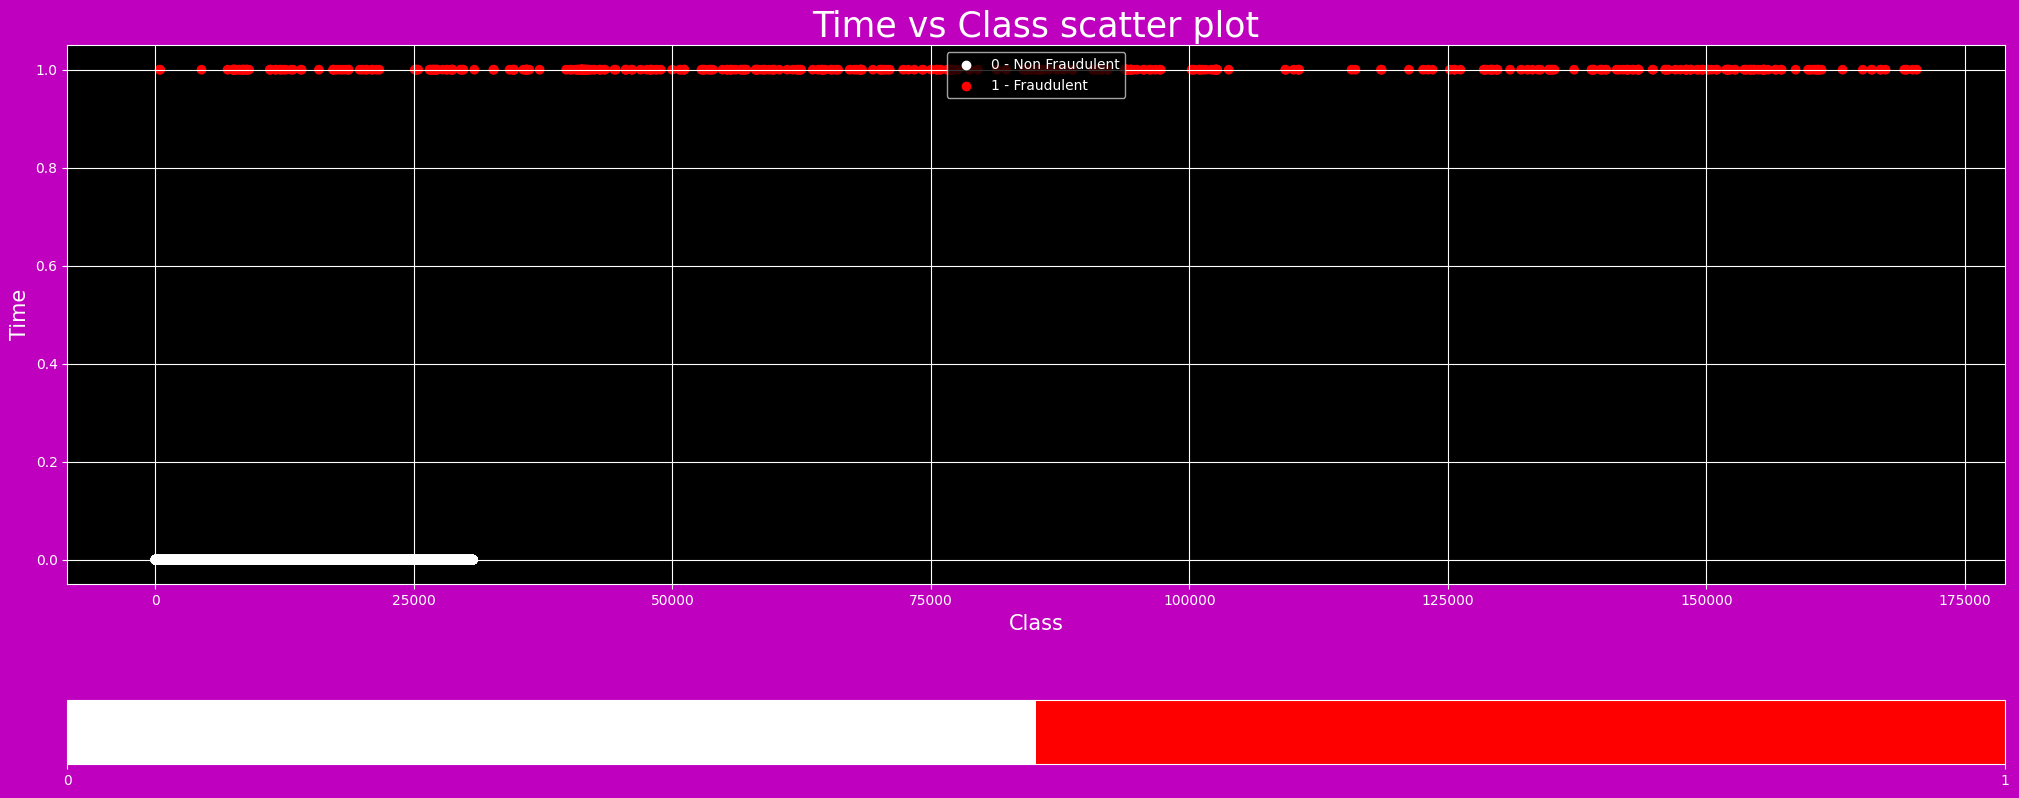

In [51]:
cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(25,10), facecolor='m')

    # Using the cmap parameter to color-code the points
    plt.scatter(x=df["Time"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Setting the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Time vs Class scatter plot", fontsize=25)
    plt.xlabel("Class", fontsize=15)
    plt.ylabel("Time", fontsize=15)
    plt.grid()

    # Creating a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

**The points in the plot are color-coded using the cmap parameter based on whether a transaction is fraudulent or not.**

**A colorbar is added to show the correspondence between color and class.**

**A legend is also added to clarify the colors used for each class.**



##Observation

**There is not much insight which can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.**

#Creating a scatter plot of Amount vs Class with color-coded points and a legend.

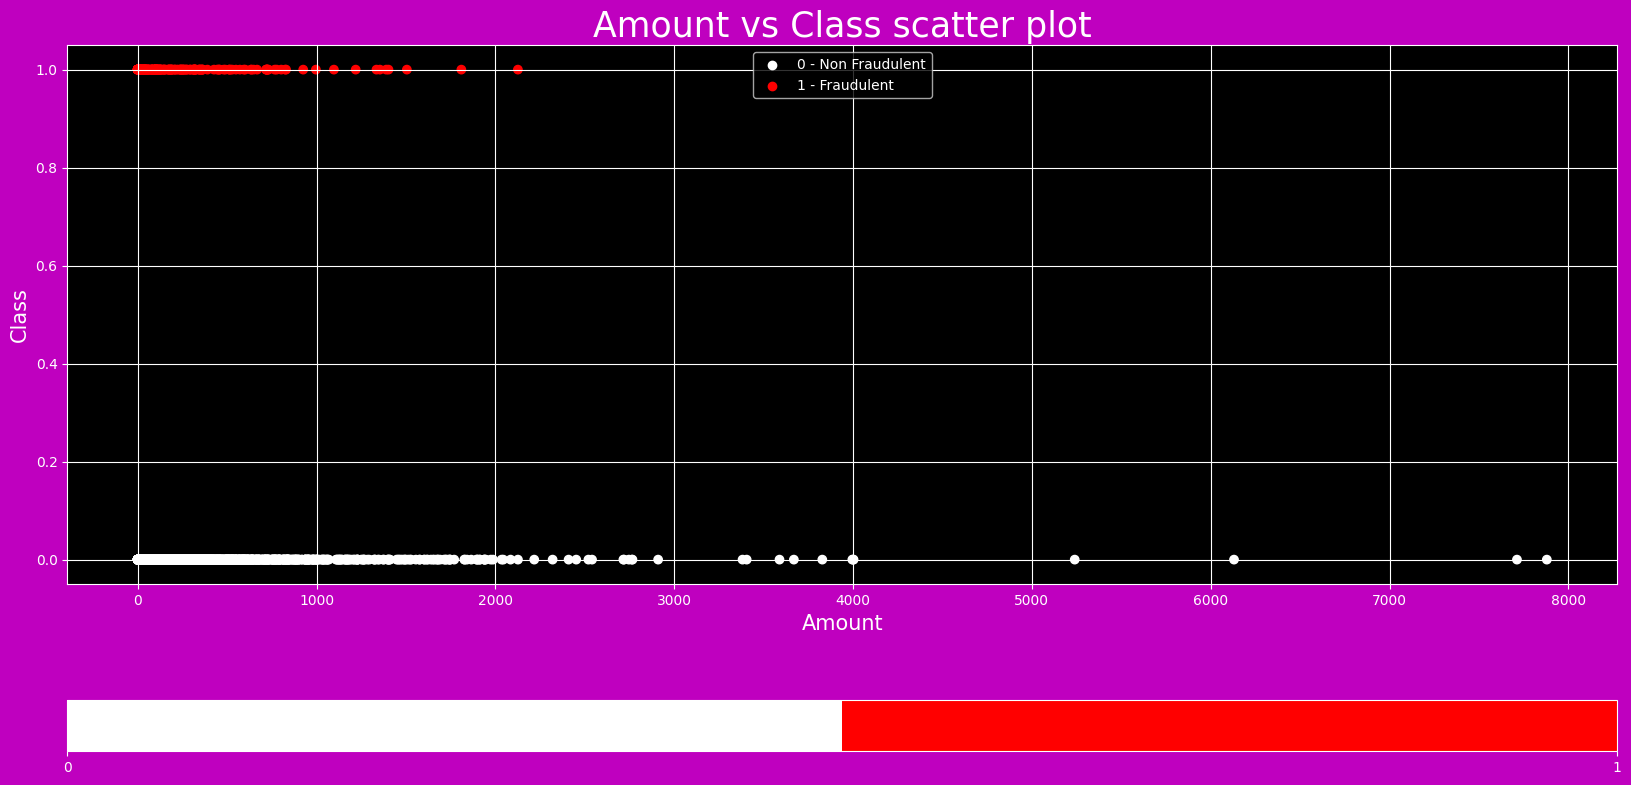

In [52]:
cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10), facecolor='m')

    # Using the cmap parameter to color-code the points
    plt.scatter(x=df["Amount"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Setting the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Amount vs Class scatter plot", fontsize=25)
    plt.ylabel("Class", fontsize=15)
    plt.xlabel("Amount", fontsize=15)
    plt.grid()

    # Creating a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

##Observation

**Clearly low amount transactions are more likely to be fraudulent than high amount transaction.**

#Creating correlation matrix plot

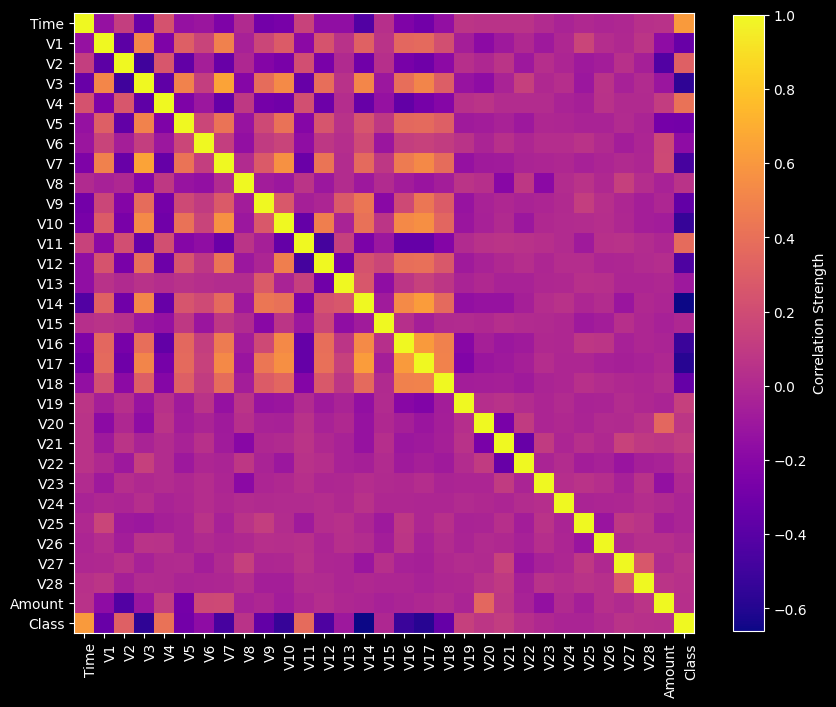

In [53]:
def corrplot(data):
 with plt.style.context('dark_background'):
      corr = data.corr()
      fig, ax = plt.subplots(figsize=(10, 10))
      im = ax.imshow(corr, cmap='plasma')
      ax.set_xticks(np.arange(len(data.columns)))
      ax.set_yticks(np.arange(len(data.columns)))
      ax.set_xticklabels(data.columns, rotation=90)
      ax.set_yticklabels(data.columns)
      plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
      plt.colorbar(im, aspect=20, shrink = 0.80 , pad = 0.05, label='Correlation Strength')
      plt.show()
corrplot(df)

##Observation

**There are no features but there is high correlatation , corr > .75**

#Plotting the distributions of all the features { Density Plots }

<Figure size 640x480 with 0 Axes>

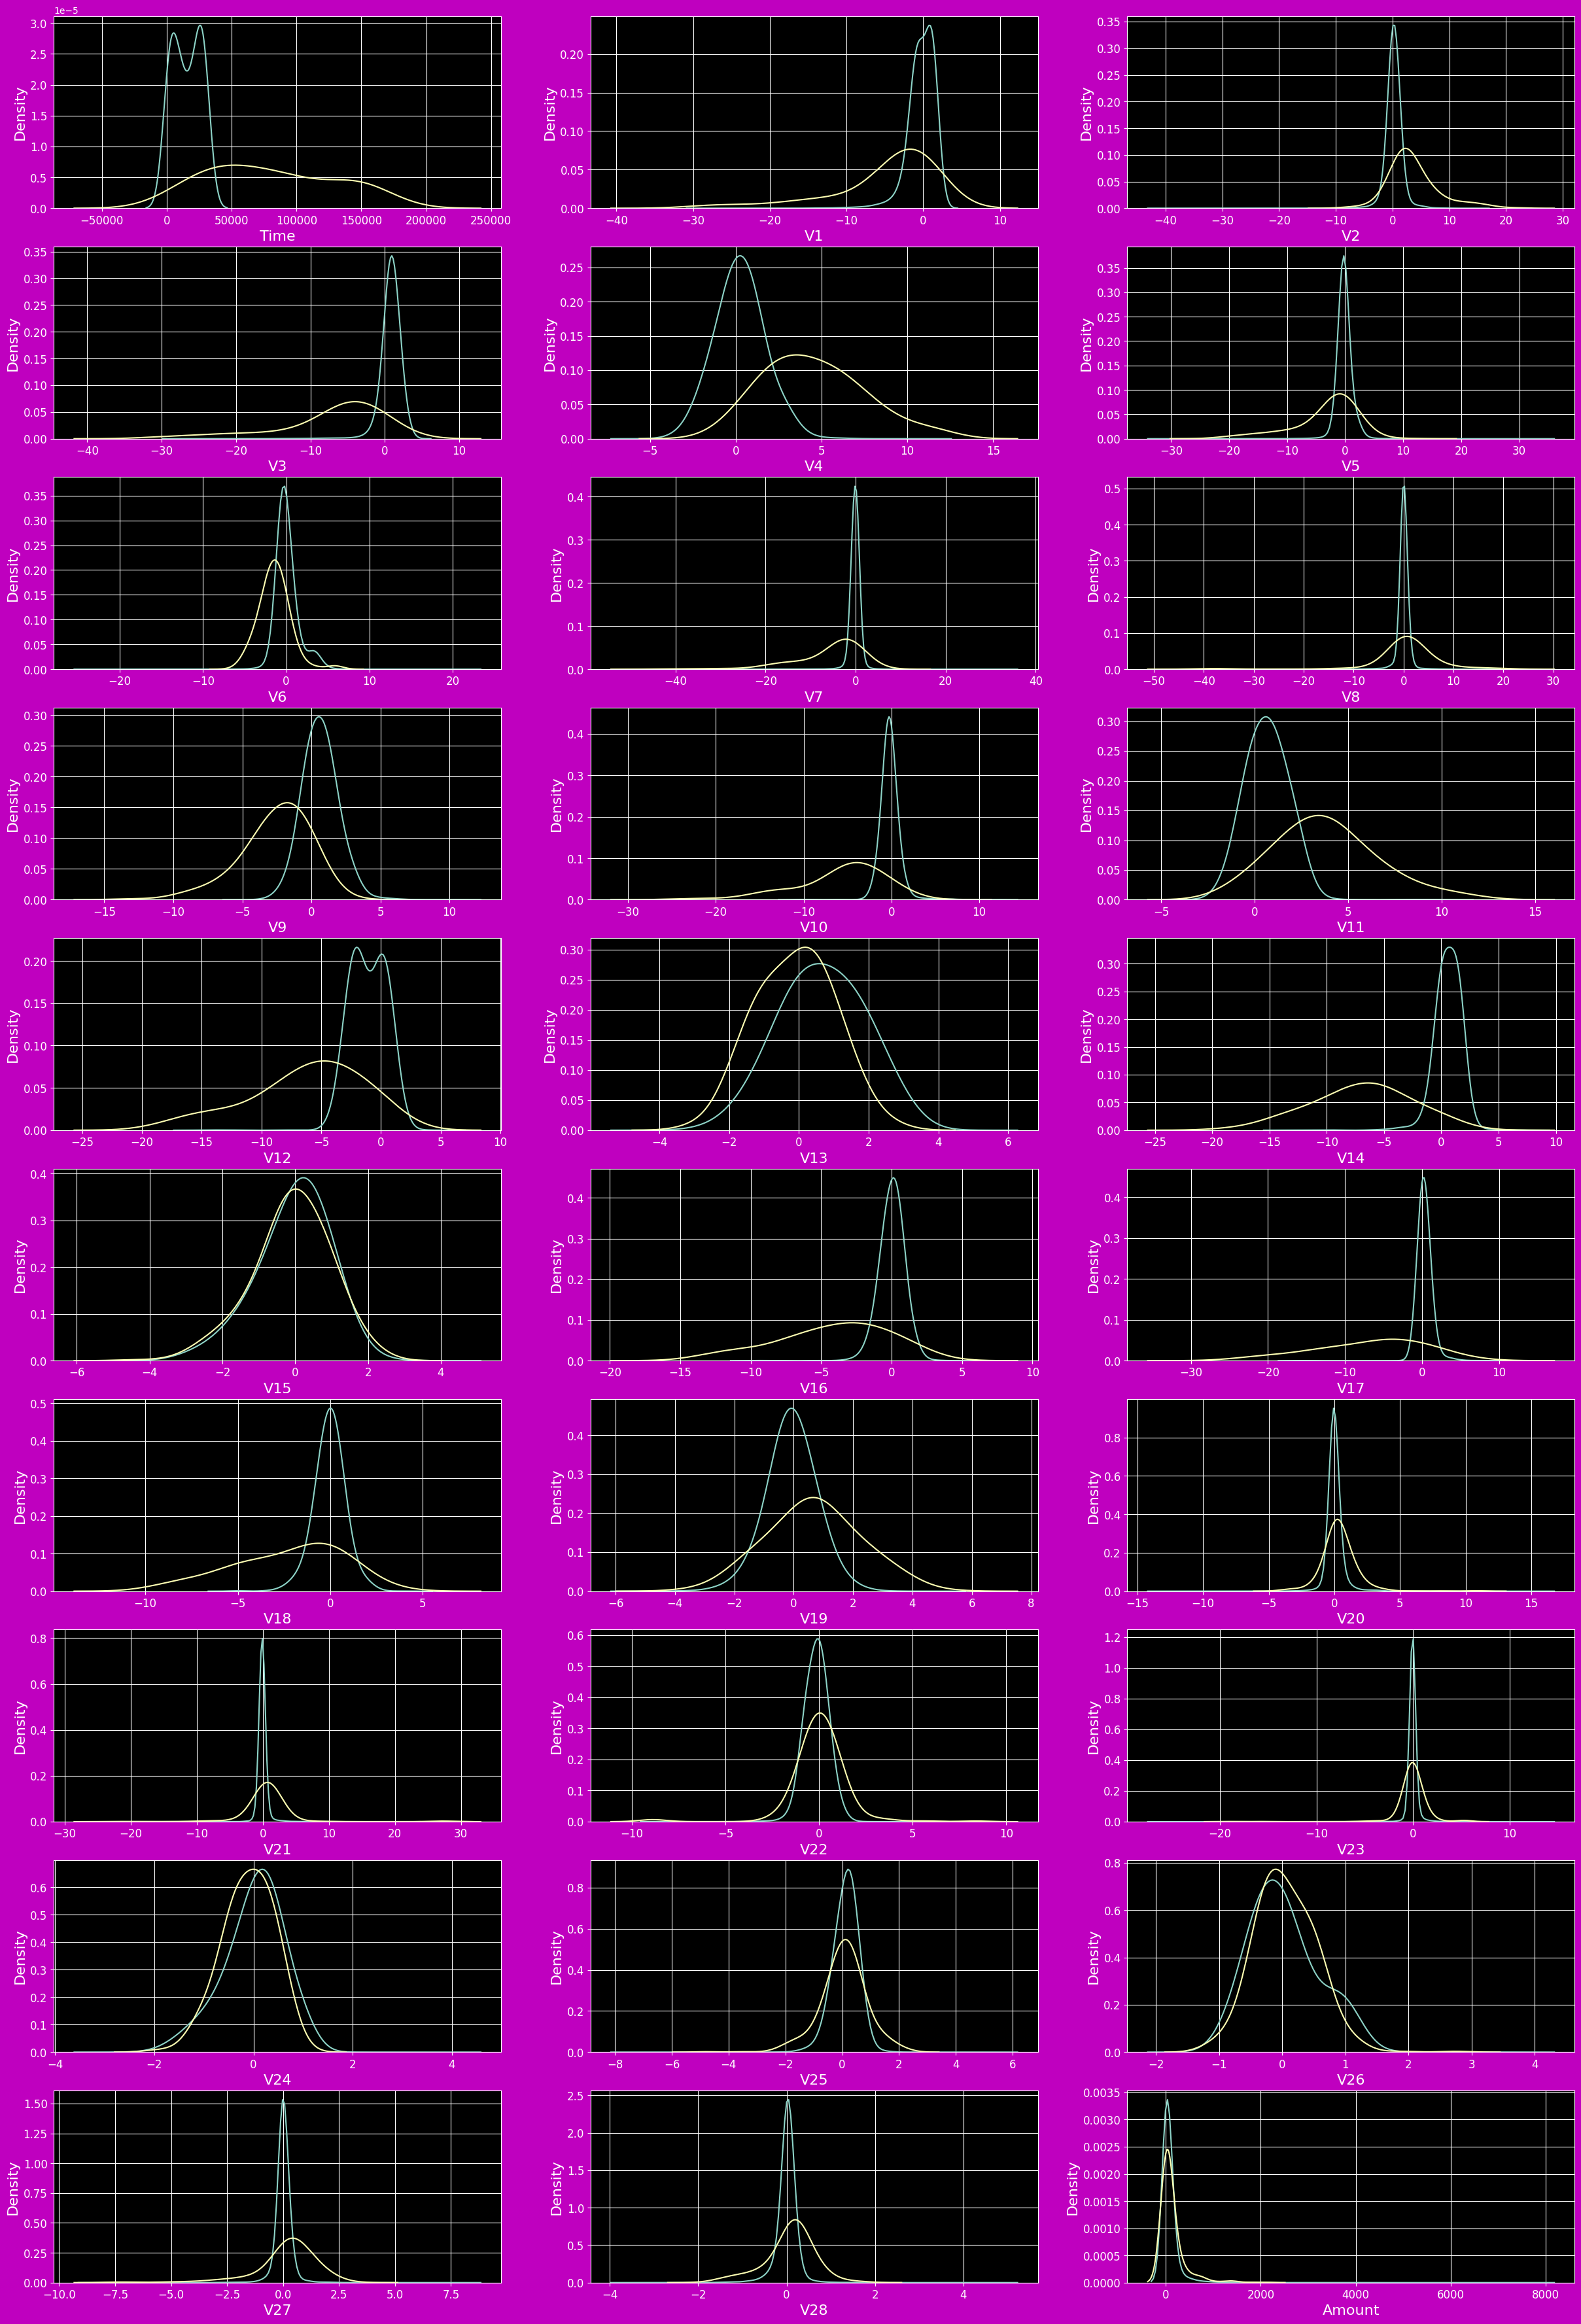

In [54]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

with plt.style.context('dark_background'):

    plt.figure()
    fig, ax = plt.subplots(10,3,figsize=(30,45), facecolor='m');

    for feature in var:
        i += 1
        plt.subplot(10,3,i)
        sns.kdeplot(t0[feature], bw=0.5,label="0")
        sns.kdeplot(t1[feature], bw=0.5,label="1")
        plt.xlabel(feature, fontsize=16)
        plt.ylabel("Density", fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
    plt.show()

##Observation

**Most of the features distributions are overlapping for both the fraud and non-fraud transactions**

Dropping Time column as this feature is not going to help in the model building.

In [55]:
df = df.drop("Time", axis = 1)
df.head()

V1        V2       V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781 2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

      Amount    Class  
0 149.620000 0.000000  
1   2.690000 0.000000  
2 378.660000 0.000000  
3 123.500000 0.000000  
4  69.990000 0.000000

#**Splitting the data into train & test data**

In [56]:
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((20406,), (20406, 29))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18365, 29), (2041, 29), (18365,), (2041,))

#Checking the split of the class label

In [59]:
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492.0
Fraudulent Count for Train data :  443.0
 Fraudulent Count for Test data :  49.0


#Saving the testing set for evaluation

In [60]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


#**Feature Scaling using RobustScaler Scaler**

**Scalling Amount column**

**As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field**

In [61]:
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [62]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
16818 -0.828953  1.727562 -0.006172  0.779155  0.196013 -0.878996  0.912120   
18536 -2.763465  0.013619  1.204486 -3.767178 -1.784577 -1.261734 -1.157732   
9625   1.184430 -0.214658  0.695499  0.096276 -0.561550  0.112614 -0.729982   
9864   1.138315 -0.240129  1.437573  0.465644 -1.160277 -0.166390 -0.843793   
16315 -4.482037 -3.015215  0.539711 -1.251056  0.961929 -0.902330  0.648013   

             V8        V9       V10      V11       V12       V13      V14  \
16818 -0.224437  0.218454  1.320257 0.009804 -0.067075 -0.501488 0.275644   
18536  1.059982 -0.096148 -1.144203 0.924481  1.284253  0.403762 0.417830   
9625   0.192079  1.727943 -0.349441 2.006133 -2.517764  0.208986 1.985224   
9864   0.084684  1.990782 -0.540387 2.210664 -1.172572  1.859792 1.142375   
16315 -0.506258  1.126583 -0.753731 1.542472  0.989476 -0.124075 0.097834   

            V15       V16       V17       V18       V19       V20       V21  \
16818  1.010472 -1.051651  0.197775 -0.698164 -0.144427  0.228308  0.113229   
18536  0.174691 -0.610886 -0.509340  2.140663 -1.584621 -0.906314 -0.121290   
9625   0.323915  0.558930  0.290057  0.497196 -0.337652 -0.191064 -0.027060   
9864  -1.229226  0.296517  0.445874  0.282964  0.167010 -0.070403 -0.193643   
16315  1.188780  0.097691 -0.733365 -0.167208  0.432760 -2.050425 -0.790350   

            V22       V23       V24       V25       V26       V27       V28  \
16818  0.747232  0.120213  0.393160 -0.800021 -0.488888 -0.204731 -0.153541   
18536 -0.072947 -0.522325  0.554449  0.316401 -0.407729 -0.468464 -0.487908   
9625   0.109889 -0.019225 -0.320632  0.096454  1.068537 -0.087083 -0.014460   
9864  -0.167125  0.073630  0.554375  0.040756  0.887890 -0.062157  0.004909   
16315 -0.594853 -1.045278 -0.170885  0.284215 -1.028535 -0.236089  1.209250   

         Amount  
16818 -0.260475  
18536  0.406131  
9625  -0.021767  
9864   0.035552  
16315  7.234718

In [63]:
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
221018 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630 -1.358708   
7034   -1.870060  1.144615  1.520463 -0.324813  0.103339  0.571188 -0.018978   
6440   -2.104792 -1.700357  2.444681 -0.500963  1.904566 -1.103889 -0.243060   
3188   -0.864949 -0.769920  0.829225 -1.735165 -1.175958  0.253455  1.315697   
15868  -5.008899 -3.567746  1.021427  3.768790  5.280372 -3.174799 -2.478539   

              V8        V9       V10       V11       V12       V13       V14  \
221018  0.672409 -3.188001 -4.937427  3.723933 -4.603176  1.019180 -6.619090   
7034    0.441588  1.976561 -0.220849  1.521003 -0.953793  2.317437  0.679833   
6440   -0.970038  2.204698  0.491798  2.244565 -2.172107  1.931106  0.385315   
3188    0.118620  0.981120 -1.738615  0.971364  0.680659 -1.350503  0.269613   
15868  -0.348031 -0.648985  1.898582 -0.190211 -0.073993  0.070418  0.318212   

             V15       V16       V17       V18       V19       V20       V21  \
221018 -0.590224 -4.472548 -7.165044 -1.581128  1.930380  0.264699  0.861308   
7034   -2.741946 -0.426633  0.618127 -0.272849 -0.366897  0.032567 -0.270466   
6440   -0.315036  0.786114 -0.873448  0.791680 -0.432742 -0.568108 -0.275233   
3188   -0.277642 -1.189251  0.397299  0.093907  1.143614  0.553799  0.293608   
15868   1.352926 -0.234920  0.113104 -0.974804  0.322585 -2.432219 -0.640997   

            V22       V23       V24       V25       V26       V27       V28  \
221018 1.249301  1.850627 -0.117471  1.219815  0.000251  1.036011  0.004367   
7034   0.162836 -0.005604 -0.285377  0.152556  0.334377  0.017770 -0.011909   
6440   0.626030 -0.795250  0.112904 -0.711995  0.742631 -0.760977 -0.529885   
3188   0.542974  0.589833  0.033605 -0.222383 -0.049898  0.057414  0.159841   
15868  0.091000 -1.968210  0.353708 -0.223773  0.241232  0.453529  0.553549   

          Amount  
221018  5.511700  
7034   -0.292763  
6440    0.958643  
3188    5.594050  
15868  -0.154907

#Checking Skewness

* **Skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Meadian and Mode are equal. The normal distribution has a skewness of 0. Skewness tell us about distribution of our data.**

 * **Effects of skewed data: Degrades the model's ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values. ie right skewed data will predict better on data points with lower value as compared to those with higher values.**


**Plotting the distribution of a variable**

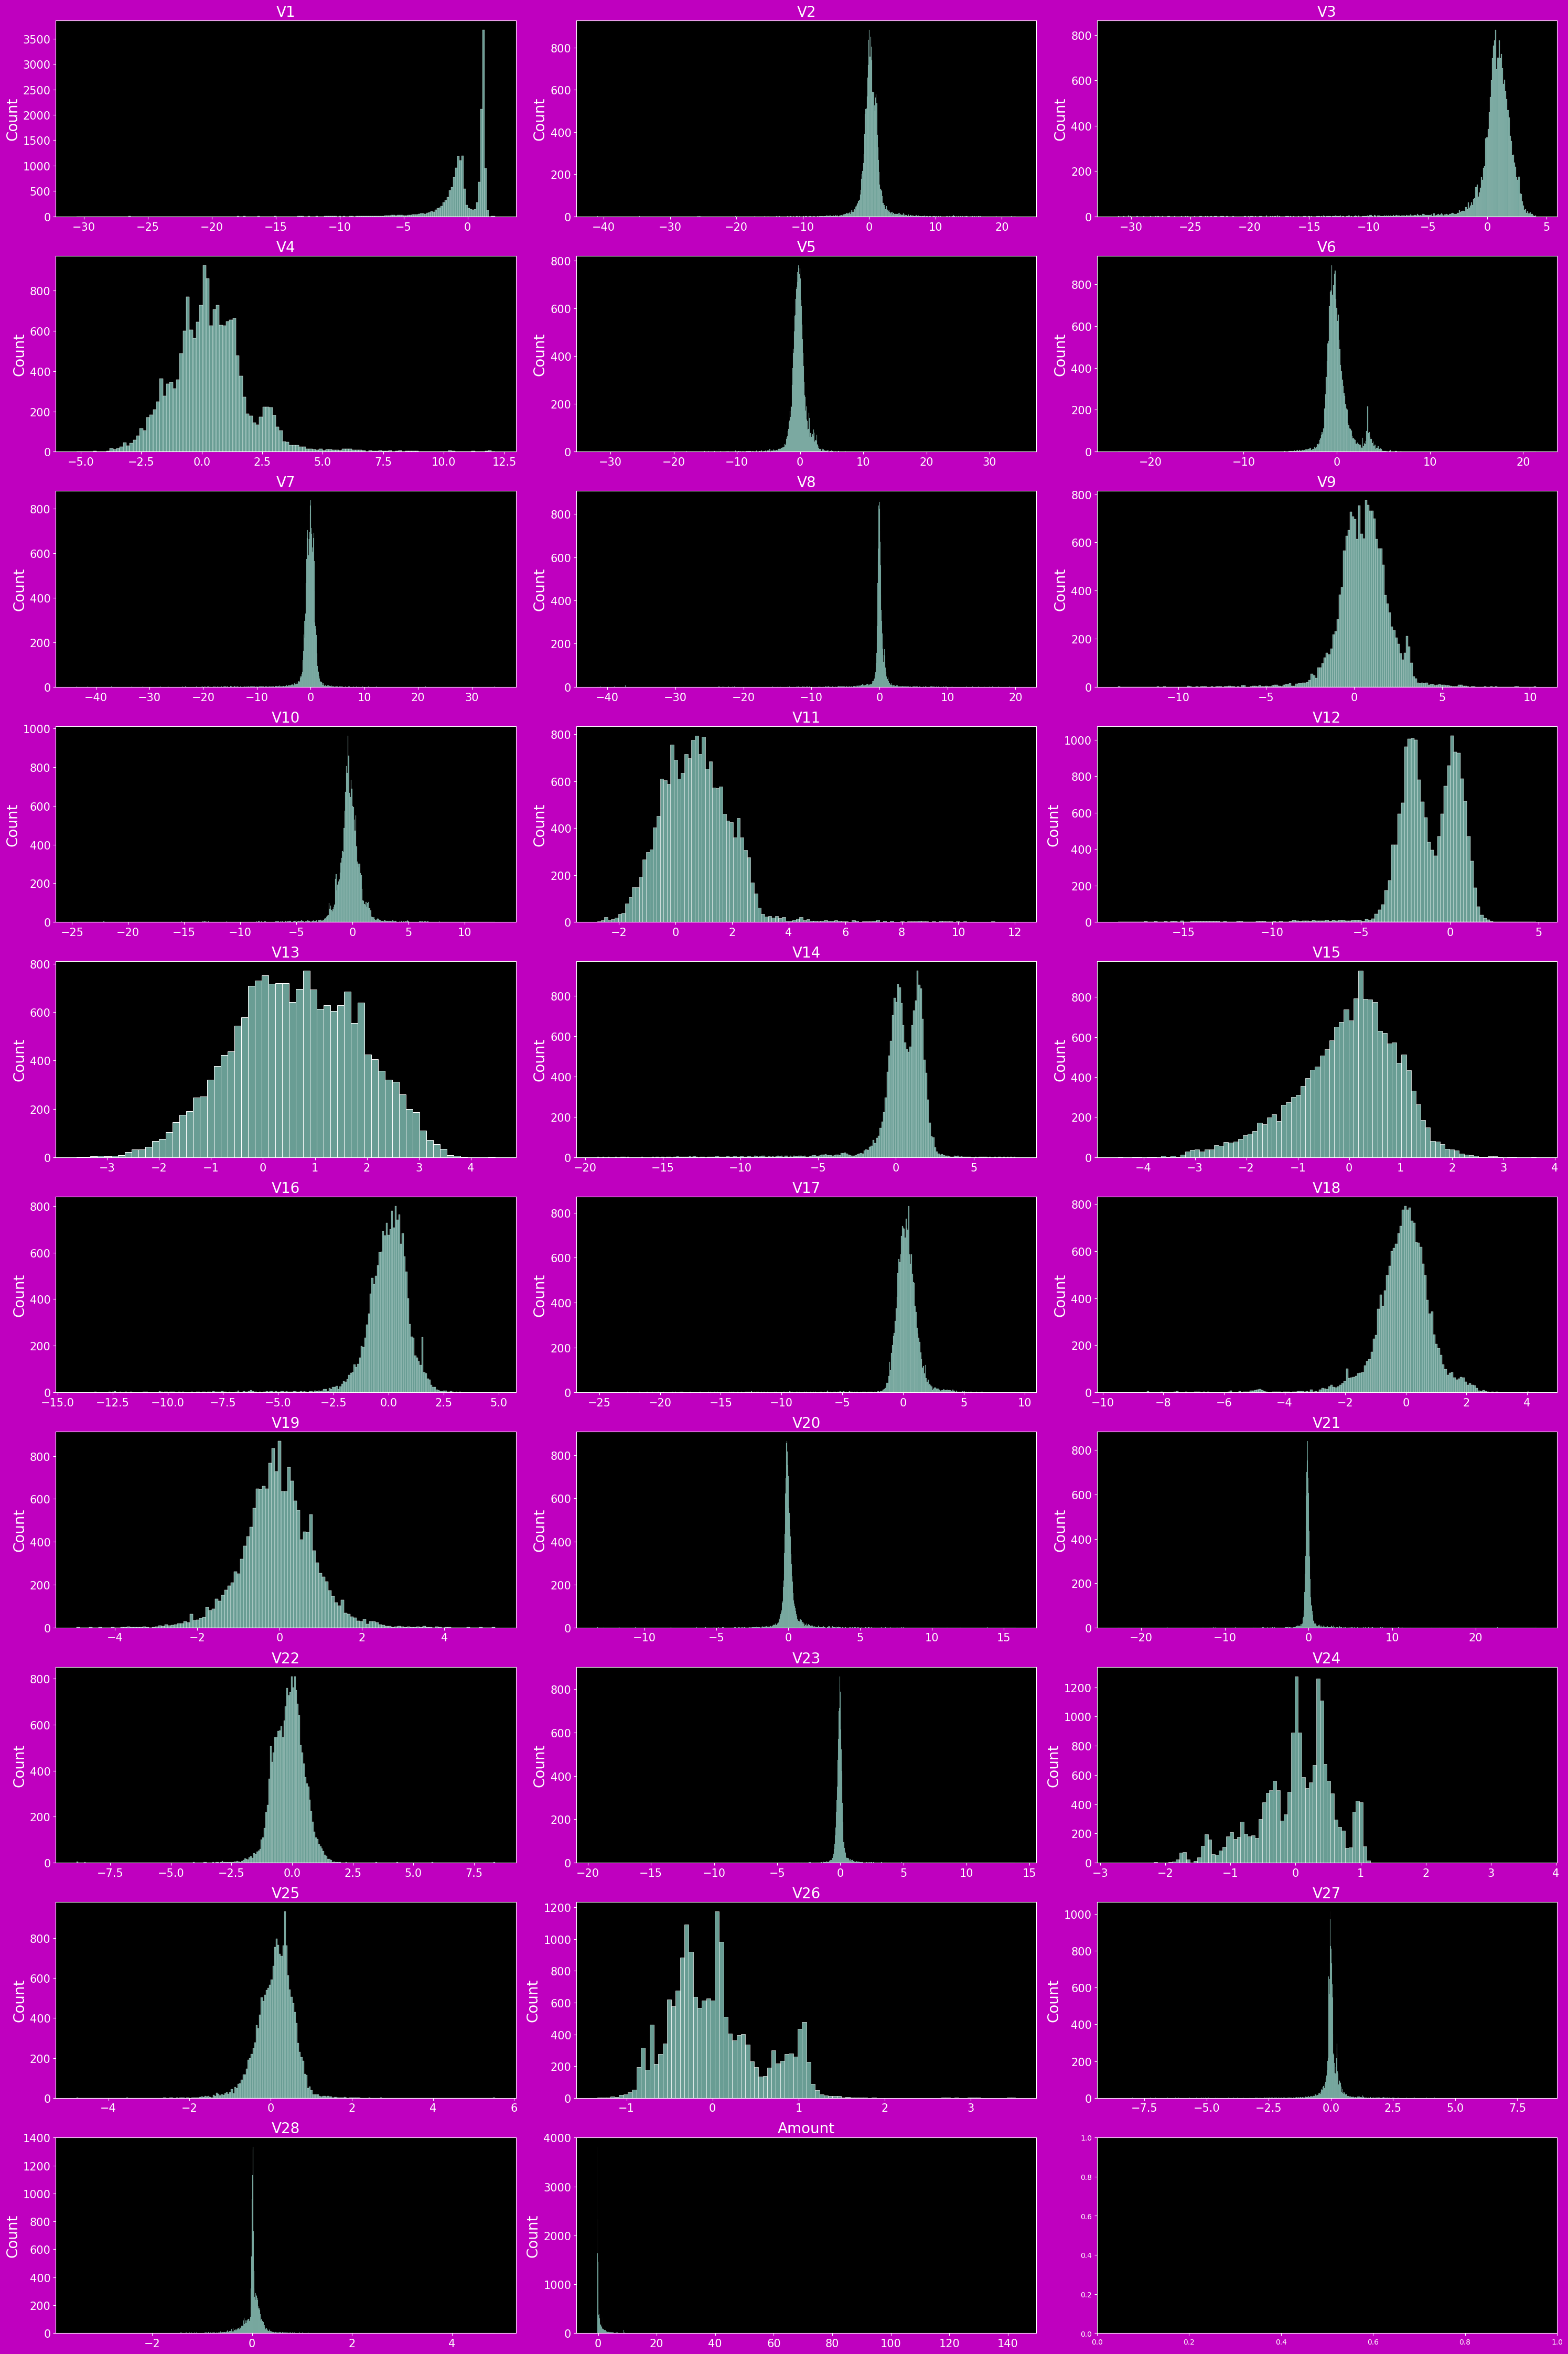

In [64]:
var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20)
            ax.set_ylabel("Count", fontsize=20)  # setting ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15)
            ax.set_xlabel('') # setting empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

##Observations

**Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.**

#Checking the skewness of the features

In [65]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

Skewness
Features          
V1       -4.790181
V2       -1.006402
V3       -6.427447
V4        1.119858
V5       -2.548151
V6        0.753423
V7       -7.333176
V8       -8.137362
V9       -0.490935
V10      -3.756126
V11       1.359417
V12      -2.441788
V13      -0.081937
V14      -4.163289
V15      -0.603427
V16      -3.983945
V17      -6.228289
V18      -1.970812
V19       0.023838
V20       2.339971
V21       8.526197
V22      -1.064901
V23      -4.123583
V24      -0.648655
V25      -0.545863
V26       0.613551
V27      -3.868260
V28       0.503094
Amount   13.078543

##Observation

**There is skewness present in the distribution**
* **Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian**

#Filtering the features which has skewness less than -1 and greater than +1

In [66]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V7',
 'V8',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V20',
 'V21',
 'V22',
 'V23',
 'V27',
 'Amount']

#Treating Skewness

In [67]:
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creating an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [68]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(18365, 29)
(18365,)


**Visualization of Data after Treating skewness**

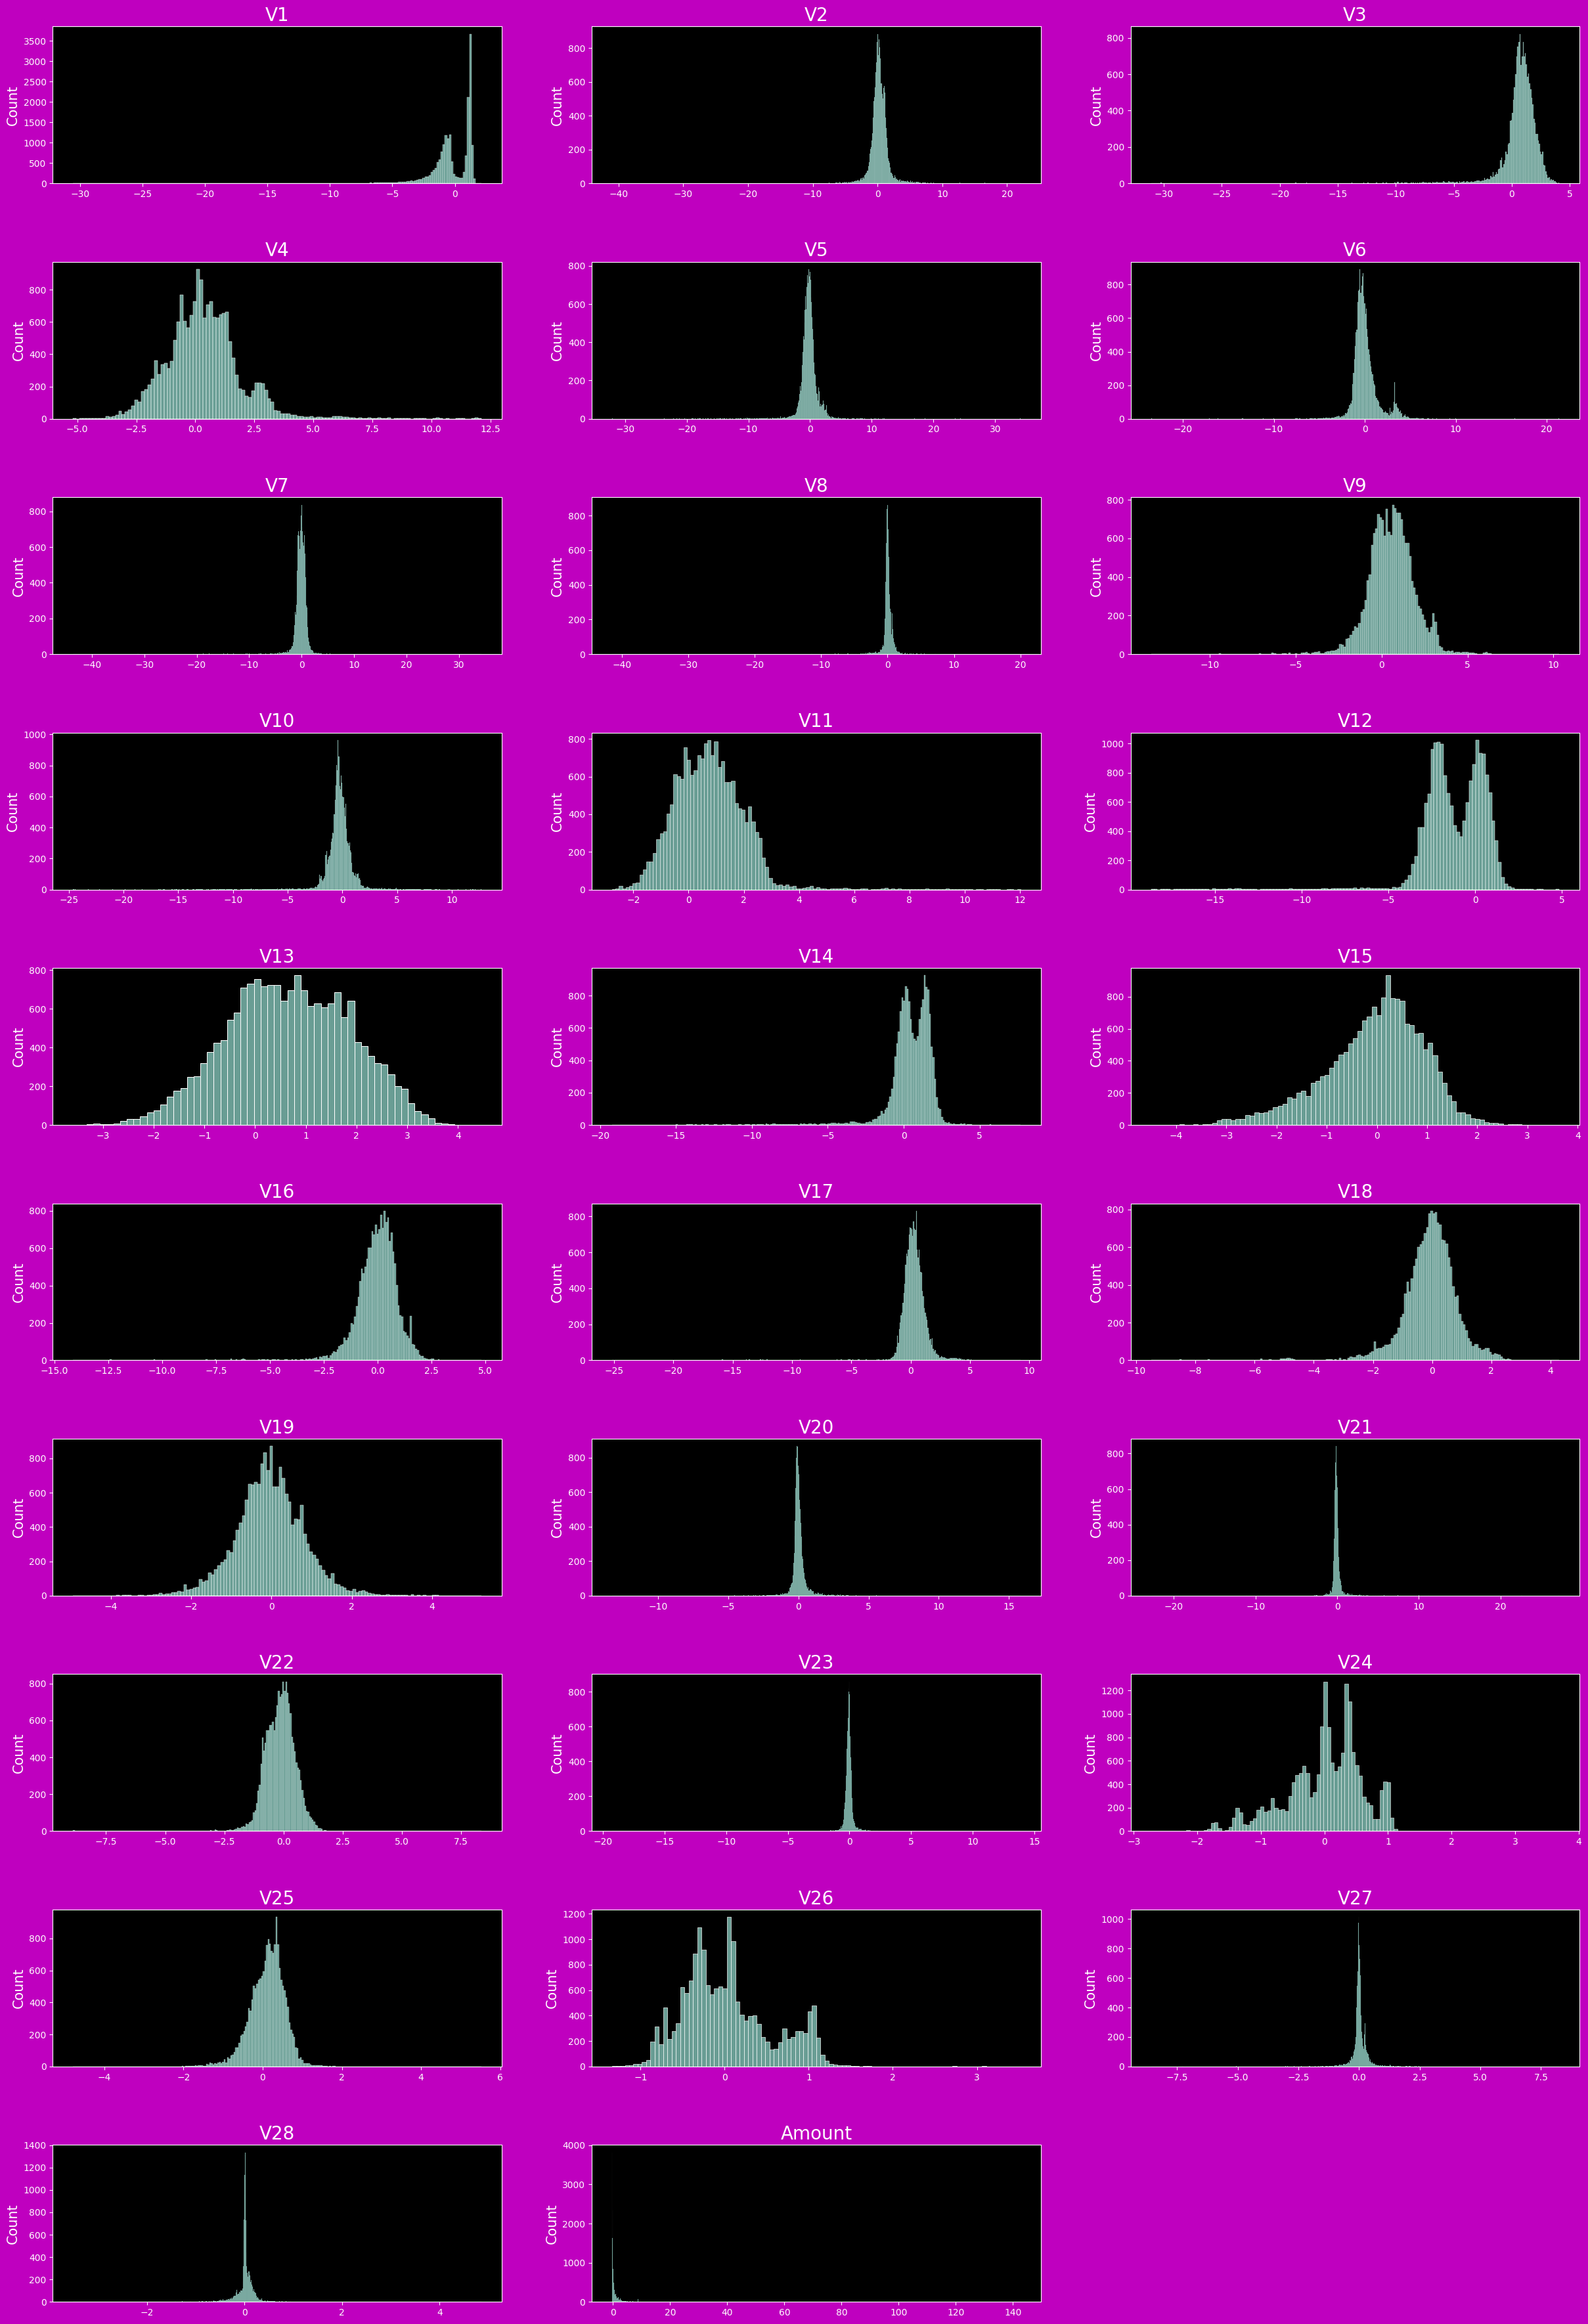

In [69]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='m')
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i)
        sns.histplot(X_train[col], ax=ax)
        ax.set_title(col, fontsize=20)
        ax.set_ylabel('Count', fontsize=15)
        ax.set_xlabel('')
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
    plt.show()

#**Model Building with the imbalanced data**

**Going to build models on the below mentioned algorithms , then comparing the best model.**

**1.Logistic Regression**

**2.KNN**

**3.SVM**

**4.Decision Tree**

**5.Random Forest**

**6.XGBoost**

#**Metric selection on the imbalance data**

**We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.**

In [70]:
y_train.value_counts()/y_train.shape

0.000000   0.975878
1.000000   0.024122
Name: Class, dtype: float64

**Creating a Stratified Cross Validation Scheme & Performing a GridSearchCV after narrowing the range of best model**

In [71]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


#**Performing Logistic Regression**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



======================================Logistic Regression Classifier:=======================================


C = 0.1 Penalty = L2
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 0.09484100341796875 seconds
Train: [    0     1     2 ... 18362 18363 18364] val: [ 6113  6114  6115 ... 12691 12709 12749]
Time elapsed: 0.07272171974182129 seconds
Train: [    0     1     2 ... 12691 12709 12749] val: [12235 12236 12237 ... 18362 18363 18364]
Time elapsed: 0.08490371704101562 seconds
ROC-AUC Score for val data = 0.9875495341203887
Mean precision val score: 0.9190382134436584
Mean recall val score: 0.7674358031500889
Mean f1 val score: 0.8362562385203894


------------------------------------------------------------------------------------------------------------


C = 0.5 Penalty = L2
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 0.1021568775177002 seconds
Train: [    0     1 

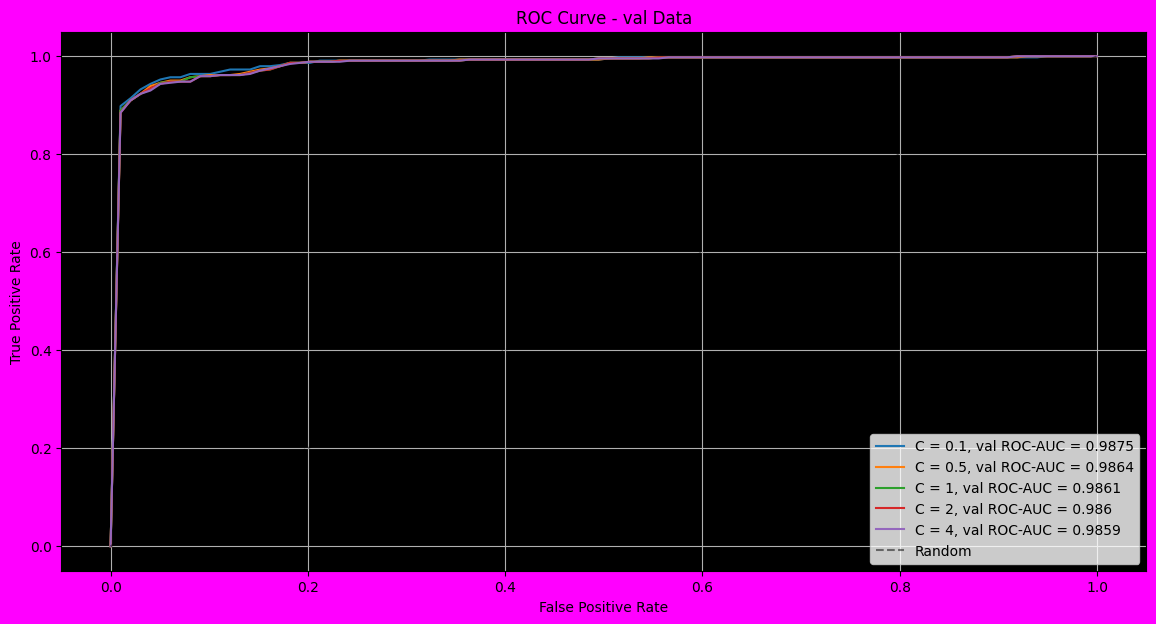

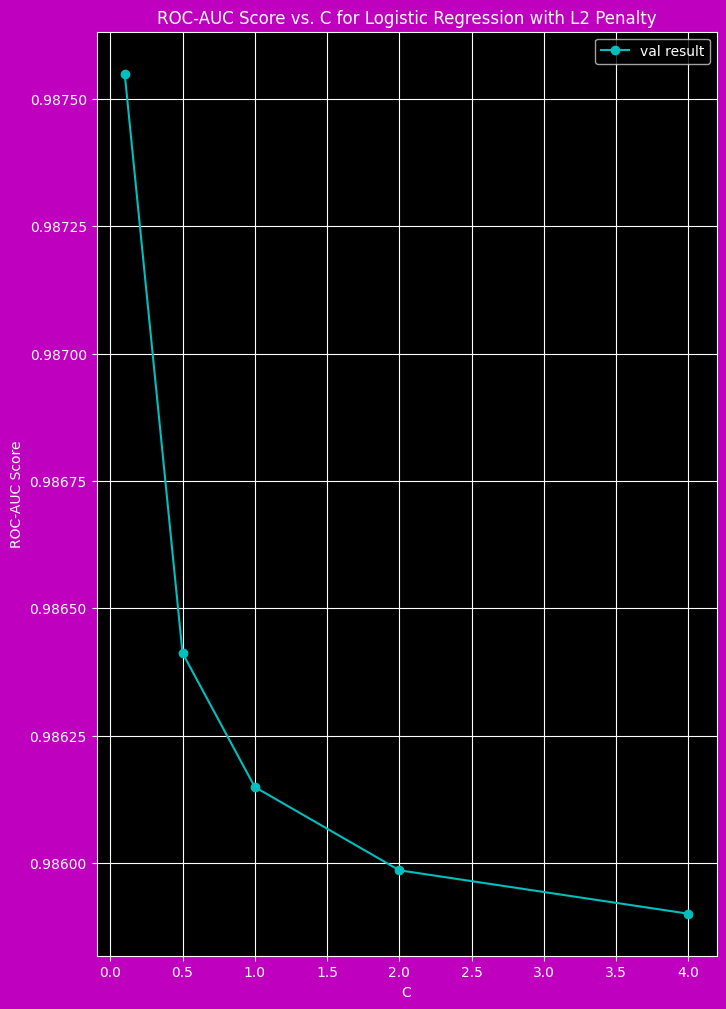





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for val data for all values of C: 
 [0.9875495341203887, 0.9864121567096363, 0.9861490633586382, 0.9859856081220087, 0.9859002937880454]


Best C: 0.1


Best Mean ROC-AUC score for val data: 0.9875495341203887


Mean precision val score for best C 0.9190382134436584


Mean recall val score for best C 0.7674358031500889


Mean f1 val score for best C 0.8362562385203894






In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")
print("\n")
print("======================================Logistic Regression Classifier:=======================================")
print("\n")
# Defining our values of C

C_values = [0.1, 0.5, 1, 2, 4]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates to train and val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)


        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))

        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores to val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))

print("\n")
print("===============================Logistic Regression Has Run Successfully:====================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()
print("\n")
print("============================================================================================================")
print("\n")
# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for Logistic Regression with L2 Penalty')

    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for train and val data for all values of C

print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")


**B. Performing Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [73]:
from sklearn.model_selection import GridSearchCV
params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}

# Defining the logistic regression classifier

logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
#printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")
#printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Time taken: 3.38 seconds


Best ROC AUC score:  0.9888529032438352


Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}




In [74]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9888529032438352
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9875495341203887
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9864121567096363

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.003920919198118872
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.004382702257168454
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.004319077335236341


##**Observations**

**We're seeing a nan value for the score when using the GridSearchCV function in scikit-learn, it typically indicates that the model did not converge or encountered some numerical instability during the training process.**

**This can happen for a variety of reasons, such as**

**1.An insufficient number of iterations,**

**2.A learning rate that's too high or too low,**

**3.A dataset that has features with a wide range of values.**

#**Performing KNN Classifier**

**Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

============================================KNN Classifier:===============================================
K = 3
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 0.2994818687438965 seconds
Train: [    0     1     2 ... 18362 18363 18364] val: [ 6113  6114  6115 ... 12691 12709 12749]
Time elapsed: 0.14802312850952148 seconds
Train: [    0     1     2 ... 12691 12709 12749] val: [12235 12236 12237 ... 18362 18363 18364]
Time elapsed: 0.15027546882629395 seconds
Mean ROC-AUC for train data: 0.9997486761613658
Mean ROC-AUC for val data: 0.9362051802627631
------------------------------------------------------------------------------------------------------------


=================================KNN Classifier Has Run Successfully:=======================================


------------------------------------------------------------------------------------------------------------


======================================Plotting the RO

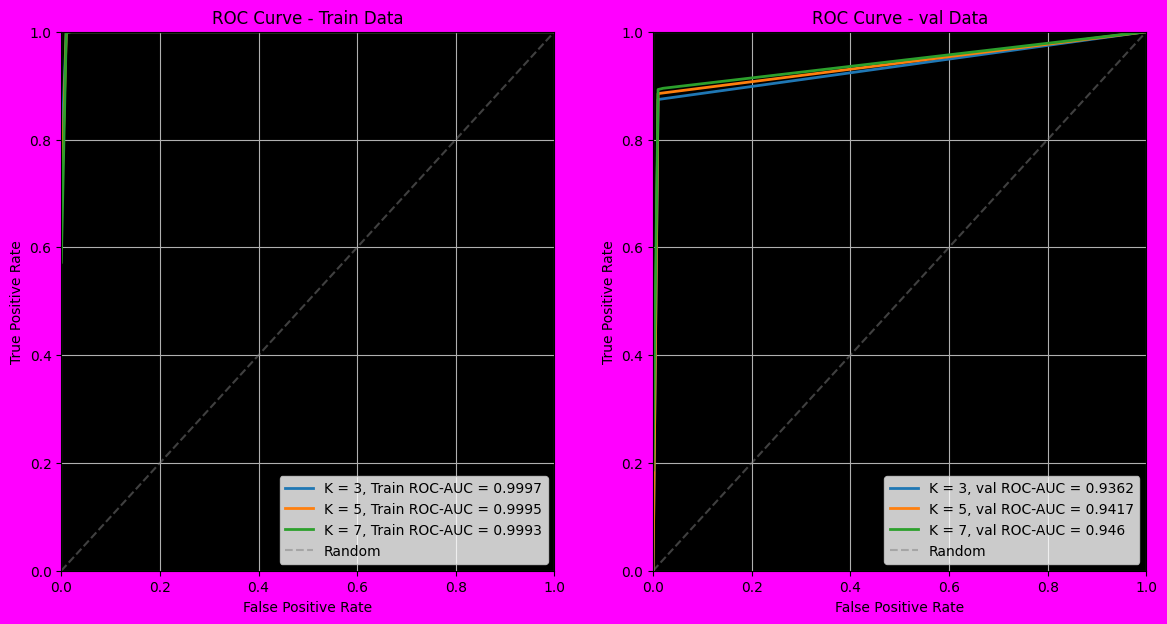

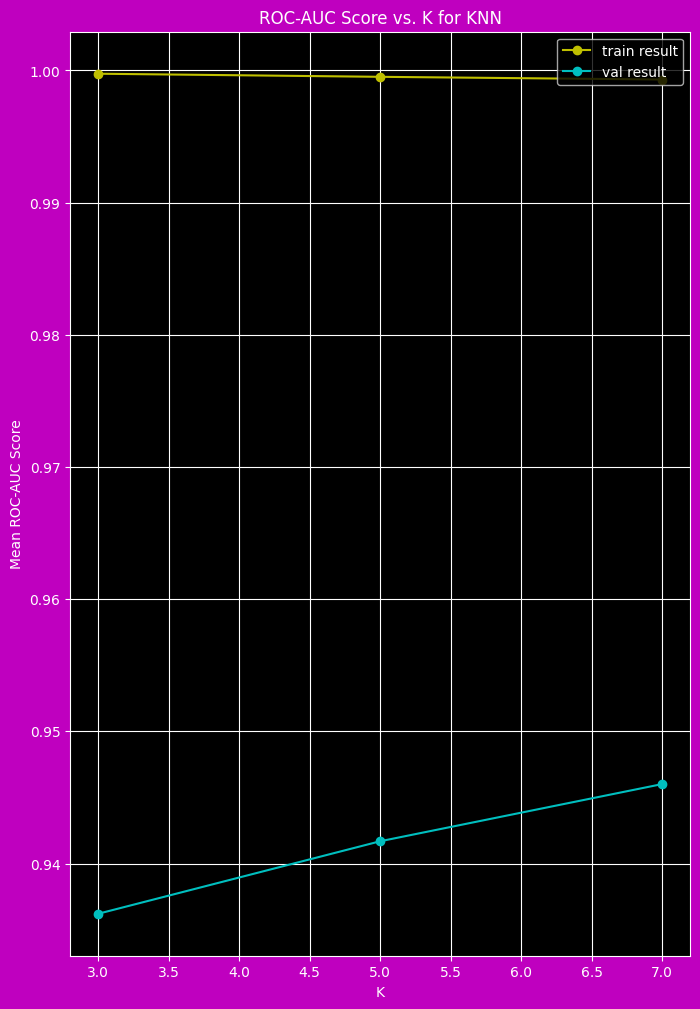





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for train data for all values of K: 
 [0.9997486761613658, 0.9995144926572177, 0.9993099343988862]
Mean ROC-AUC scores for val data for all values of K: 
 [0.9362051802627631, 0.9416871782689133, 0.9460088205455032]


Best K: 7


Best Mean ROC-AUC score for val data: 0.9460088205455032






In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Defining our values of K (number of neighbors)

K_values = [3, 5, 7]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for train and val data

mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# Creating subplots for ROC curves

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background

# Setting background color for subplots

ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Defining the KFold object


# Looping through each value of K

for k in K_values:
    print("K =", k)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = knn_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0]

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0]

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores and mean false positive rates for train and val data

    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)
    mean_tpr_train = np.mean(tprs_train, axis=0)
    mean_fpr_train = mean_fpr
    ax1.plot(mean_fpr_train, mean_tpr_train, linestyle='-', lw=2, label='K = ' + str(k) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)).format(k))

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)
    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr
    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)).format(k))

    print("Mean ROC-AUC for train data:", mean_roc_auc_train)
    print("Mean ROC-AUC for val data:", mean_roc_auc_val)


    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    print("=================================KNN Classifier Has Run Successfully:=======================================")
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    print("======================================Plotting the ROC AUC Curve:===========================================")
    print("\n")

# Plotting ROC curves for train and val data

ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc='lower right')
ax1.grid(True)  # Adding grid to the plot

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Adding grid to the plot

plt.show()
print("\n")
print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(K_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score vs. K for KNN')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for train and val data for all values of K

print("Mean ROC-AUC scores for train data for all values of K: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_k = K_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best K:", best_k)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")


print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**Euclidean distance is a good choice for problems where the variables have similar importance and are measured in the same scale. On the other hand, Manhattan distance is a good choice when variables have different scales or when you want to penalize differences in some variables more heavily than others.**

In [76]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for KNN

params = {'n_neighbors': [5, 7, 9], 'metric': ['euclidean', 'manhattan']}


# Creating  a KNN classifier

knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

#printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Time taken: 21.63 seconds
Best ROC AUC score:  0.9547992027576179
Best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 9}


In [77]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.9416871782689133
{'metric': 'euclidean', 'n_neighbors': 7} 0.9460088205455032
{'metric': 'euclidean', 'n_neighbors': 9} 0.9547992027576179
{'metric': 'manhattan', 'n_neighbors': 5} 0.9430305898603043
{'metric': 'manhattan', 'n_neighbors': 7} 0.9474260489762187
{'metric': 'manhattan', 'n_neighbors': 9} 0.9517214891216517

Rank of each hyperparameter combination:
1 {'metric': 'euclidean', 'n_neighbors': 5}
2 {'metric': 'euclidean', 'n_neighbors': 7}
3 {'metric': 'euclidean', 'n_neighbors': 9}
4 {'metric': 'manhattan', 'n_neighbors': 5}
5 {'metric': 'manhattan', 'n_neighbors': 7}
6 {'metric': 'manhattan', 'n_neighbors': 9}

Standard deviation of test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.012157698447864924
{'metric': 'euclidean', 'n_neighbors': 7} 0.008996540950426195
{'metric': 'euclidean', 'n_neighbors': 9} 0.011210330510550495
{'metric': 'manhattan', 'n_neighbors': 5} 0.011634088640714382
{'metric': 'manhattan'

#**Performing SVM Classifier**

**Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



=============================================SVM Classifier:================================================


C = 0.1 Kernel = rbf
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 4.782779216766357 seconds
Train: [    0     1     2 ... 18362 18363 18364] val: [ 6113  6114  6115 ... 12691 12709 12749]
Time elapsed: 4.781273365020752 seconds
Train: [    0     1     2 ... 12691 12709 12749] val: [12235 12236 12237 ... 18362 18363 18364]
Time elapsed: 4.702740907669067 seconds
ROC-AUC Score for train data = 0.994290416478993


ROC-AUC Score for val data = 0.9867990193208996


------------------------------------------------------------------------------------------------------------


C = 1 Kernel = rbf
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 4.472958087921143 seconds
Train: [    0     1     2 ... 18362 18363 18364] val: [ 6113  6114  6115 ... 12691 12709 12749]
Time el

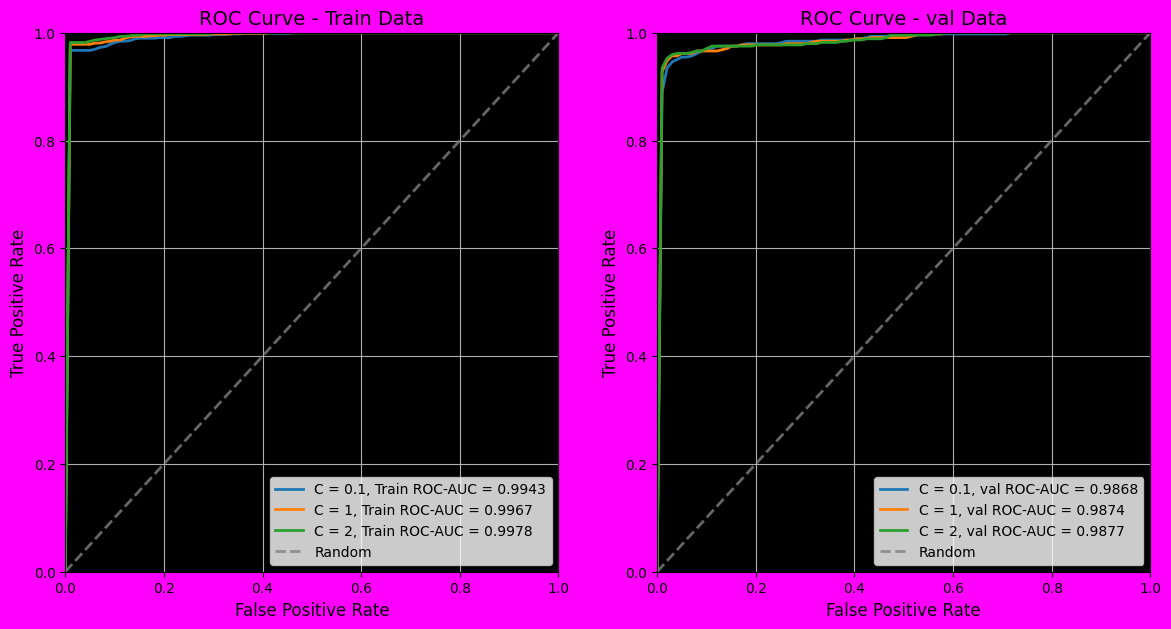

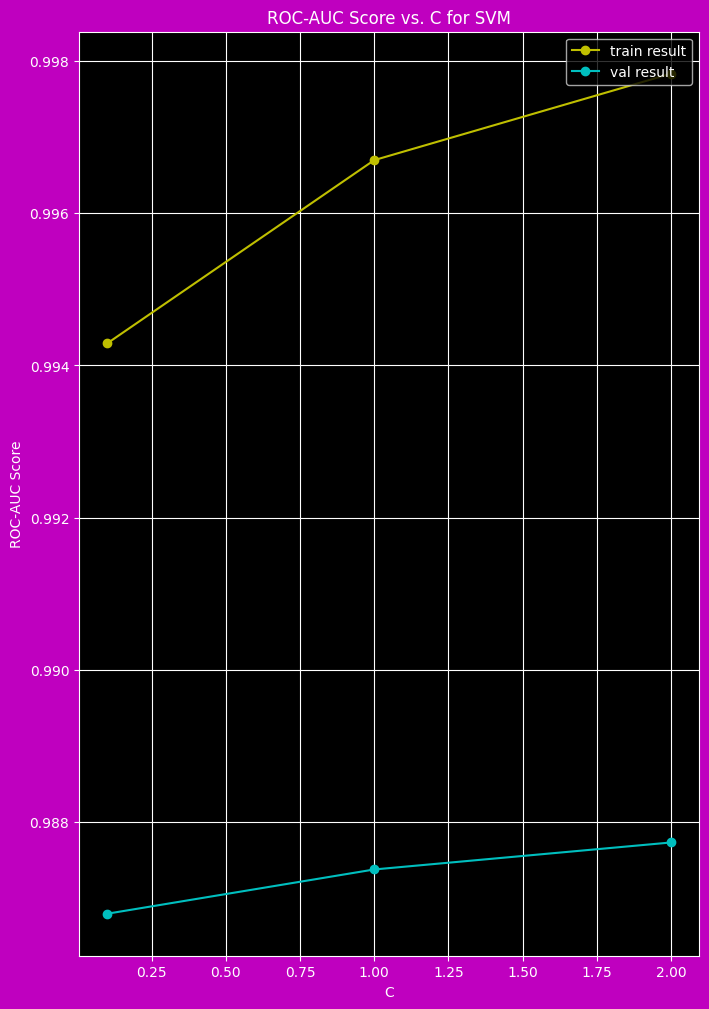





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for train data for all values of C: 
 [0.994290416478993, 0.996697313862693, 0.9978325393266481]


Mean ROC-AUC scores for val data for all values of C: 
 [0.9867990193208996, 0.9873802980778447, 0.987734691743731]


Best C: 2


Best Mean ROC-AUC score for val data: 0.987734691743731










In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")
print("\n")
print("=============================================SVM Classifier:================================================")
print("\n")

# Defining our values of C

C_values = [0.1, 1, 2]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for train and val data

mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = svm_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for train and val data

    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("\n")
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")

    # Plotting ROC curves for train data

    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='C = {}, Train ROC-AUC = {:.4f}'.format(c, mean_roc_auc_train))

    # Plotting ROC curves for val data

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))
print("\n")
print("=========================================SVM Has Run Successfully:==========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")
print("\n")

# Setting plot properties for train data

ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC Curve - Train Data', fontsize=14)
ax1.legend(loc="lower right")
ax1.grid(True)  # Adding grid to the plot

# Setting plot properties for val data

ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("\n")
print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for train and val data for all values of C

print("Mean ROC-AUC scores for train data for all values of C: \n", mean_roc_auc_scores_train)
print("\n")
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("\n")
print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

**Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [79]:
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Defining the SVM classifier

svm_classifier = svm.SVC()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 3.63 seconds
Best ROC AUC score:  0.9868348941714479
Best hyperparameters:  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [80]:
cv_results = model_GridSearch.cv_results_

# Prints the mean test scores for each hyperparameter combination

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Prints the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Prints the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.9856202298990094
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.9868348941714479

Rank of each hyperparameter combination:
1 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
2 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

Standard deviation of test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.0014135788000599247
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.001517939238412467


#**Performing Decision Tree**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



==============================================Decision Tree:================================================


Max Depth = 1
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 0.07422471046447754 seconds
Train: [    0     1     2 ... 18362 18363 18364] val: [ 6113  6114  6115 ... 12691 12709 12749]
Time elapsed: 0.07386207580566406 seconds
Train: [    0     1     2 ... 12691 12709 12749] val: [12235 12236 12237 ... 18362 18363 18364]
Time elapsed: 0.0739145278930664 seconds
ROC-AUC Score for val data = 0.8555924214014032


Mean precision val score: 0.8930130729235896


Mean recall val score: 0.7133051418765705


Mean f1 val score: 0.7928685784363808


------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 0.12615370750427246 seconds
Train: [    0     1     2 ... 

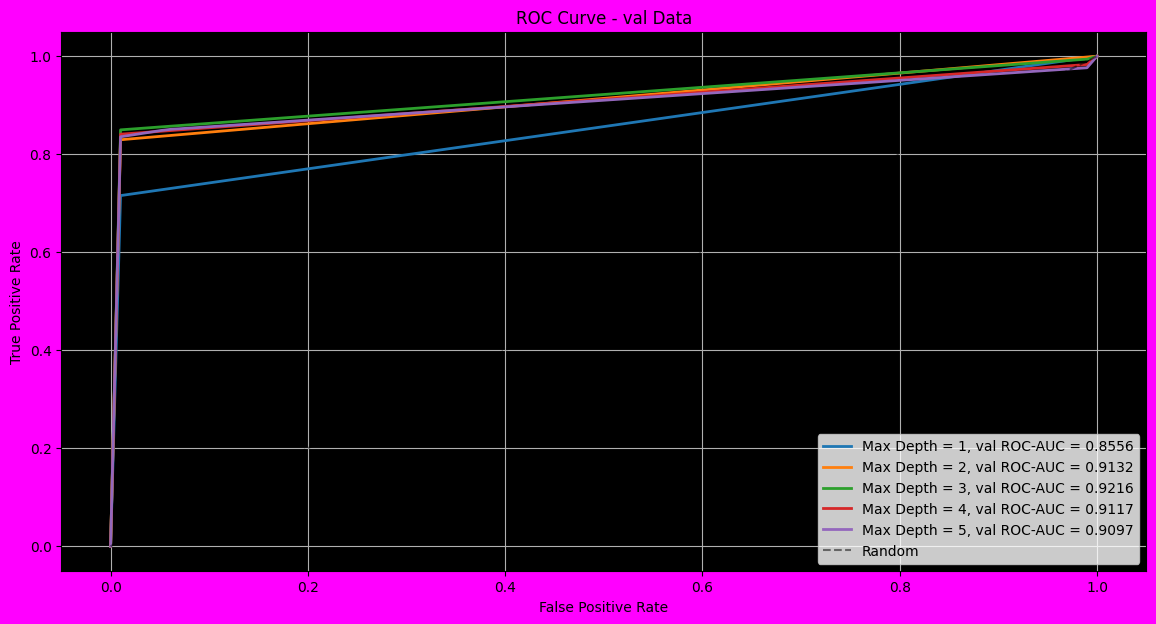

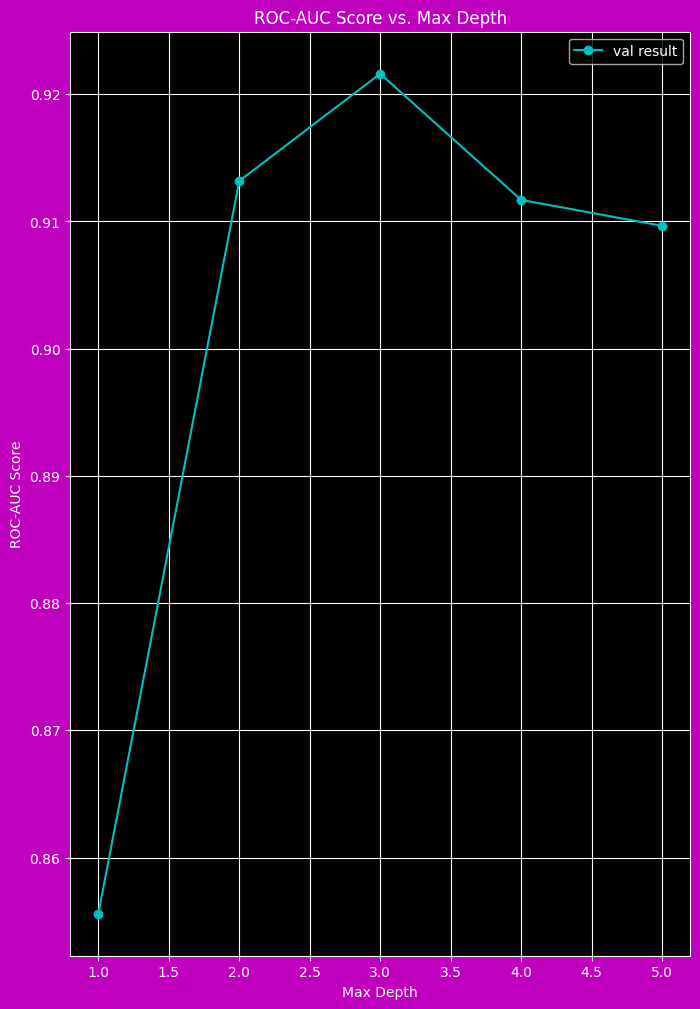





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.8555924214014032, 0.9131749932122978, 0.9216053227752736, 0.9116927614912932, 0.9096538886850475]


Best Max Depth: 3


Best Mean ROC-AUC score for val data: 0.9216053227752736


Mean precision val score for best C 0.9510962145672518


Mean recall val score for best C 0.8441196298339154


Mean f1 val score for best C 0.8931719488735096






In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")
print("\n")
print("==============================================Decision Tree:================================================")
print("\n")

# Defining your values of max_depth

max_depth_values = [1, 2, 3, 4, 5]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of max_depth

for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        # Creating a decision tree classifier with the specified max_depth value

        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for val data for all values of Max Depth

print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("\n")
print("Best Max Depth:", best_max_depth)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")

**Narrowing max depth to 2,3,4**

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

# Defining the parameters to be tuned

params = {'max_depth': [2, 3, 4],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()

# Printing the time taken to fit the model

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 1.95 seconds
Best ROC AUC score:  0.9441137407981829
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [85]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)
print("\n")

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)
print("\n")

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)
print("\n")

Mean test scores:


{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9131749932122978
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9131749932122978
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9131749932122978
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9131749932122978
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9131749932122978
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9131749932122978
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9131749932122978
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9131749932122978
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9131749932122978
{'criterion': 'gini', 'max_depth': 3, 'mi

#**Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



================================================Random Forest:==============================================


n_estimators = 10
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 0.769413948059082 seconds
Train: [    0     1     2 ... 18362 18363 18364] val: [ 6113  6114  6115 ... 12691 12709 12749]
Time elapsed: 0.7802574634552002 seconds
Train: [    0     1     2 ... 12691 12709 12749] val: [12235 12236 12237 ... 18362 18363 18364]
Time elapsed: 0.7335922718048096 seconds
ROC-AUC Score for train data = 0.9999896651586816


ROC-AUC Score for val data = 0.9620388145365428


------------------------------------------------------------------------------------------------------------


n_estimators = 50
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 4.006255626678467 seconds
Train: [    0     1     2 ... 18362 18363 18364] val: [ 6113  6114  6115 ... 12691 12709 12749]
Time ela

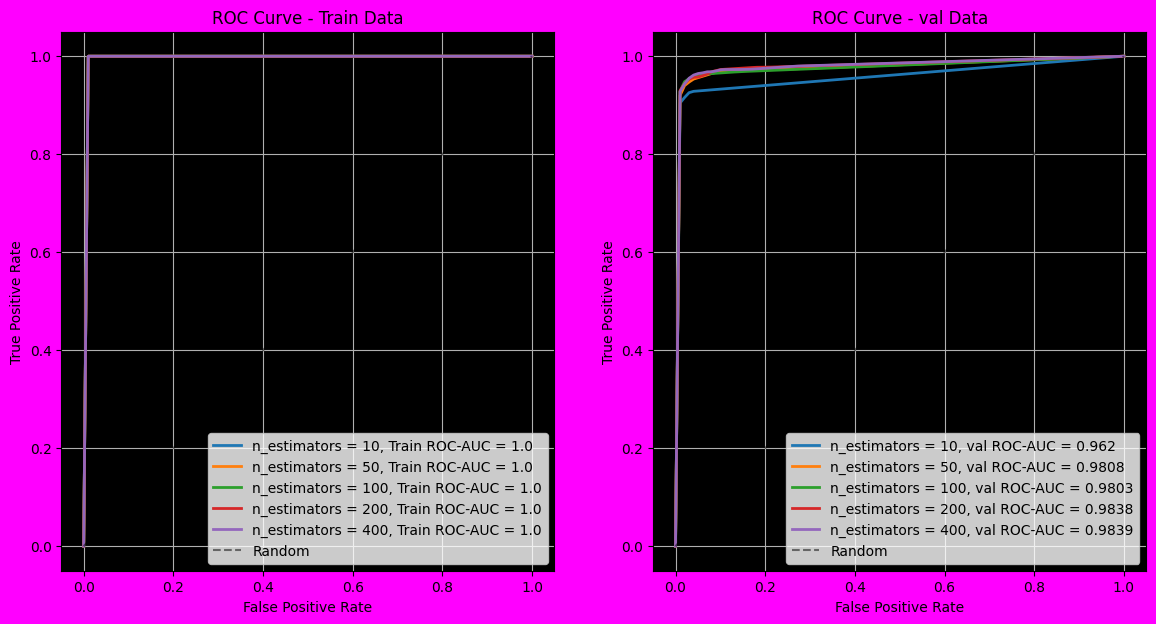

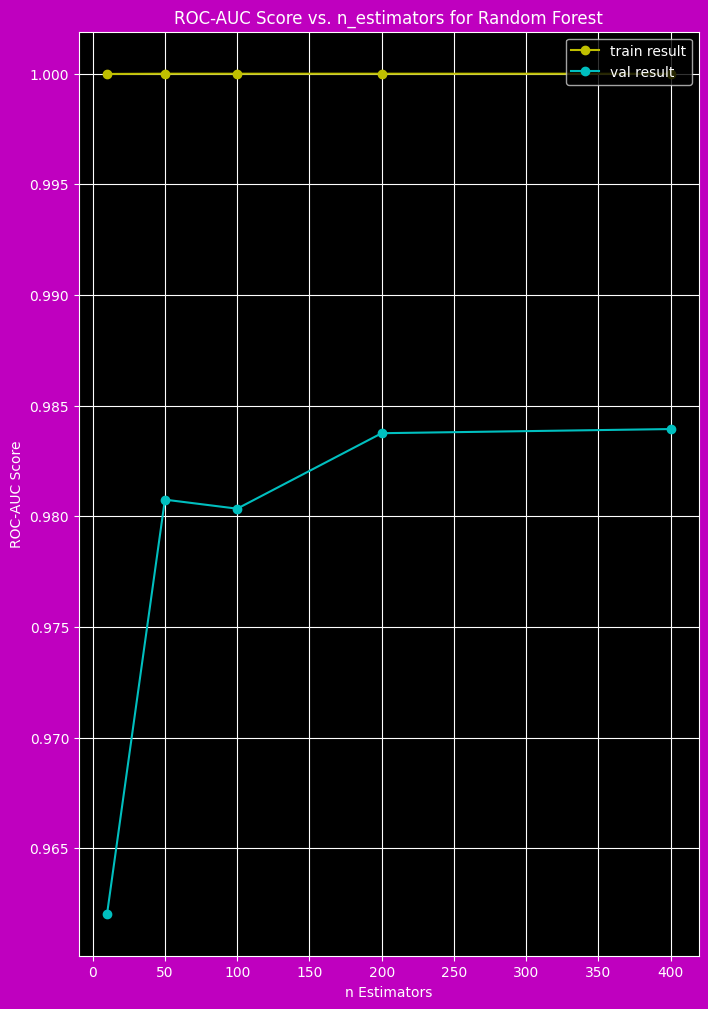





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for train data for all values of n Estimators: 
 [0.9999896651586816, 1.0, 1.0, 1.0, 1.0]


Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9620388145365428, 0.9807520783356548, 0.9803436018194017, 0.9837542388387718, 0.9839417162220739]




Best n Estimators: 400


Best Mean ROC-AUC score for val data: 0.9839417162220739






In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier




print("============================================================================================================")
print("\n")
print("================================================Random Forest:==============================================")
print("\n")

# Defining your values of n_estimators

n_values = [10, 50, 100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for train and val data

mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax1.set_facecolor('black')
ax2.set_facecolor('black')


# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = rf_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for train and val data

    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("\n")
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")

    # Plotting ROC curve for the current value of C

    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)))
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=================================Random Forest Has Run Successfully:========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax1.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc="lower right")
ax1.grid(True)  # Adding grid to the plot

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(n_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')

    # plt.xscale('log')

    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for train and val data for all values of n Estimators

print("Mean ROC-AUC scores for train data for all values of n Estimators: \n", mean_roc_auc_scores_train)
print("\n")
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_n_estimators = n_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

##**Observations**

**Narrowing to Best n Estimators: 400 It is taking Time elapsed: ~ 1517.3193807601929 seconds for each set of 3 folds**


**1. Increasing the number of trees in the forest can improve the performance of the model by reducing the variance and increasing the accuracy of the predictions.**

**2. This is because more trees mean a larger number of votes for the final prediction, leading to more stable and reliable predictions.**

**3. Moreover, increasing the number of trees can help to capture the complex relationships between the features in the dataset, leading to better generalization.**

**So taking the range of n Estimators as [500], which will take nearly 2000 seconds (35 min) to run a set of 3 folds.**



**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**min_samples_leaf: It depends on the dataset and the specific problem being addressed. Generally, a smaller min_samples_leaf will lead to a more complex decision tree that overfits the training data, while a larger min_samples_leaf will lead to a simpler decision tree that underfits the training data.**

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

# Defining the hyperparameters grid for tuning

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7],
    }

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        # pre_dispatch=6,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 107.88 seconds


Best ROC AUC score:  0.9848077496817274


Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}




In [88]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'min_samples_split': 5, 'n_estimators': 500} 0.9848077496817274
{'min_samples_split': 7, 'n_estimators': 500} 0.9843708205209234

Rank of each hyperparameter combination:


1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:


{'min_samples_split': 5, 'n_estimators': 500} 0.003748721837824454
{'min_samples_split': 7, 'n_estimators': 500} 0.0045438840618209075


#**Performing XGBoost**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



============================================XGBoost Classifier:=============================================


Learning Rate = 0.001
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 0.15098118782043457 seconds
Train: [    0     1     2 ... 18362 18363 18364] val: [ 6113  6114  6115 ... 12691 12709 12749]
Time elapsed: 0.11037111282348633 seconds
Train: [    0     1     2 ... 12691 12709 12749] val: [12235 12236 12237 ... 18362 18363 18364]
Time elapsed: 0.12725090980529785 seconds
ROC-AUC Score for val data = 0.9698040795624371


Mean precision val score: 0.0


Mean recall val score: 0.0


Mean f1 val score: 0.0
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 6113  6114  6115 ... 18362 18363 18364] val: [   0    1    2 ... 6371 6384 6402]
Time elapsed: 0.15161800384521484 seconds
Train: [    0     1     2 ... 18362 18363 18364] val: [ 6113 

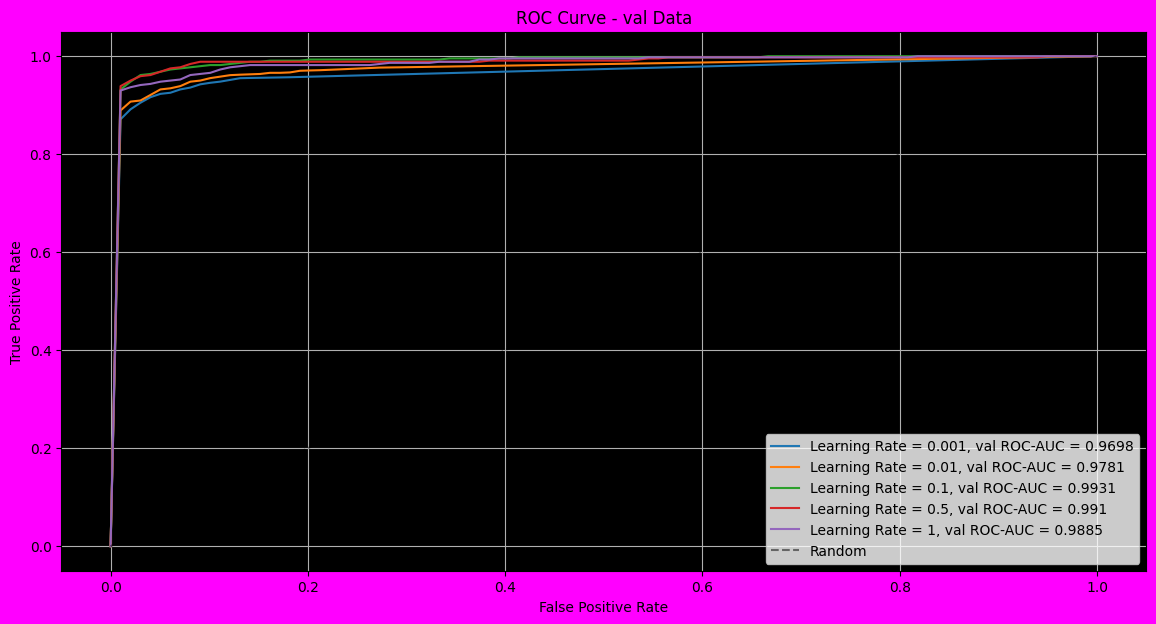

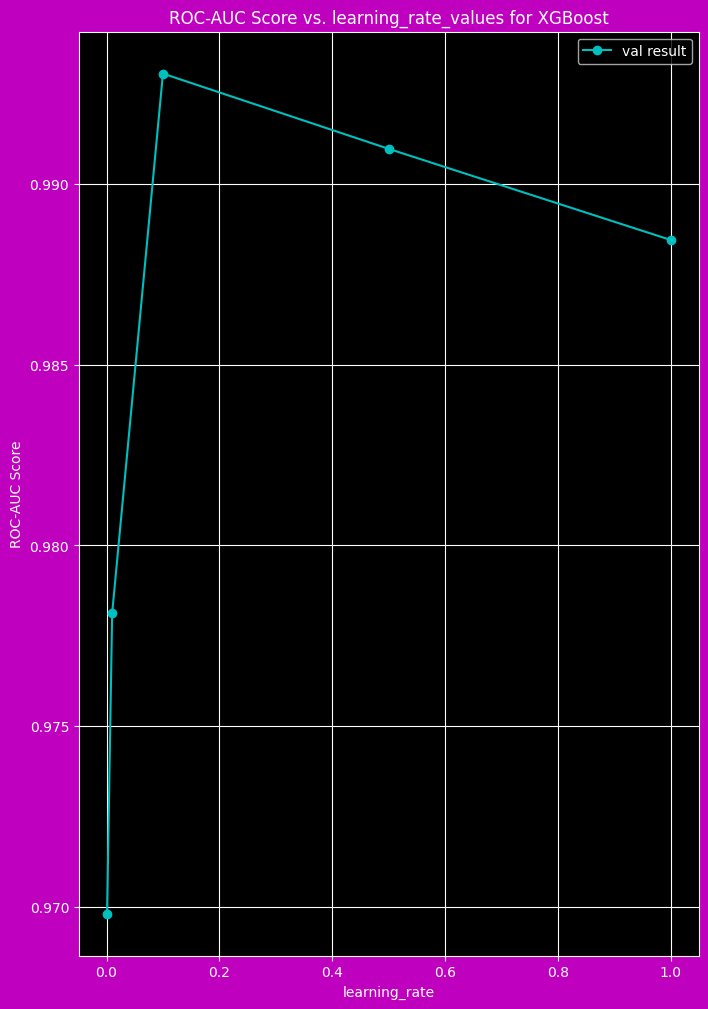





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9698040795624371, 0.9781228862485737, 0.9930619070044676, 0.9909784830094267, 0.9884552022626537]


Best Learning Rate : 0.1


Best Mean ROC-AUC score for val data: 0.9930619070044676


Mean precision val score for best Learning Rate: 0.9792723932551112


Mean recall val score for best Learning Rate: 0.8689710118281546


Mean f1 val score for best Learning Rate: 0.9206978798104717








In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")
print("\n")
print("============================================XGBoost Classifier:=============================================")
print("\n")

# Defining your values of C

learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt,y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()
print("\n")
print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Ploting ROC-AUC scores vs C

    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for val data for all values of learning_rate_values

print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("\n")
print("Best Learning Rate :", best_learning_rate)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

**Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**Best Learning Rate : 0.1**

In [90]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Defining the XGBoost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(xgb_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Time taken: 5.51 seconds


Best ROC AUC score:  0.9930720093090364


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7}




In [91]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 0.9905979936469199
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7} 0.992766947409685
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9} 0.9926884192391868
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 0.9919555956549596
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7} 0.9930720093090364
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9} 0.9927451193532785
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.5} 0.990467538246007
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7} 0.9920613890196366
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.9} 0.9913111076067219

Rank of each hyperparameter combination:


1 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
2 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
3 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9}
4 {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}
5 {'learning_rate'

#**Final Observation on Imbalanced Dataset**

**A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data**



**1. Logistic Regression { ' C ' : 0.01 , ' Penalty ' : ' L2 ' } :-**

*   **Best Mean ROC-AUC score for val data: 0.9797969874466093**
*   **Mean precision val score for best C: 0.885478588591554**
*   **Mean recall val score for best C: 0.6295975017349064**
*   **Mean f1 val score for best C: 0.7341406860856002**

---



**2. KNeighborsClassifier {'metric': 'manhattan', 'n_neighbors': 9} :-**
*  **Best Mean ROC-AUC score for val data: 0.9274613536399045**


---

**3. SVM.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} :-**

* **Best Mean ROC-AUC score for val data: 0.9565173998635063**


---


**4. DecisionTreeClassifier {'criterion': 'entropy', '': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} :-**

* **Best Mean ROC-AUC score for val data: 0.9337472016466822**

* **Mean precision val score for best max_depth: 0.8480952241800844**

* **Mean recall val score for best max_depth: 0.71578379211967**

* **Mean f1 val score for best max_depth: 0.7752315571186218**


---

**5. RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} :-**

* **Best Mean ROC-AUC score for val data: 0.9646808744238831**

---

**6. XGBClassifier {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} :-**

* **Best Mean ROC-AUC score for val data: 0.9859738836378374**

* **Mean precision val score for best Learning Rate: 0.9233400094242072**

* **Mean recall val score for best Learning Rate: 0.779204256303493**

* **Mean f1 val score for best Learning Rate: 0.8448234879500908**

#**Evaluation Over Test Set**


**Proceeding with the model that showed the best result**


*   **Applying the best hyperparameter on the model**
*   **Predicting on the test dataset**



In [92]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
221018 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630 -1.358708   
7034   -1.870060  1.144615  1.520463 -0.324813  0.103339  0.571188 -0.018978   
6440   -2.104792 -1.700357  2.444681 -0.500963  1.904566 -1.103889 -0.243060   
3188   -0.864949 -0.769920  0.829225 -1.735165 -1.175958  0.253455  1.315697   
15868  -5.008899 -3.567746  1.021427  3.768790  5.280372 -3.174799 -2.478539   

              V8        V9       V10       V11       V12       V13       V14  \
221018  0.672409 -3.188001 -4.937427  3.723933 -4.603176  1.019180 -6.619090   
7034    0.441588  1.976561 -0.220849  1.521003 -0.953793  2.317437  0.679833   
6440   -0.970038  2.204698  0.491798  2.244565 -2.172107  1.931106  0.385315   
3188    0.118620  0.981120 -1.738615  0.971364  0.680659 -1.350503  0.269613   
15868  -0.348031 -0.648985  1.898582 -0.190211 -0.073993  0.070418  0.318212   

             V15       V16       V17       V18       V19       V20       V21  \
221018 -0.590224 -4.472548 -7.165044 -1.581128  1.930380  0.264699  0.861308   
7034   -2.741946 -0.426633  0.618127 -0.272849 -0.366897  0.032567 -0.270466   
6440   -0.315036  0.786114 -0.873448  0.791680 -0.432742 -0.568108 -0.275233   
3188   -0.277642 -1.189251  0.397299  0.093907  1.143614  0.553799  0.293608   
15868   1.352926 -0.234920  0.113104 -0.974804  0.322585 -2.432219 -0.640997   

            V22       V23       V24       V25       V26       V27       V28  \
221018 1.249301  1.850627 -0.117471  1.219815  0.000251  1.036011  0.004367   
7034   0.162836 -0.005604 -0.285377  0.152556  0.334377  0.017770 -0.011909   
6440   0.626030 -0.795250  0.112904 -0.711995  0.742631 -0.760977 -0.529885   
3188   0.542974  0.589833  0.033605 -0.222383 -0.049898  0.057414  0.159841   
15868  0.091000 -1.968210  0.353708 -0.223773  0.241232  0.453529  0.553549   

           Amount  
221018 320.010000  
7034     0.010000  
6440    69.000000  
3188   324.550000  
15868    7.610000

In [93]:
y_test_saved.head()

221018   1.000000
7034     0.000000
6440     0.000000
3188     0.000000
15868    0.000000
Name: Class, dtype: float64

**As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field**

In [94]:
scaler = RobustScaler()

# Transforming the test data

X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [95]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
221018 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630 -1.358708   
7034   -1.870060  1.144615  1.520463 -0.324813  0.103339  0.571188 -0.018978   
6440   -2.104792 -1.700357  2.444681 -0.500963  1.904566 -1.103889 -0.243060   
3188   -0.864949 -0.769920  0.829225 -1.735165 -1.175958  0.253455  1.315697   
15868  -5.008899 -3.567746  1.021427  3.768790  5.280372 -3.174799 -2.478539   

              V8        V9       V10       V11       V12       V13       V14  \
221018  0.672409 -3.188001 -4.937427  3.723933 -4.603176  1.019180 -6.619090   
7034    0.441588  1.976561 -0.220849  1.521003 -0.953793  2.317437  0.679833   
6440   -0.970038  2.204698  0.491798  2.244565 -2.172107  1.931106  0.385315   
3188    0.118620  0.981120 -1.738615  0.971364  0.680659 -1.350503  0.269613   
15868  -0.348031 -0.648985  1.898582 -0.190211 -0.073993  0.070418  0.318212   

             V15       V16       V17       V18       V19       V20       V21  \
221018 -0.590224 -4.472548 -7.165044 -1.581128  1.930380  0.264699  0.861308   
7034   -2.741946 -0.426633  0.618127 -0.272849 -0.366897  0.032567 -0.270466   
6440   -0.315036  0.786114 -0.873448  0.791680 -0.432742 -0.568108 -0.275233   
3188   -0.277642 -1.189251  0.397299  0.093907  1.143614  0.553799  0.293608   
15868   1.352926 -0.234920  0.113104 -0.974804  0.322585 -2.432219 -0.640997   

            V22       V23       V24       V25       V26       V27       V28  \
221018 1.249301  1.850627 -0.117471  1.219815  0.000251  1.036011  0.004367   
7034   0.162836 -0.005604 -0.285377  0.152556  0.334377  0.017770 -0.011909   
6440   0.626030 -0.795250  0.112904 -0.711995  0.742631 -0.760977 -0.529885   
3188   0.542974  0.589833  0.033605 -0.222383 -0.049898  0.057414  0.159841   
15868  0.091000 -1.968210  0.353708 -0.223773  0.241232  0.453529  0.553549   

          Amount  
221018  5.610998  
7034   -0.294150  
6440    0.978963  
3188    5.694778  
15868  -0.153903

In [96]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# Initialising the model with optimum hyperparameters

start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
print("\n")

# Predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")
print("\n")

# Initialising the model with optimum hyperparameters

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")
print("\n")

# initialising the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")
print("\n")




LogisticRegression ROC-AUC Score on Test Set = 0.9725329890992541


LogisticRegression F1-Score on Test Set = 0.7407407407407407


LogisticRegression Precision on Test Set = 0.6779661016949152


LogisticRegression Recall on Test Set = 0.8163265306122449


Time taken: 0.07 seconds




KNeighbors Classifier ROC-AUC Score on Test Set = 0.9274393492336692


KNeighbors Classifier F1-Score on Test Set = 0.8387096774193548


KNeighbors Classifier Precision on Test Set = 0.8863636363636364


KNeighbors Classifier Recall on Test Set = 0.7959183673469388


Time taken: 0.91 seconds




Decision Tree Classifier ROC-AUC Score on Test Set = 0.9277108433734939


Decision Tree Classifier F1-Score on Test Set = 0.6964285714285715


Decision Tree Classifier Precision on Test Set = 0.6190476190476191


Decision Tree Classifier Recall on Test Set = 0.7959183673469388


Time taken: 0.33 seconds






In [97]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5, objective='binary:logistic', eval_metric='auc')
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("\n")

print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("\n")

print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")


XGBOOST Classifier ROC-AUC Score on Test Set = 0.9618166543725923


XGBOOST Classifier F1-Score on Test Set = 0.7207207207207208


XGBOOST Classifier Precision on Test Set = 0.6451612903225806


XGBOOST Classifier Recall on Test Set = 0.8163265306122449


Time taken: 0.14 seconds




In [98]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

start_time = time.time()
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')
clf.fit(X_train_pt, y_train_pt)
y_pred_proba = clf.predict_proba(X_test_saved)
y_pred = clf.predict(X_test_saved)
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved, y_pred=y_pred)

print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")

print("F1 Score on Test Set =", f1)
print("\n")

print("Precision on Test Set =", preci_sion)
print("\n")

print("Recall on Test Set =", re_call)
end_time = time.time()
print("\n")

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")
print("\n")


SVM Classifier ROC-AUC Score on Test Set = 0.9391545774936481


F1 Score on Test Set = 0.0


Precision on Test Set = 0.0


Recall on Test Set = 0.0


Time taken: 8.35 seconds






In [99]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("Random Forest Classifier F1-Score on Test Set =", f1)
print("\n")

print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("\n")

print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")
print("\n")


Random Forest Classifier ROC-AUC Score on Test Set = 0.9101303171871158
Random Forest Classifier F1-Score on Test Set = 0.6776859504132232


Random Forest Classifier Precision on Test Set = 0.5694444444444444


Random Forest Classifier Recall on Test Set = 0.8367346938775511


Time taken: 66.76 seconds






**B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set**

**1. Logistic Regression {'C': 0.01, 'penalty': 'l2'} :-**

---


* **Logistic Regression ROC-AUC Score on Test Set =  0.9752271441778737**
* **Logistic Regression F1-Score on Test Set      =  0.5977011494252873**
* **Logistic Regression Precision on Test Set     =  0.4785276073619632**
* **Logistic Regression Recall on Test Set        =  0.7959183673469388**



---

**2. KNeighbors Classifier {'metric': 'manhattan', 'n_neighbors': 9} :-**


---

* **KNeighbors Classifier ROC-AUC Score on Test Set = 0.9385655570613163**
* **KNeighbors Classifier F1-Score on Test Set      = 0.824858757062147**
* **KNeighbors Classifier Precision on Test Set     = 0.9240506329113924**
* **KNeighbors Classifier Recall on Test Set        = 0.7448979591836735**


---

**3. SVM.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} :-**


---
* **SVM ROC-AUC Score on Test Set = 0.9701114653796241**
* **SVM F1-Score on Test Set      = 0.8121827411167513**
* **SVM Precision on Test Set     = 0.8080808080808081**
* **SVM Recall on Test Set        = 0.8163265306122449**


---

**4. Decision Tree Classifier {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} :-**


---

* **Decision Tree Classifier ROC-AUC Score on Test Set = 0.9314465304973987**
* **Decision Tree Classifier F1-Score on Test Set      = 0.8200000000000001**
* **Decision Tree Classifier Precision on Test Set     = 0.803921568627451**
* **Decision Tree Classifier Recall on Test Set        = 0.8367346938775511**


---

**5. Random Forest Classifier {'min_samples_split': 5, 'n_estimators': 500} :-**

---
* **Random Forest Classifier ROC-AUC Score on Test Set = 0.9623530686894904**
* **Random Forest Classifier F1-Score on Test Set      = 0.8282828282828283**
* **Random Forest Classifier Precision on Test Set     = 0.82**
* **Random Forest Classifier Recall on Test Set        = 0.8367346938775511**


---

**6.XGB Classifier  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} :-**


---
* **XGB Classifier ROC-AUC Score on Test Set = 0.9713649035866456**
* **XGB Classifier F1-Score on Test Set      = 0.7962085308056872**
* **XGB Classifier Precision on Test Set     = 0.7433628318584071**
* **XGB Classifier Recall on Test Set        = 0.8571428571428571**


---




#**Best model is Logistic Regression**

#**Table Of Scores**

<table>
<tr>
<th>Model</th><th>Parameters</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Logistic Regression</th><th>{'C': 0.01, 'penalty': 'l2'}</th><th>0.975227144</th><th>0.59770115</th><th>0.47852761</th><th>0.79591836</th>
</tr>
<tr>
<th>KNeighborsClassifier</th><th>	{'metric': 'manhattan', 'n_neighbors': 9}</th><th>0.938565557</th><th>0.82485875</th><th>0.92405063</th><th>0.74489795</th>
</tr>
<tr>
<th>SVM</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>0.970111465</th><th>0.81218274</th><th>0.80808081</th><th>0.81632653</th>
</tr>
<tr>
<th>Decision Tree</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}</th><th>0.931446530</th><th>0.82000000</th><th>0.80392156</th><th>0.83673469</th>
</tr>
<tr>
<th>Random Forest</th><th>{'min_samples_split': 5, 'n_estimators': 500}</th><th>0.962353068</th><th>0.82828283</th><th>0.82000000</th><th>0.83673469</th>
</tr>
<tr>
<th>XGBoost</th><th>{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}	</th><th>0.971364903</th><th>0.79620853</th><th>0.74336283</th><th>0.85714286</th>
</tr>
</table>





**Best model is Logistic Regression based on ROC-AUC Score**


**Best model is Random Forest Classifier based on F1 Score**

#**Printing the important features of the best model to understand the dataset**

Top var = 17
2nd Top var = 14
3rd Top var = 10


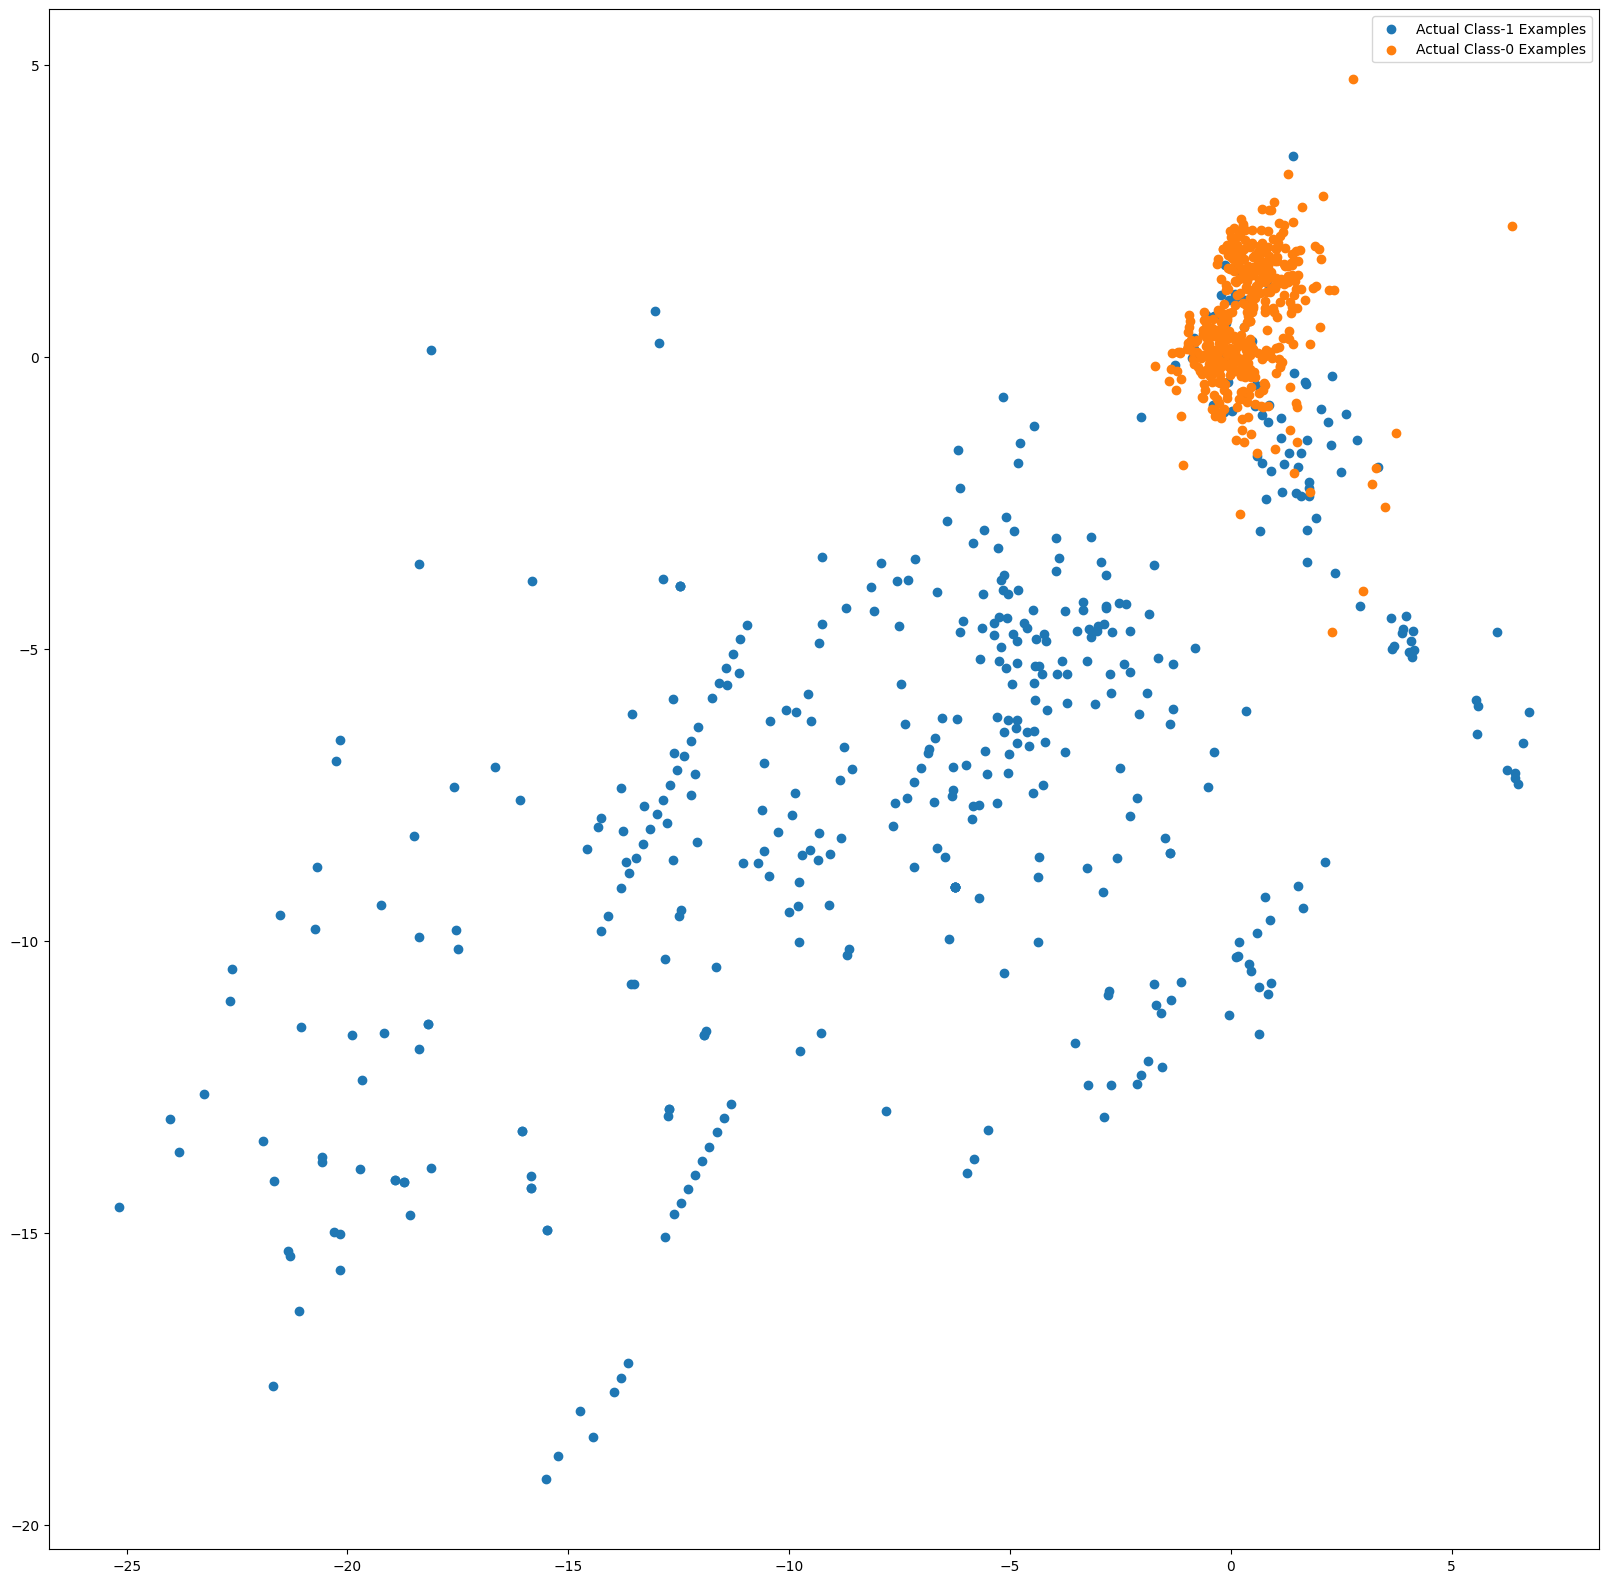

In [100]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#**Model building with balancing Classes**

**Performing class balancing with:**

**1. Random Oversampling**

**2. SMOTE (Synthetic Minority Oversampling TEchnique)**

**3. ADASYN (Adaptive Synthetic)**

#**I. Random Sampling**

**Building different models on the balanced dataset and seeing the result**

In [101]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [102]:
from imblearn.over_sampling import RandomOverSampler

# Defining the RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resampling the training data using RandomOverSampler

X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

**Printing the class distribution after applying Random Oversampling**

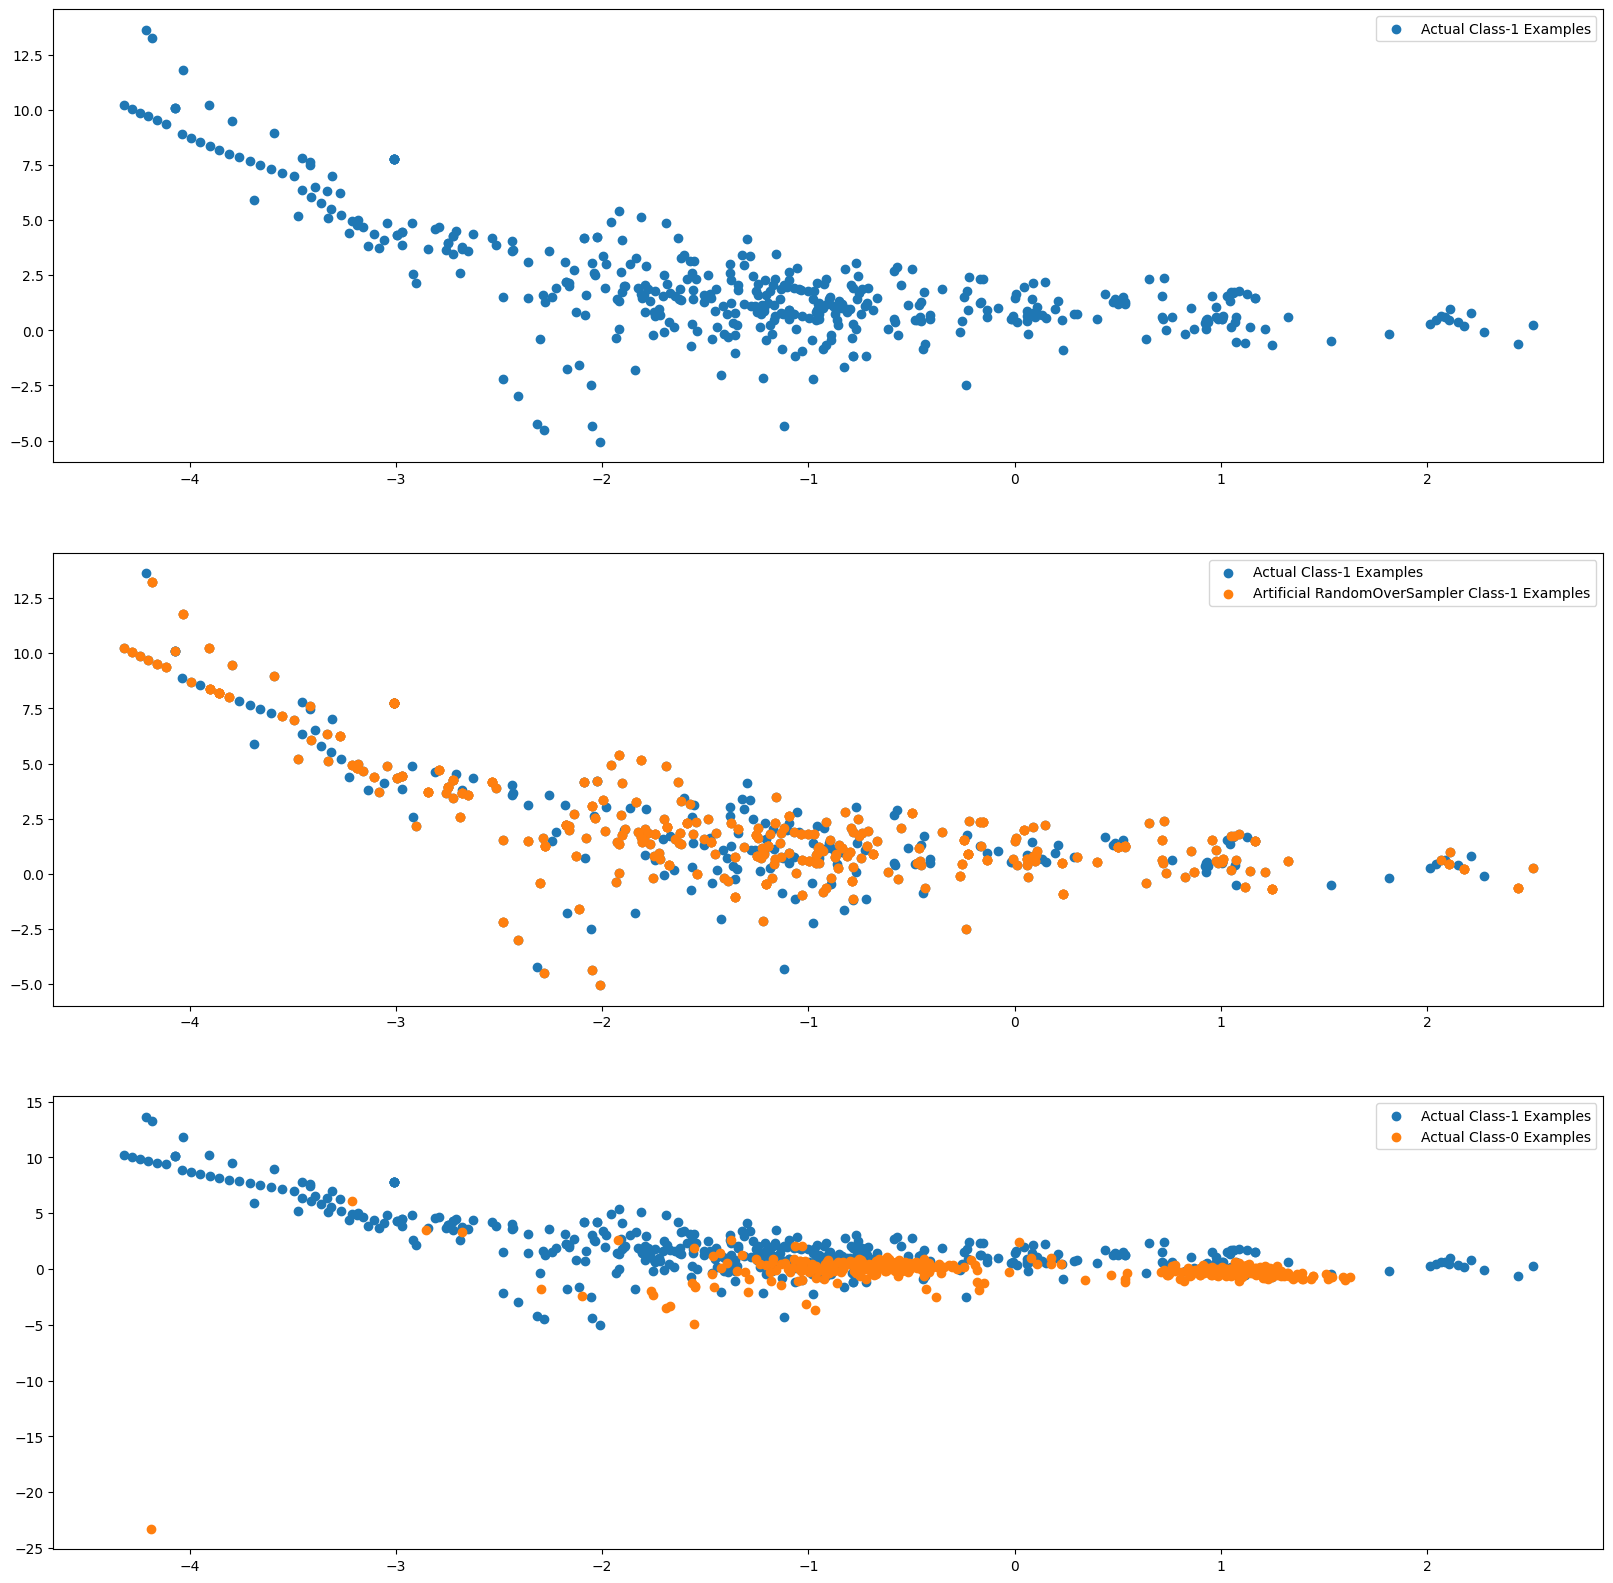

In [103]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from RandomOverSampler are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from RandomOverSampler, we do

X_ros_train_pt_1 = X_ros_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_ros_train_pt_1[:X_train_pt_1.shape[0], 0], X_ros_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

**SOME MORE VISUALIZATION**

*   **Checking the distribution of our target variable: We use value_counts() method to check the distribution of our target variable.**

*  **y_ros_train_pt is our target variable, we can use the following code to check the distribution of its values:**

In [104]:
print(y_ros_train_pt.value_counts())

0.000000    17922
1.000000    17922
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

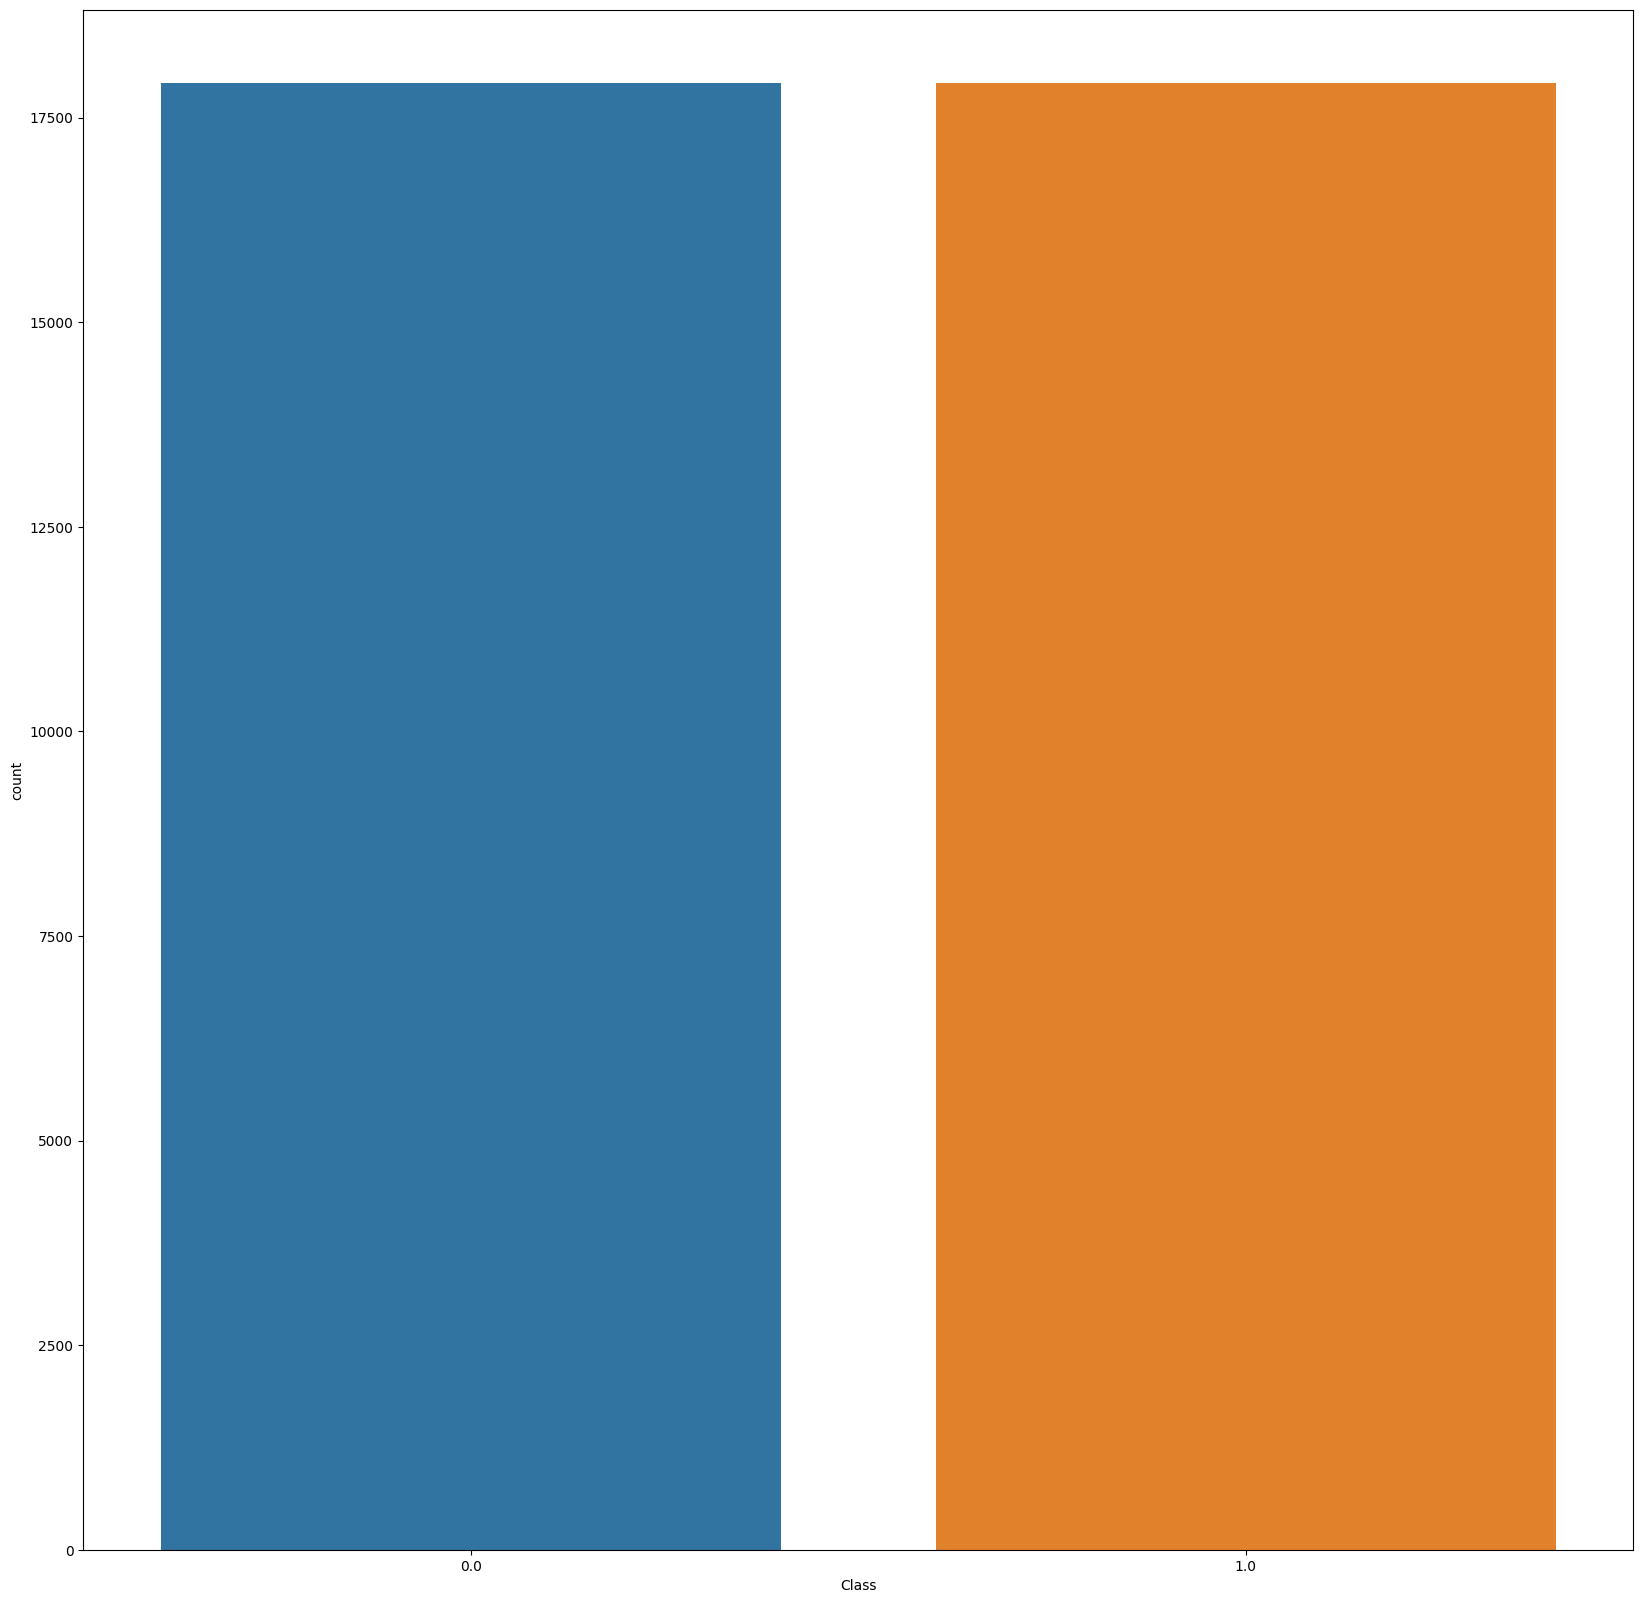

In [105]:
import seaborn as sns

sns.countplot(x=y_ros_train_pt)

(array([ 983., 1559., 1393., 3416., 6575., 9423., 2096., 7295., 2589.,
         515.]),
 array([-4.31971532, -3.63660364, -2.95349196, -2.27038028, -1.58726861,
        -0.90415693, -0.22104525,  0.46206643,  1.1451781 ,  1.82828978,
         2.51140146]),
 <BarContainer object of 10 artists>)

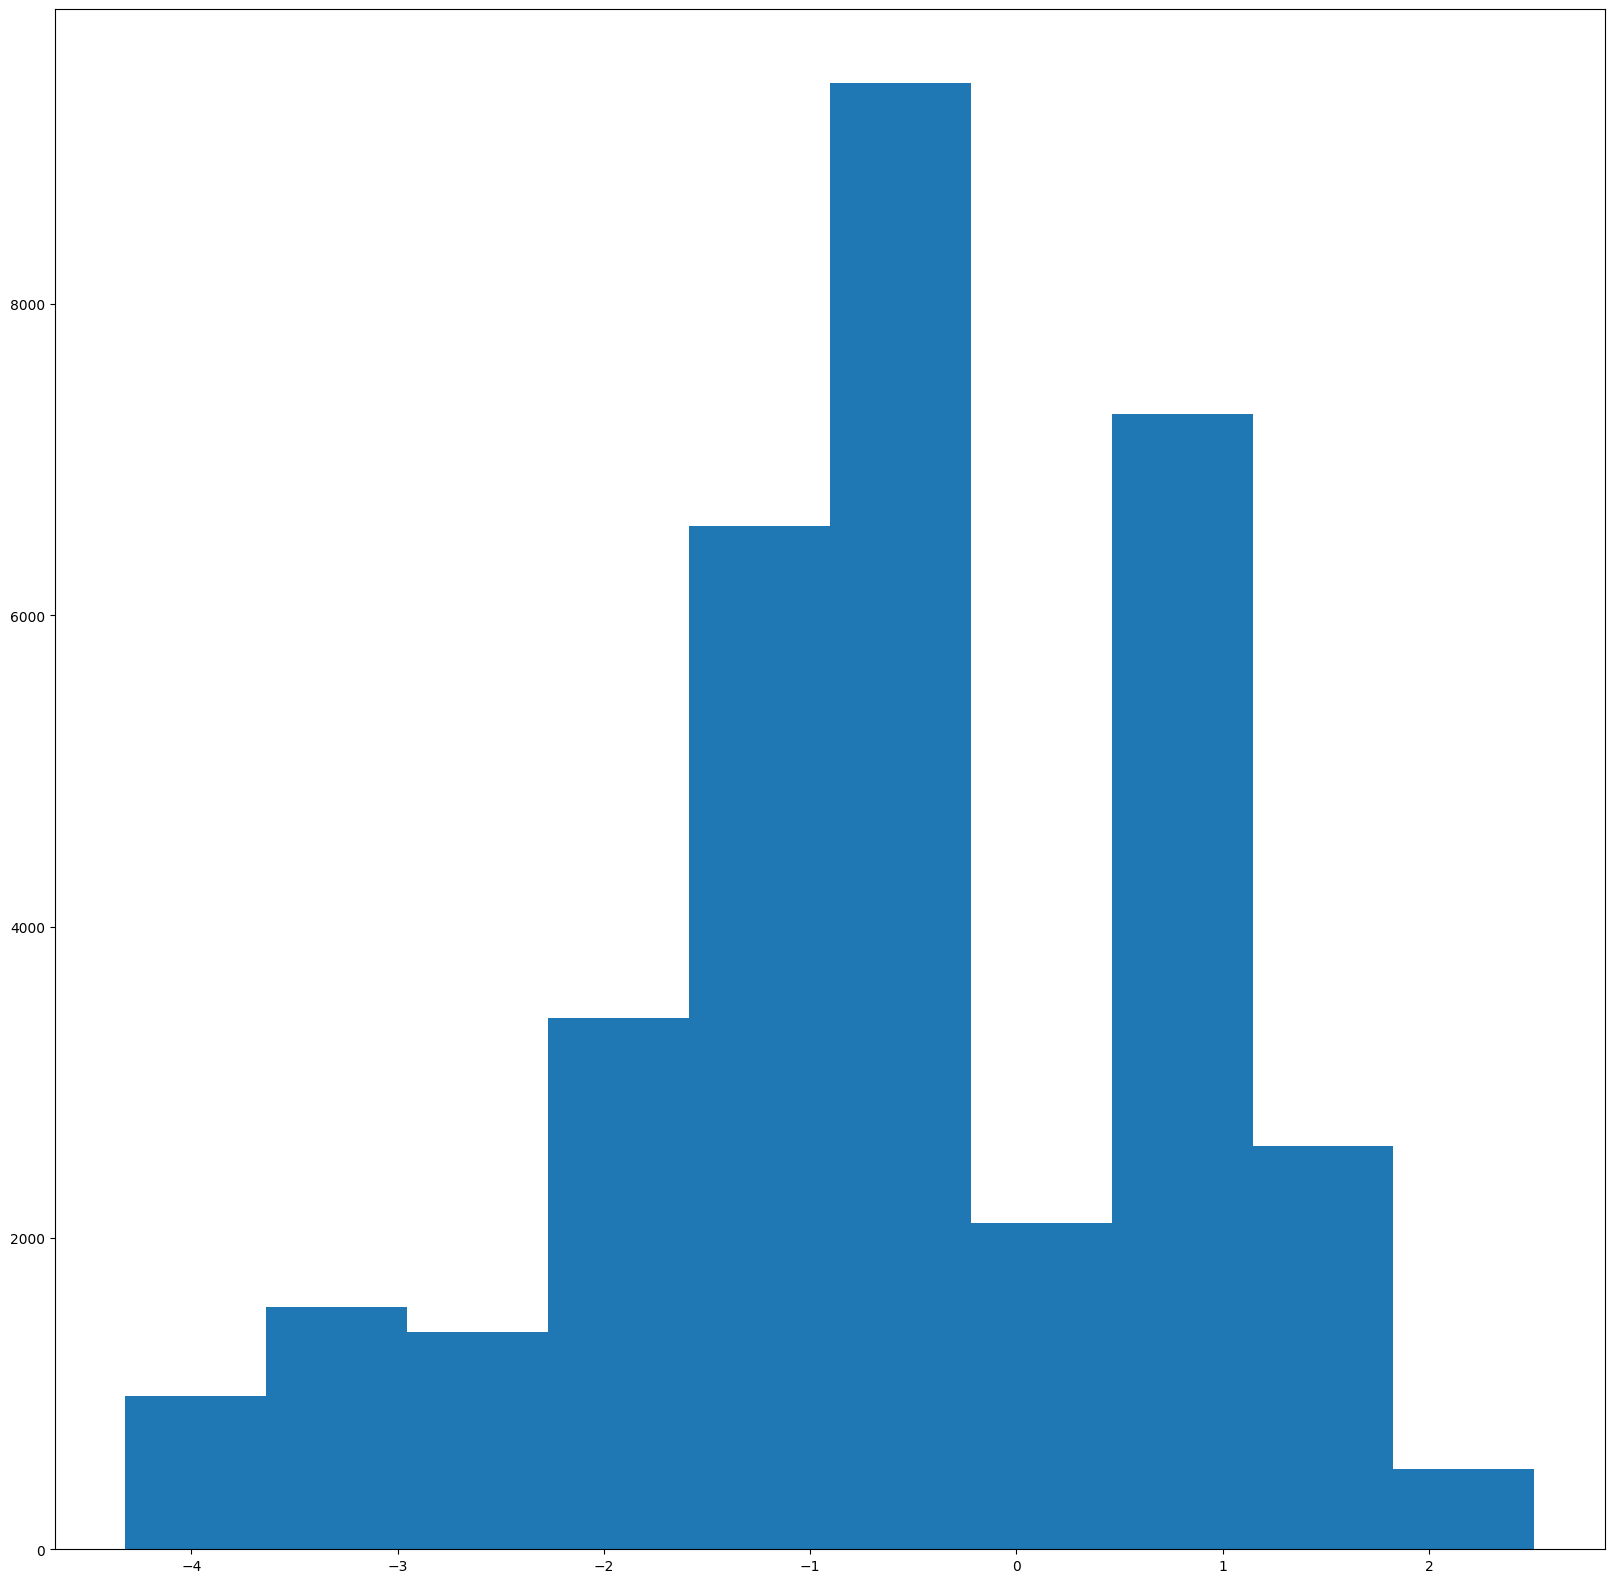

In [106]:
import matplotlib.pyplot as plt

plt.hist(X_ros_train_pt[:,0])

#**1. Performing Logistic Regression**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.14353084564208984 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 0.14316606521606445 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 0.13700008392333984 seconds
ROC-AUC Score for val data = 0.9925754787503651
Mean precision val score: 0.9726100951484433
Mean recall val score: 0.9487780381653833
Mean f1 val score: 0.9605439826506411
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.15979242324829102 seconds
Train: [    0  

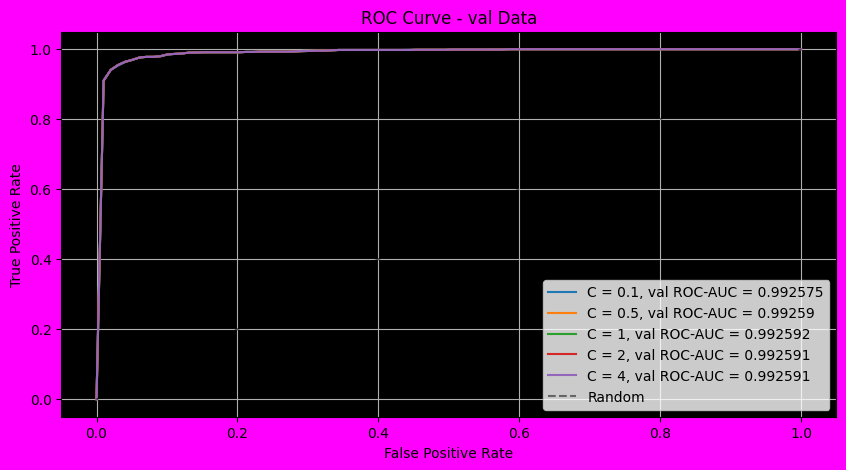

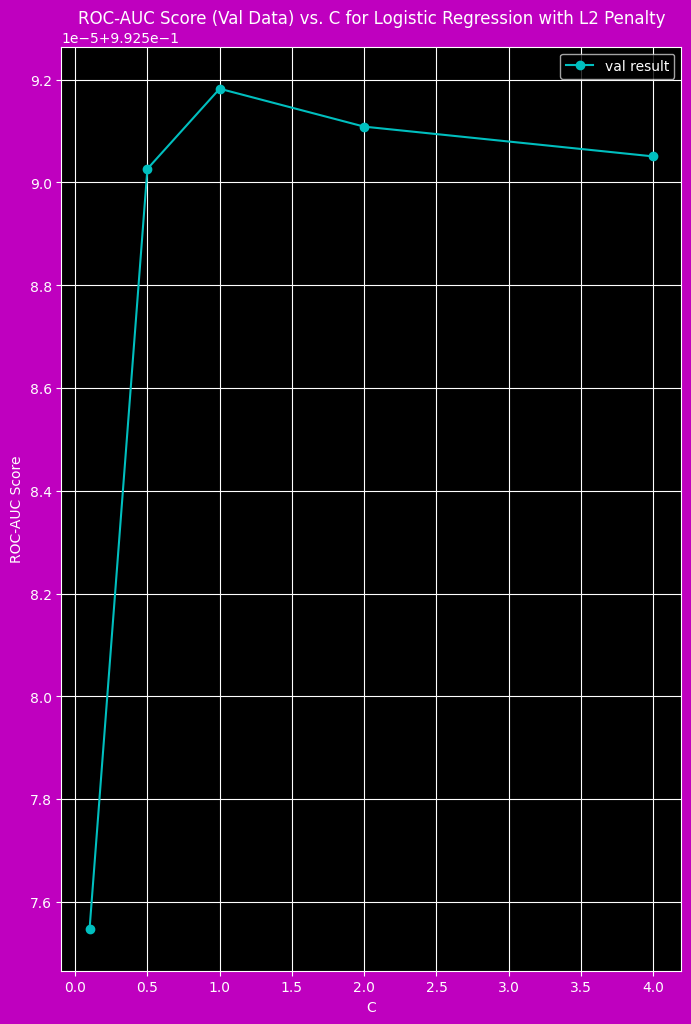





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9925754787503651, 0.9925902640191341, 0.992591823804279, 0.9925910859418453, 0.9925905068599351]
Best C: 1
Best Mean ROC-AUC score for val data: 0.992591823804279
Mean precision val score for best C 0.97230578514826
Mean recall val score for best C 0.9496707956701261
Mean f1 val score for best C 0.9608502544823331
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Defining values of C

C_values = [0.1, 0.5, 1, 2, 4]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for Logistic Regression classifier for val data

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for  and val data for all values of C

print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Defining the logistic regression parameters for Stratified K-fold cross-validation

params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Defining the logistic regression classifier

logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        pre_dispatch=6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 6.48 seconds
Best ROC AUC score:  0.9925918238042789
Best hyperparameters:  {'C': 1, 'penalty': 'l2'}


In [109]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9924448023793317
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9925754787503651
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9925902640191341
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9925918238042789
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9925910859418452
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9925905068599351

Rank of each hyperparameter combination:


1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.00064960166241172

#**2. Performing KNN Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

============================================KNN Classifier:===============================================
K = 3
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.6384947299957275 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 0.8550221920013428 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 0.8389396667480469 seconds
Mean ROC-AUC for val data: 0.9990514451512107
------------------------------------------------------------------------------------------------------------
K = 5
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.4804565906524658 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 0.14864015579223633 seconds
Train: [    0     1     2 ... 29867 2986

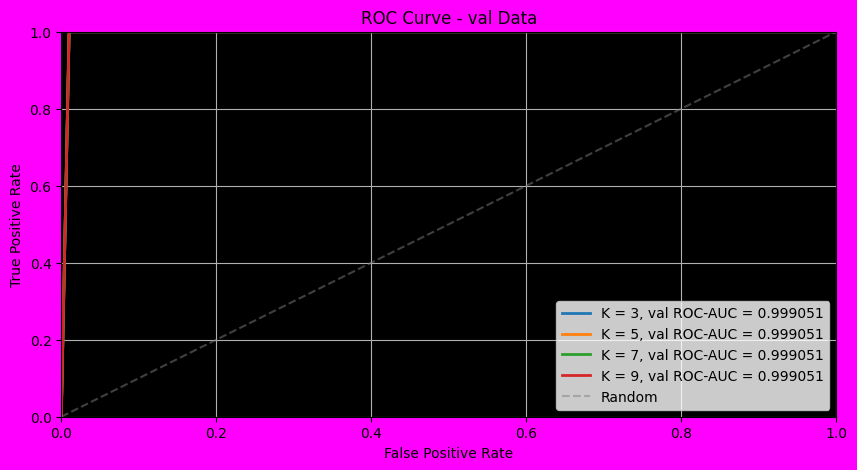

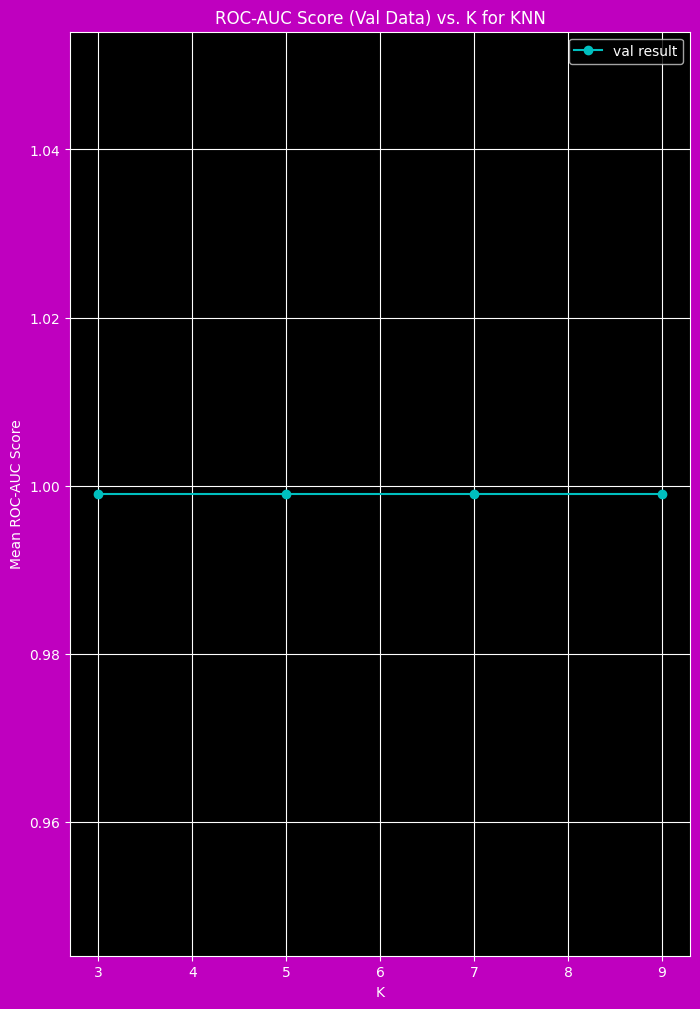





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of K: 
 [0.9990514451512107, 0.9990514451512108, 0.9990514451512107, 0.9990514451512107]


Best K: 9


Best Mean ROC-AUC score for val data: 0.992591823804279


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Defining your values of K (number of neighbors)

K_values = [3, 5, 7, 9]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of K

for k in K_values:
    print("K =", k)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt[train_index], y_ros_train_pt[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores and mean false positive rates for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr

    print("Mean ROC-AUC for val data:", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of k

    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)).format(k))


print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plotting ROC curves of KNN Classifier for val data

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. K for KNN')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printting mean ROC-AUC scores for train and val data for all values of K

print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)
print("\n")
# Finding the index of maximum mean ROC-AUC score for val data

if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_k = K_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

In [111]:
if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
print(best_k)

9


**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**Manhattan distance, also known as L1 distance, computes the distance between two points by summing the absolute differences of their coordinates. It's suitable for high-dimensional data where the features are of varying importance and the data is sparse. In other words, it's useful when the data has a lot of zeros or null values.**

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Defining the KNN parameters for Stratified K-fold cross-validation

params = {'n_neighbors': [9]}

# Defining the KNN classifier

knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")
# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 5.73 seconds


Best ROC AUC score:  0.9990514451512107


Best hyperparameters:  {'n_neighbors': 9}




In [113]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'n_neighbors': 9} 0.9990514451512107

Rank of each hyperparameter combination:


1 {'n_neighbors': 9}

Standard deviation of test scores:


{'n_neighbors': 9} 0.00014225587304969323


#**3. Performing SVM Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

=============================================SVM Classifier:================================================
C = 0.1 Kernel = rbf
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 39.51171064376831 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 37.93673872947693 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 42.587644815444946 seconds
ROC-AUC Score for val data = 0.9951836496633647
------------------------------------------------------------------------------------------------------------
C = 1 Kernel = rbf
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 25.3476402759552 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 23.757946968078613 seconds
Train: [    0

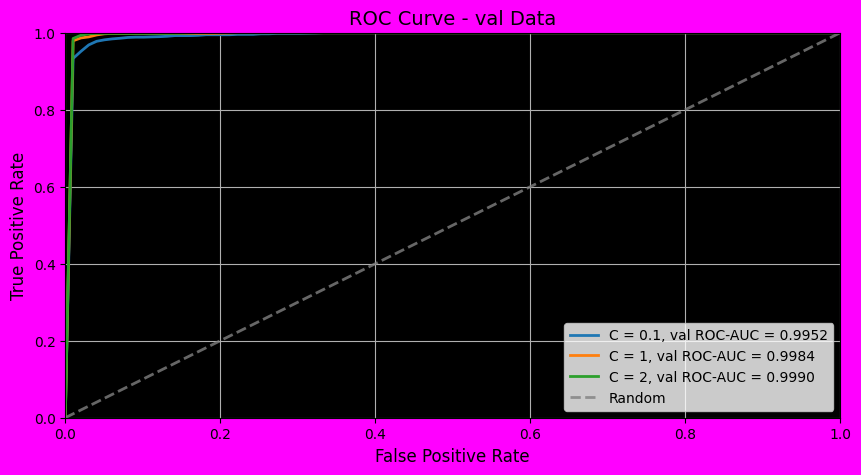

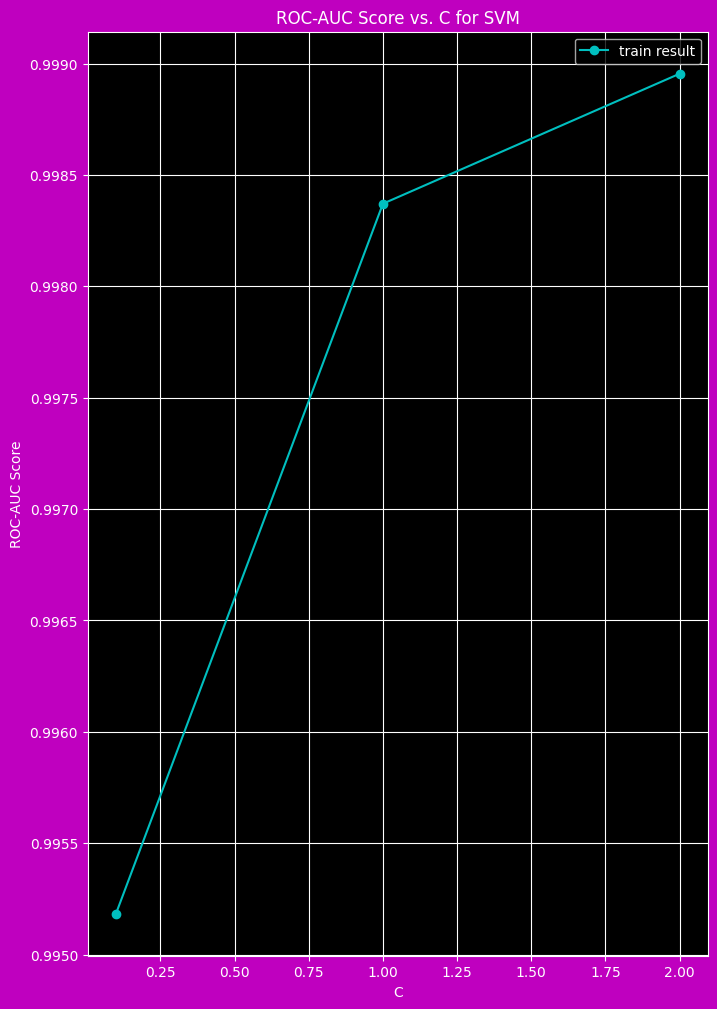





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9951836496633647, 0.9983710799470399, 0.9989545890317327]
Best C: 2
Best Mean ROC-AUC score for val data: 0.9989545890317327
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [114]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("=============================================SVM Classifier:================================================")

# Define your values of C
C_values = [0.1, 1, 2]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        # y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt[train_index], y_ros_train_pt[val_index]

        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curves for the current value of C for val data
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))

print("=======================================SVM Has Run Successfully:============================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Set plot properties for val data
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)




print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [115]:
from sklearn.model_selection import GridSearchCV
import time
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}


# Define the SVM classifier
svm_classifier = svm.SVC()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 42.84 seconds
Best ROC AUC score:  0.998219565967274
Best hyperparameters:  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [116]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.9896967224748452
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.998219565967274

Rank of each hyperparameter combination:
1 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
2 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

Standard deviation of test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.0005471852615941788
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.00039189562415229887


#**4. Performing Decision Tree**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.10643744468688965 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 0.10033631324768066 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 0.10162711143493652 seconds
ROC-AUC Score for val data = 0.9301138265818546
Mean precision val score: 0.9656293929503045
Mean recall val score: 0.8919763419261243
Mean f1 val score: 0.9273367532536044
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.16852927207946777 seconds
Train: [    0     1     2 ...

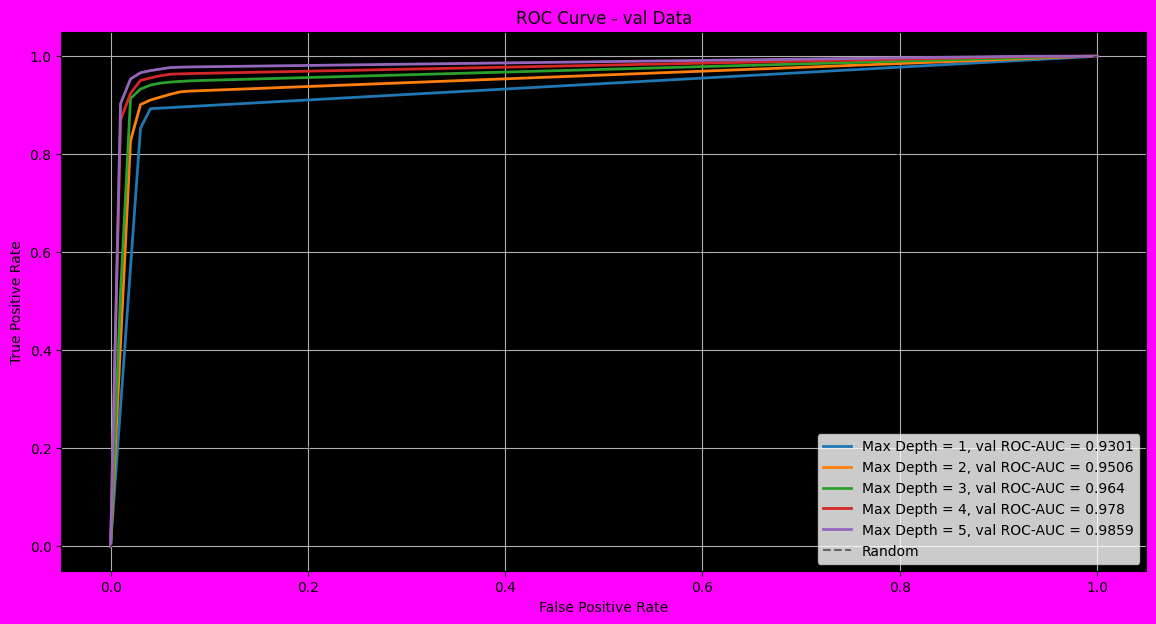

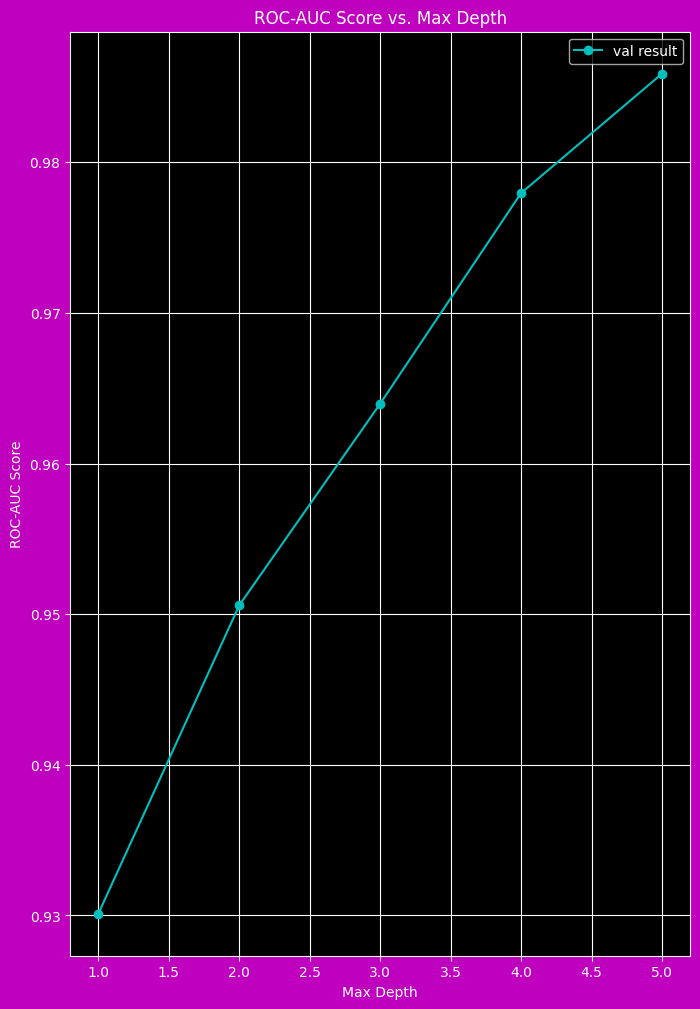





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.9301138265818546, 0.9505850632658195, 0.9639670157559221, 0.9779518345445672, 0.985875748561439]


Best Max Depth: 5


Best Mean ROC-AUC score for val data: 0.985875748561439


Mean precision val score for best Max Depth: 0.9769182851896034


Mean recall val score for best Max Depth: 0.9638991184019642


Mean f1 val score for best Max Depth: 0.9703291057270421






In [117]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Defining your values of max_depth

max_depth_values = [1, 2, 3, 4, 5]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of max_depth

for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        # Creating a decision tree classifier with the specified max_depth value

        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')

    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of Max Depth

print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])
print("\n")


print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Defining the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 4.30 seconds


Best ROC AUC score:  0.9957367289276856


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}




In [119]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")

for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9779518345445672
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9779518345445672
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9779518345445672
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9779518345445672
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9779518345445672
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9779518345445672
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9779518345445672
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9779518345445672
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9779518345445672
{'criterion': 'gini', 'max_depth': 5, 'mi

#**5. Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

================================================Random Forest:==============================================
n_estimators = 10
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.7088358402252197 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 0.7262527942657471 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 0.7418100833892822 seconds
ROC-AUC Score for val data = 0.9999442026559535
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 3.563270330429077 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 3.5593526363372803 seconds
Train: [    0 

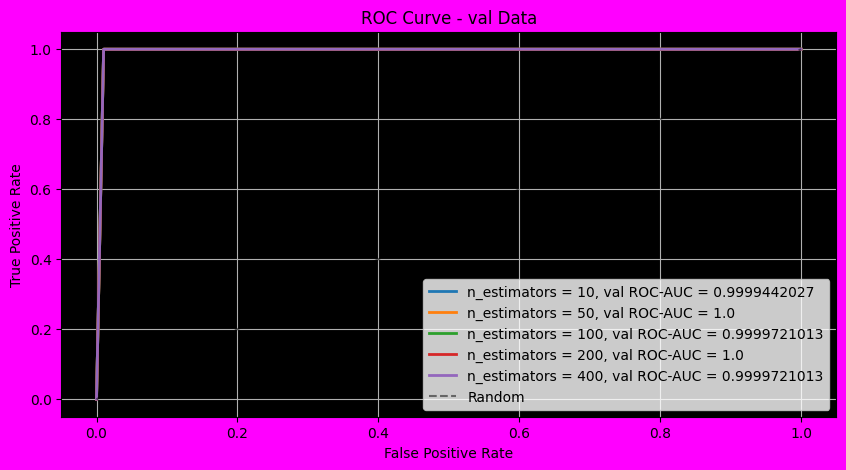

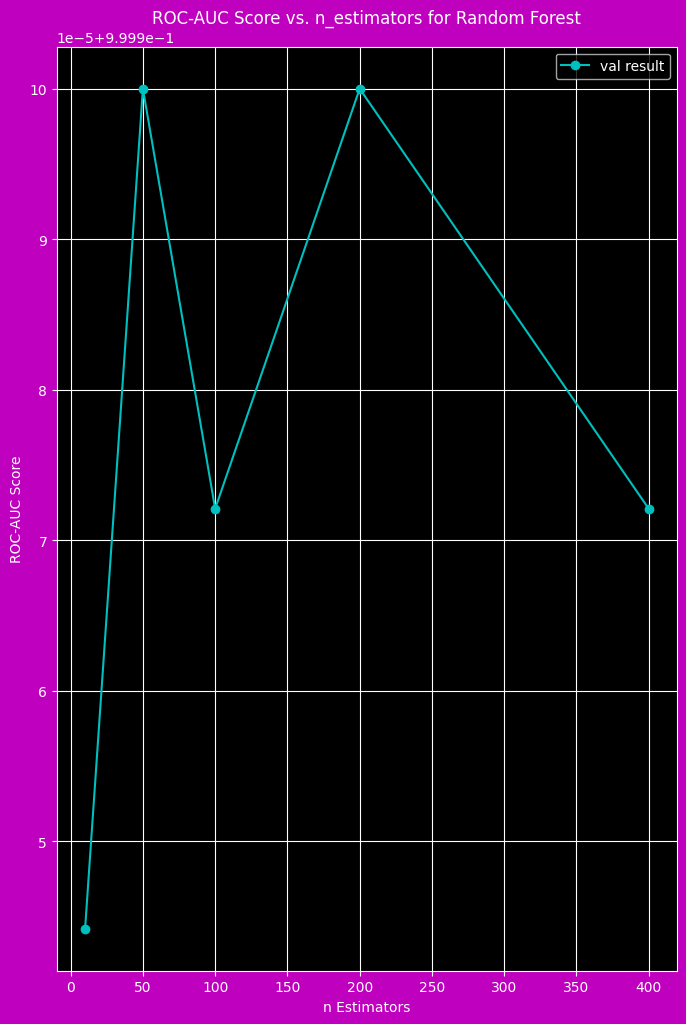





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9999442026559535, 1.0, 0.9999721013279768, 1.0, 0.9999721013279768]


Best n Estimators: 400


Best Mean ROC-AUC score for val data: 0.985875748561439


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Defining your values of n_estimators

n_values = [10, 50, 100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of n_estimators

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Settng plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Ploting ROC-AUC scores vs n_estimators

    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')

    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for val data for all values of n Estimators

print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }

# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 96.44 seconds


Best ROC AUC score:  1.0


Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}




In [122]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")

for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'min_samples_split': 5, 'n_estimators': 500} 1.0
{'min_samples_split': 7, 'n_estimators': 500} 1.0

Rank of each hyperparameter combination:


1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:


{'min_samples_split': 5, 'n_estimators': 500} 0.0
{'min_samples_split': 7, 'n_estimators': 500} 0.0


#**6. Performing XGBoost**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 2.742386817932129 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 6.938155651092529 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 3.5639419555664062 seconds
ROC-AUC Score for val data = 0.990158932579436
Mean precision val score: 0.9773454434108312
Mean recall val score: 0.9265706952349069
Mean f1 val score: 0.9512530081273524
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 2.4924802780151367 seconds
Train: [    0     1  

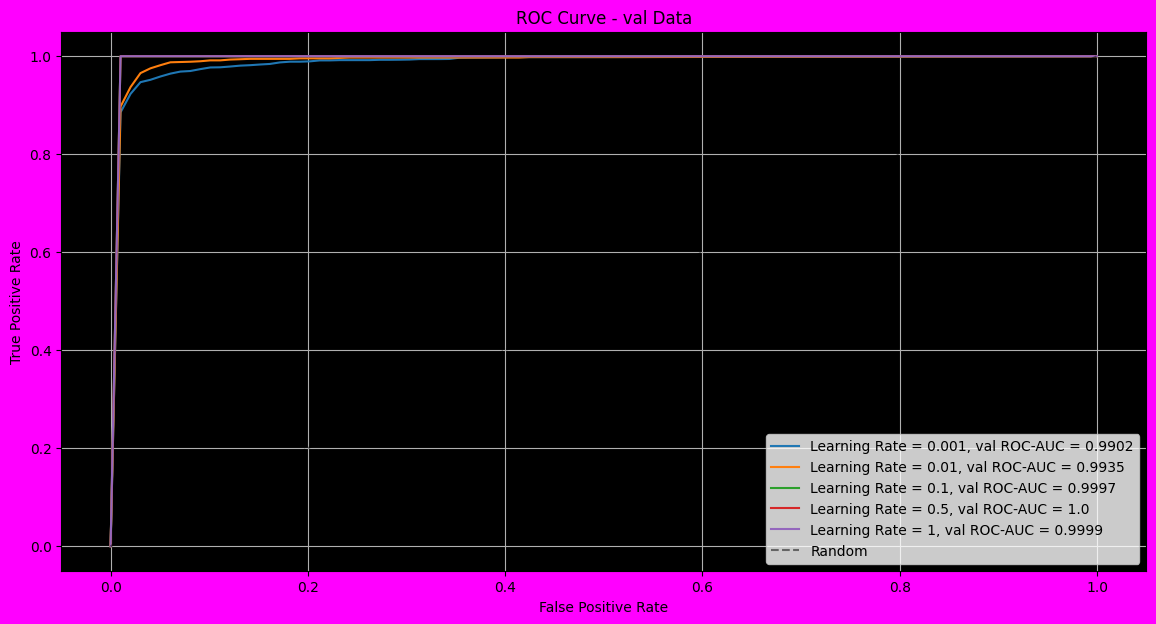

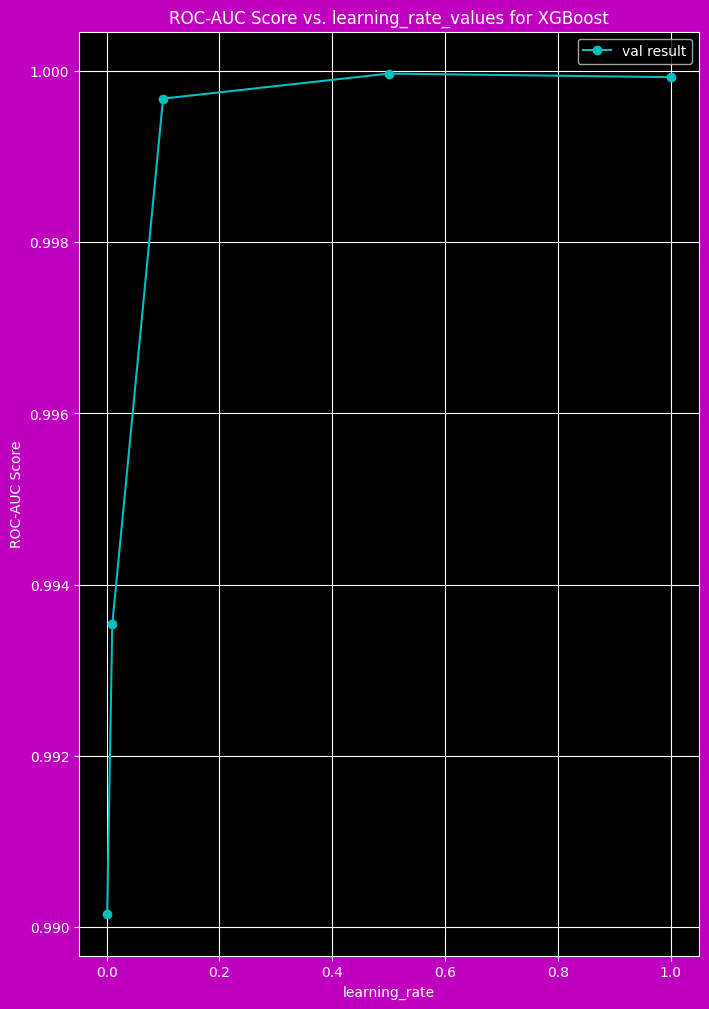





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.990158932579436, 0.993538123035628, 0.999675686110257, 0.9999680103944829, 0.999926335177018]


Best Learning Rate : 0.5


Best Mean ROC-AUC score for val data: 0.9999680103944829


Mean precision val score for best Learning Rate: 0.9986633799082295


Mean recall val score for best Learning Rate: 1.0


Mean f1 val score for best Learning Rate: 0.9993310616173033






In [123]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Defining values of C

learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of learning_rate_values

print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [124]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.5, 0.6, 0.7],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Defining the XGBoost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(xgb_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 20.99 seconds


Best ROC AUC score:  0.9999898567265427


Best hyperparameters:  {'learning_rate': 0.7, 'max_depth': 5, 'subsample': 0.9}




In [125]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.5} 0.999966058328044
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.7} 0.9999489567316348
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.9} 0.9999734182723207
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.5} 0.9999671884717718
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.7} 0.999972288128593
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.9} 0.9999782377282176
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.5} 0.9999690471379026
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.7} 0.9999777427065847
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.9} 0.9999864102551745
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.5} 0.9999747632367569
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.7} 0.9999656567067192
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.9} 0.9999688042971014
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.5} 0.99997231614

##**Observations**

**A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data**

*  **Logistic Regression**
*  **KNeighbors Classifier**
*  **SVM**
*  **Decision Tree Classifier**
*  **Random Forest Classifier**
*  **XGB Classifier**

**Proceed with the model which shows the best result**

*  **Appling the best hyperparameter on the model**
*  **Predicting on the test dataset**

In [126]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
221018 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630 -1.358708   
7034   -1.870060  1.144615  1.520463 -0.324813  0.103339  0.571188 -0.018978   
6440   -2.104792 -1.700357  2.444681 -0.500963  1.904566 -1.103889 -0.243060   
3188   -0.864949 -0.769920  0.829225 -1.735165 -1.175958  0.253455  1.315697   
15868  -5.008899 -3.567746  1.021427  3.768790  5.280372 -3.174799 -2.478539   

              V8        V9       V10       V11       V12       V13       V14  \
221018  0.672409 -3.188001 -4.937427  3.723933 -4.603176  1.019180 -6.619090   
7034    0.441588  1.976561 -0.220849  1.521003 -0.953793  2.317437  0.679833   
6440   -0.970038  2.204698  0.491798  2.244565 -2.172107  1.931106  0.385315   
3188    0.118620  0.981120 -1.738615  0.971364  0.680659 -1.350503  0.269613   
15868  -0.348031 -0.648985  1.898582 -0.190211 -0.073993  0.070418  0.318212   

             V15       V16       V17       V18       V19       V20       V21  \
221018 -0.590224 -4.472548 -7.165044 -1.581128  1.930380  0.264699  0.861308   
7034   -2.741946 -0.426633  0.618127 -0.272849 -0.366897  0.032567 -0.270466   
6440   -0.315036  0.786114 -0.873448  0.791680 -0.432742 -0.568108 -0.275233   
3188   -0.277642 -1.189251  0.397299  0.093907  1.143614  0.553799  0.293608   
15868   1.352926 -0.234920  0.113104 -0.974804  0.322585 -2.432219 -0.640997   

            V22       V23       V24       V25       V26       V27       V28  \
221018 1.249301  1.850627 -0.117471  1.219815  0.000251  1.036011  0.004367   
7034   0.162836 -0.005604 -0.285377  0.152556  0.334377  0.017770 -0.011909   
6440   0.626030 -0.795250  0.112904 -0.711995  0.742631 -0.760977 -0.529885   
3188   0.542974  0.589833  0.033605 -0.222383 -0.049898  0.057414  0.159841   
15868  0.091000 -1.968210  0.353708 -0.223773  0.241232  0.453529  0.553549   

          Amount  
221018  5.610998  
7034   -0.294150  
6440    0.978963  
3188    5.694778  
15868  -0.153903

In [127]:
y_test_saved.head()

221018   1.000000
7034     0.000000
6440     0.000000
3188     0.000000
15868    0.000000
Name: Class, dtype: float64

In [128]:
scaler = RobustScaler()

# Transforming the test data

X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [129]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
221018 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630 -1.358708   
7034   -1.870060  1.144615  1.520463 -0.324813  0.103339  0.571188 -0.018978   
6440   -2.104792 -1.700357  2.444681 -0.500963  1.904566 -1.103889 -0.243060   
3188   -0.864949 -0.769920  0.829225 -1.735165 -1.175958  0.253455  1.315697   
15868  -5.008899 -3.567746  1.021427  3.768790  5.280372 -3.174799 -2.478539   

              V8        V9       V10       V11       V12       V13       V14  \
221018  0.672409 -3.188001 -4.937427  3.723933 -4.603176  1.019180 -6.619090   
7034    0.441588  1.976561 -0.220849  1.521003 -0.953793  2.317437  0.679833   
6440   -0.970038  2.204698  0.491798  2.244565 -2.172107  1.931106  0.385315   
3188    0.118620  0.981120 -1.738615  0.971364  0.680659 -1.350503  0.269613   
15868  -0.348031 -0.648985  1.898582 -0.190211 -0.073993  0.070418  0.318212   

             V15       V16       V17       V18       V19       V20       V21  \
221018 -0.590224 -4.472548 -7.165044 -1.581128  1.930380  0.264699  0.861308   
7034   -2.741946 -0.426633  0.618127 -0.272849 -0.366897  0.032567 -0.270466   
6440   -0.315036  0.786114 -0.873448  0.791680 -0.432742 -0.568108 -0.275233   
3188   -0.277642 -1.189251  0.397299  0.093907  1.143614  0.553799  0.293608   
15868   1.352926 -0.234920  0.113104 -0.974804  0.322585 -2.432219 -0.640997   

            V22       V23       V24       V25       V26       V27       V28  \
221018 1.249301  1.850627 -0.117471  1.219815  0.000251  1.036011  0.004367   
7034   0.162836 -0.005604 -0.285377  0.152556  0.334377  0.017770 -0.011909   
6440   0.626030 -0.795250  0.112904 -0.711995  0.742631 -0.760977 -0.529885   
3188   0.542974  0.589833  0.033605 -0.222383 -0.049898  0.057414  0.159841   
15868  0.091000 -1.968210  0.353708 -0.223773  0.241232  0.453529  0.553549   

          Amount  
221018  5.610998  
7034   -0.294150  
6440    0.978963  
3188    5.694778  
15868  -0.153903

In [130]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_test_saved_ros, y_test_saved_ros = ros.fit_resample(X_test_saved,y_test_saved)

**The below code appears to be initializing and training several classification models with best hyperparameters and
then evaluating their performance using ROC-AUC score.**

In [131]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_ros)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])

print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_ros)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")


print("============================================================================================================")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_ros)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])

print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_ros)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_ros)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_ros)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)

# printing the results

print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")



LogisticRegression ROC-AUC Score on Test Set = 0.9635494790406606
LogisticRegression F1-Score on Test Set = 0.899919935948759


LogisticRegression Precision on Test Set = 0.9606837606837607


LogisticRegression Recall on Test Set = 0.8463855421686747


Time taken: 0.50 seconds


KNeighbors Classifier ROC-AUC Score on Test Set = 0.921145425073789
KNeighbors Classifier F1-Score on Test Set = 0.9022721051190803


KNeighbors Classifier Precision on Test Set = 0.9921733895243829


KNeighbors Classifier Recall on Test Set = 0.8273092369477911


Time taken: 1.84 seconds


Decision Tree Classifier ROC-AUC Score on Test Set = 0.9071349403638651
Decision Tree Classifier F1-Score on Test Set = 0.8813741277509394


Decision Tree Classifier Precision on Test Set = 0.9469434832756632


Decision Tree Classifier Recall on Test Set = 0.8242971887550201


Time taken: 0.41 seconds




In [132]:
import time
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')

start_time = time.time()
try:
    clf.fit(X_ros_train_pt, y_ros_train_pt)
except TimeoutError:
    print("============================================================================================================")

    print(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)
end_time = time.time()

elapsed_time = end_time - start_time
if elapsed_time > 50000:
    raise TimeoutError(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)

y_pred_proba = clf.predict_proba(X_test_saved)
y_pred = clf.predict(X_test_saved)
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved, y_pred=y_pred)
print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("F1 Score on Test Set =", f1)
print("Precision on Test Set =", preci_sion)
print("Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

SVM Classifier ROC-AUC Score on Test Set = 0.9372438734529956
F1 Score on Test Set = 0.30136986301369867
Precision on Test Set = 0.18106995884773663
Recall on Test Set = 0.8979591836734694
Time taken: 245.63 seconds


In [133]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_ros)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])

print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_ros)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)

# printing the results

print("Random Forest Classifier F1-Score on Test Set =", f1)
print("\n")
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")
print("\n")

Random Forest Classifier ROC-AUC Score on Test Set = 0.9364725468137611
Random Forest Classifier F1-Score on Test Set = 0.887163848073191


Random Forest Classifier Precision on Test Set = 0.9907120743034056


Random Forest Classifier Recall on Test Set = 0.8032128514056225


Time taken: 57.52 seconds






**B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set**

1. **Logistic Regression {'C': 4, 'penalty': 'l2'} :-**

    * **LogisticRegression ROC-AUC Score on Test Set = 0.9714047244524862 [LogisticRegression ROC-AUC Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.9752271441778737]**
    
    * **LogisticRegression F1-Score on Test Set = 0.932017141909525 [LogisticRegression F1-Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.5977011494252873]**
    
    * **LogisticRegression Precision on Test Set = 0.925193643972344 [LogisticRegression Precision on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.4785276073619632]**

    * **LogisticRegression Recall on Test Set = 0.9389420371412492 [LogisticRegression Recall on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.7959183673469388]**


---


2. **KNeighbors Classifier {'n_neighbors': 9} :-**

    * **KNeighbors Classifier ROC-AUC Score on Test Set = 0.9398546705943079 [KNeighbors Classifier ROC-AUC Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9385655570613163]**

    * **KNeighbors Classifier F1-Score on Test Set = 0.9241250283468138 [KNeighbors Classifier F1-Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.824858757062147]**

    * **KNeighbors Classifier Precision on Test Set = 0.9986317595164189 [KNeighbors Classifier Precision on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9240506329113924]**

    * **KNeighbors Classifier Recall on Test Set = 0.8599641249296567 [KNeighbors Classifier Recall on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.7448979591836735]**


---


3. **SVM.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} :-**

    * ** **


---


4. **Decision Tree Classifier {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} :-**

  * **Decision Tree Classifier ROC-AUC Score on Test Set = 0.9356105342166989 [Decision Tree Classifier ROC-AUC Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.9314465304973987]**

  * **Decision Tree Classifier F1-Score on Test Set = 0.9189785371841284 [Decision Tree Classifier F1-Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8200000000000001]**

  * **Decision Tree Classifier Precision on Test Set = 0.929737415186365 [Decision Tree Classifier Precision on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.803921568627451]**

  * **Decision Tree Classifier Recall on Test Set = 0.9084658131682611 [Decision Tree Classifier Recall on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8367346938775511]**


---


5. **Random Forest Classifier {'min_samples_split': 5, 'n_estimators': 500} :-**

  * **Random Forest Classifier ROC-AUC Score on Test Set = 0.9634288542372493 [Random Forest Classifier ROC-AUC Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.9623530686894904]**

  * **Random Forest Classifier F1-Score on Test Set = 0.8258706467661691 [Random Forest Classifier F1-Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8282828282828283]**

  * **Random Forest Classifier Precision on Test Set = 0.8058252427184466 [Random Forest Classifier Precision on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.82]**

  * **Random Forest Classifier Recall on Test Set = 0.8469387755102041 [Random Forest Classifier Recall on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8367346938775511]**


---


6. **XGB Classifier {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} :-**

  * **XGBOOST Classifier ROC-AUC Score on Test Set = 0.977483446853241 [XGBOOST Classifier ROC-AUC Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9713649035866456]**

  * **XGBOOST Classifier F1-Score on Test Set = 0.9368538930690137 [XGBOOST Classifier F1-Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7962085308056872]**

  * **XGBOOST Classifier Precision on Test Set = 0.9888057514603317 [XGBOOST Classifier Precision on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7433628318584071]**

  * **XGBOOST Classifier Recall on Test Set = 0.8900886325267304 [XGBOOST Classifier Recall on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.8571428571428571 ]**

##**Observations**

**1. Based on ROC-AUC Scores-**

* **KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.**

* **LogisticRegression score decreased. But, the best model is XGBClassifier**

**2. Based on F1 Scores-**

* **LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.**

* **RandomForestClassifier score decreased. But, the best model is XGBClassifier**

#**Table Of Scores**

<table>
<tr>
<th>Model</th><th>Parameters</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Logistic Regression</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>KNeighborsClassifier</th><th>{'n_neighbors': 9}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SVM</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Decision Tree</th><th>{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Random Forest</th><th>{'min_samples_split': 5, 'n_estimators': 500}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>XGBoost</th><th>{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

**Printing the important features of the best model to understand the dataset**

* **This will not give much explanation on the already transformed dataset**

* **But it will help us in understanding if the dataset is not PCA transformed**

Top var = 14
2nd Top var = 3
3rd Top var = 10


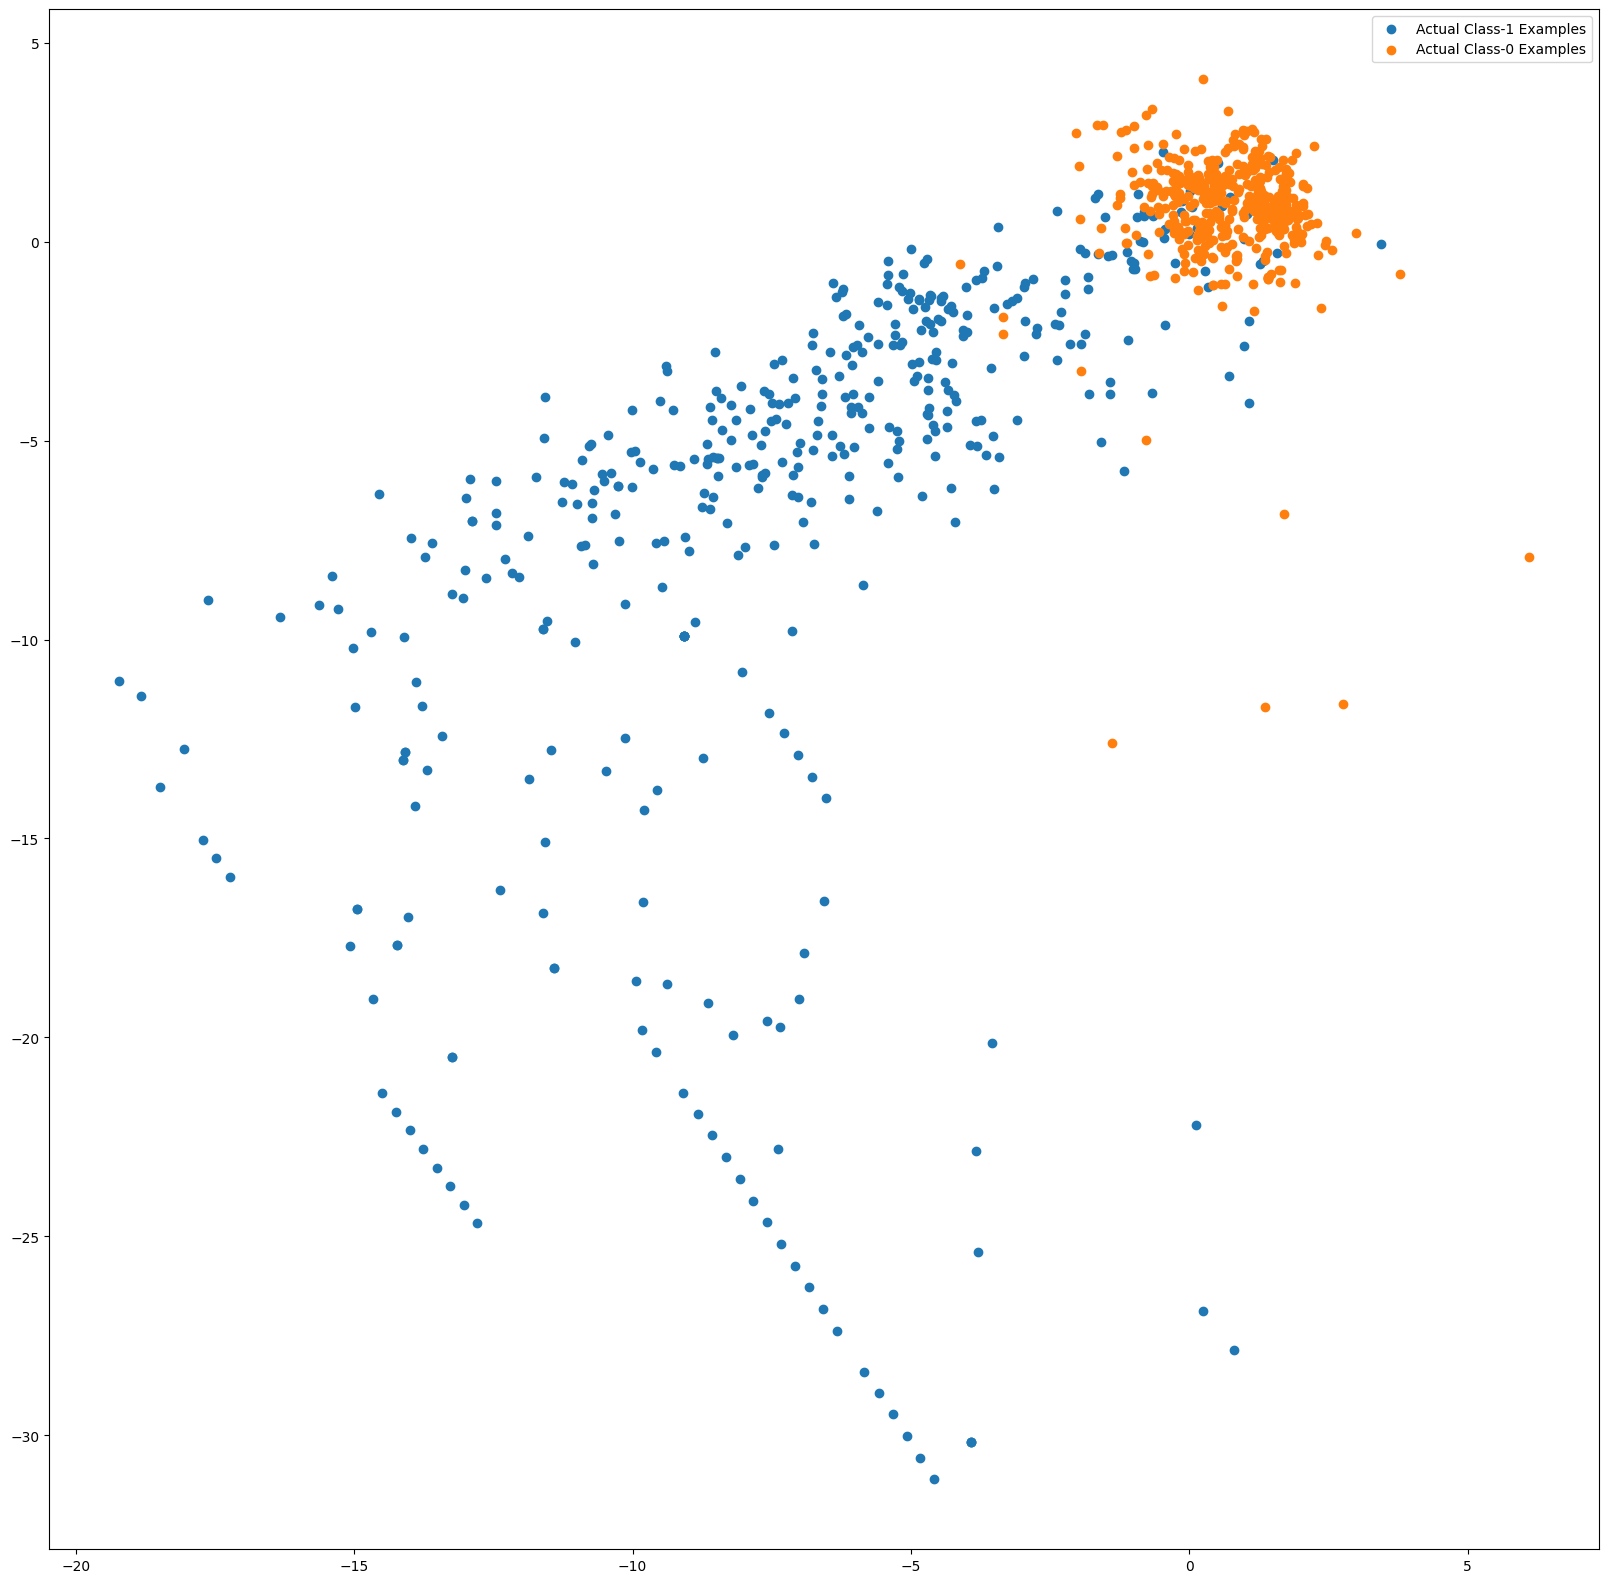

In [134]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#**II. SMOTE(Synthetic Minority Over-sampling Technique)**

**Building different models on the balanced dataset and see the result**

In [135]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

**By setting a fixed random_state value, the SMOTE algorithm will use the same randomly generated numbers each time the code is run, which will produce the same synthetic samples for each minority class observation. This ensures that the training and validation process is consistent and can be repeated, which is important when developing and testing machine learning models.**

**Therefore, using random_state=0 in the SMOTE constructor helps ensure that the model performance will be consistent and reproducible when the code is re-run. However, it is important to note that changing the random seed will produce a different set of synthetic samples and may result in different performance metrics.**

In [136]:
from imblearn.over_sampling import SMOTE

# Defining the SMOTE

smote = over_sampling.SMOTE(random_state=0)

# Resampling the training data using SMOTE

X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

##**Printing the class distribution after applying SMOTE**

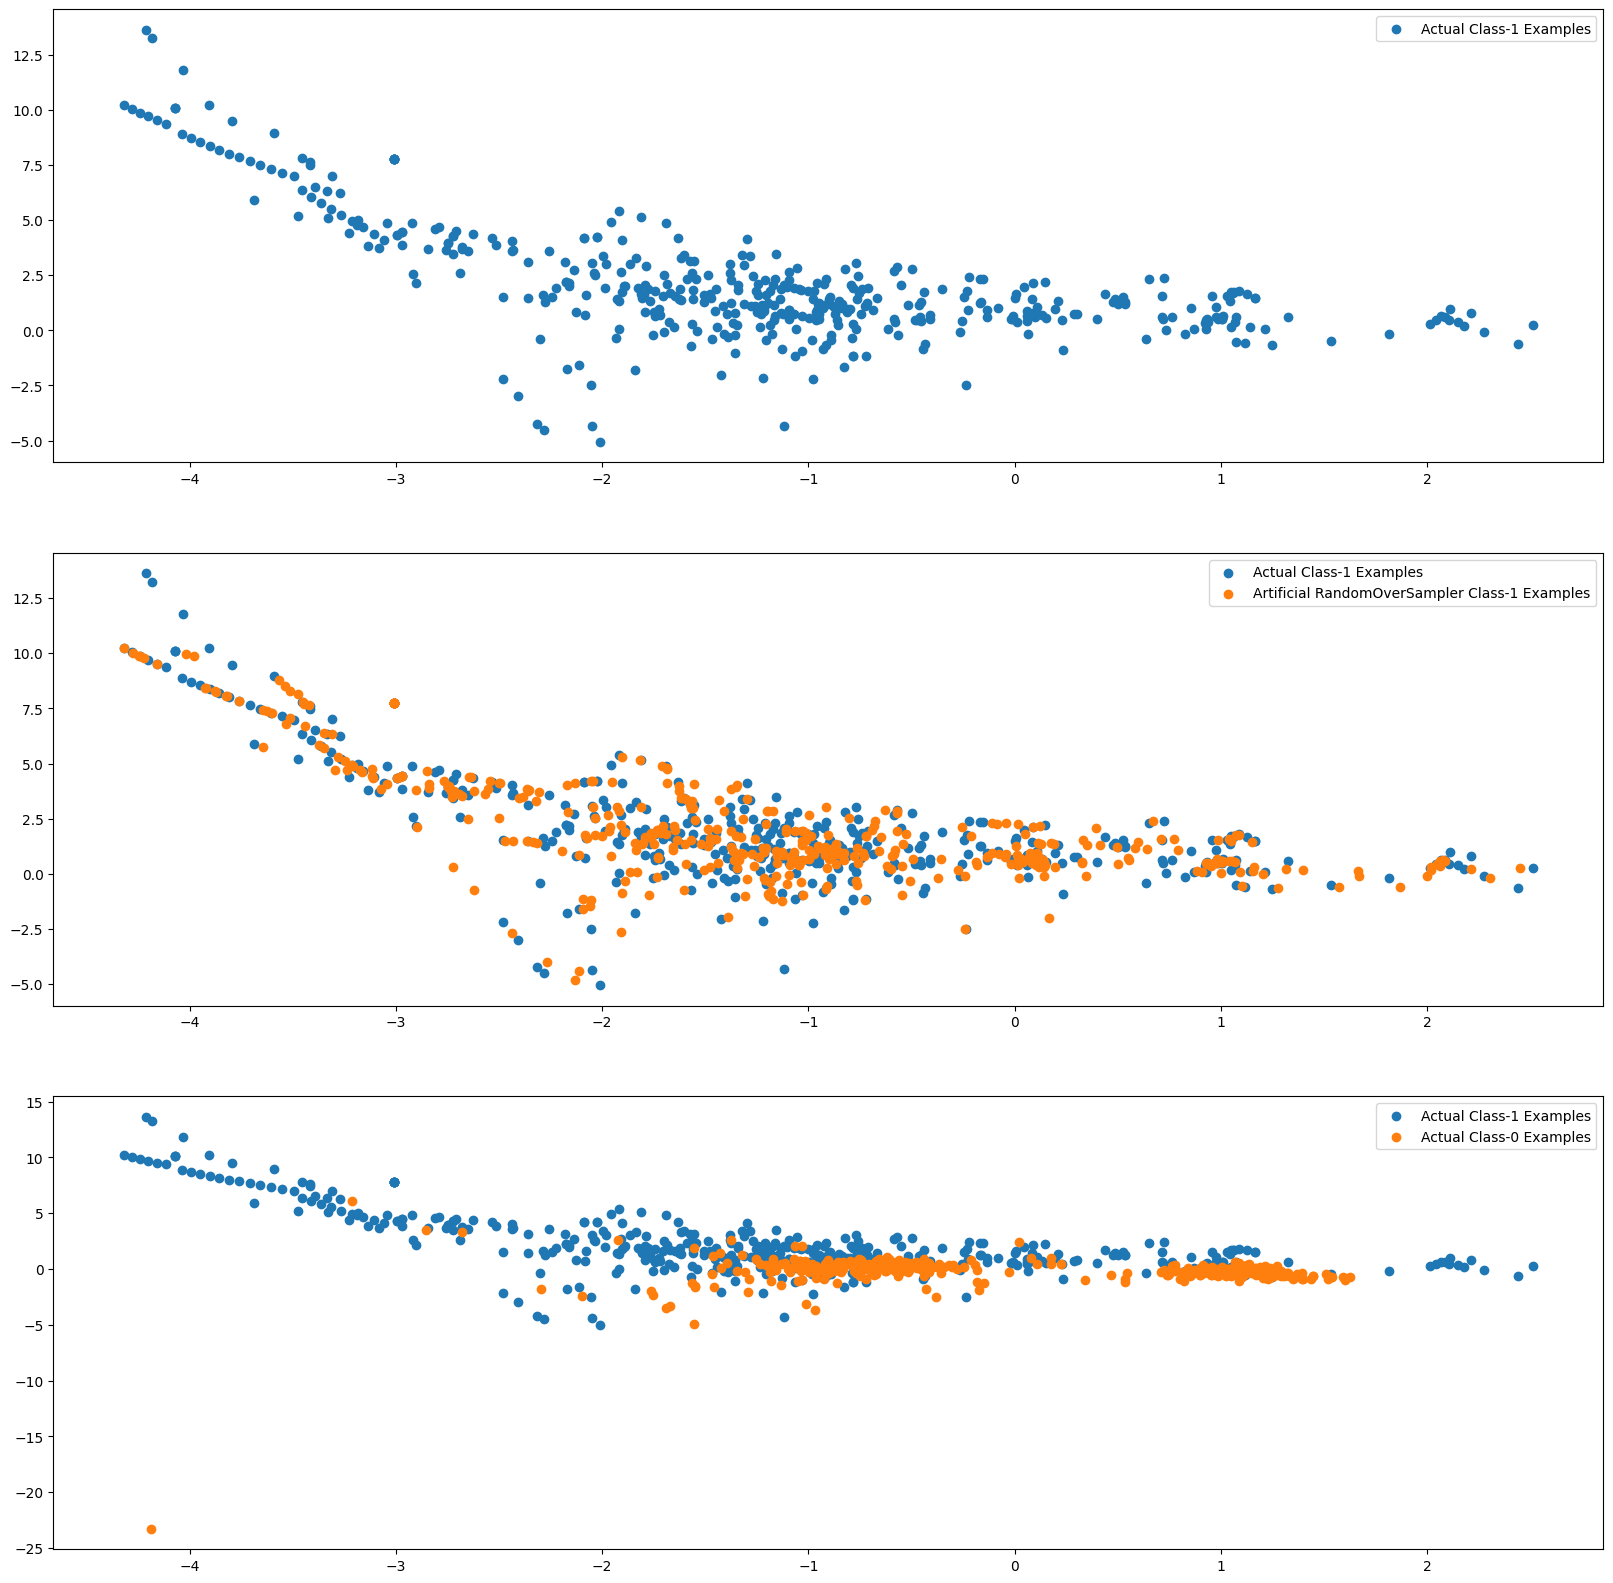

In [137]:
import warnings
warnings.filterwarnings("ignore")

X_smote_train_pt_1 = X_smote_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##**SOME MORE VISUALIZATION**

* **Checking the distribution of your target variable: We use value_counts() method to check the distribution of your target variable.**

* **y_ros_train_pt is target variable, we can use the following code to check the distribution of its values:**

In [138]:
print(y_smote_train_pt.value_counts())

0.000000    17922
1.000000    17922
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

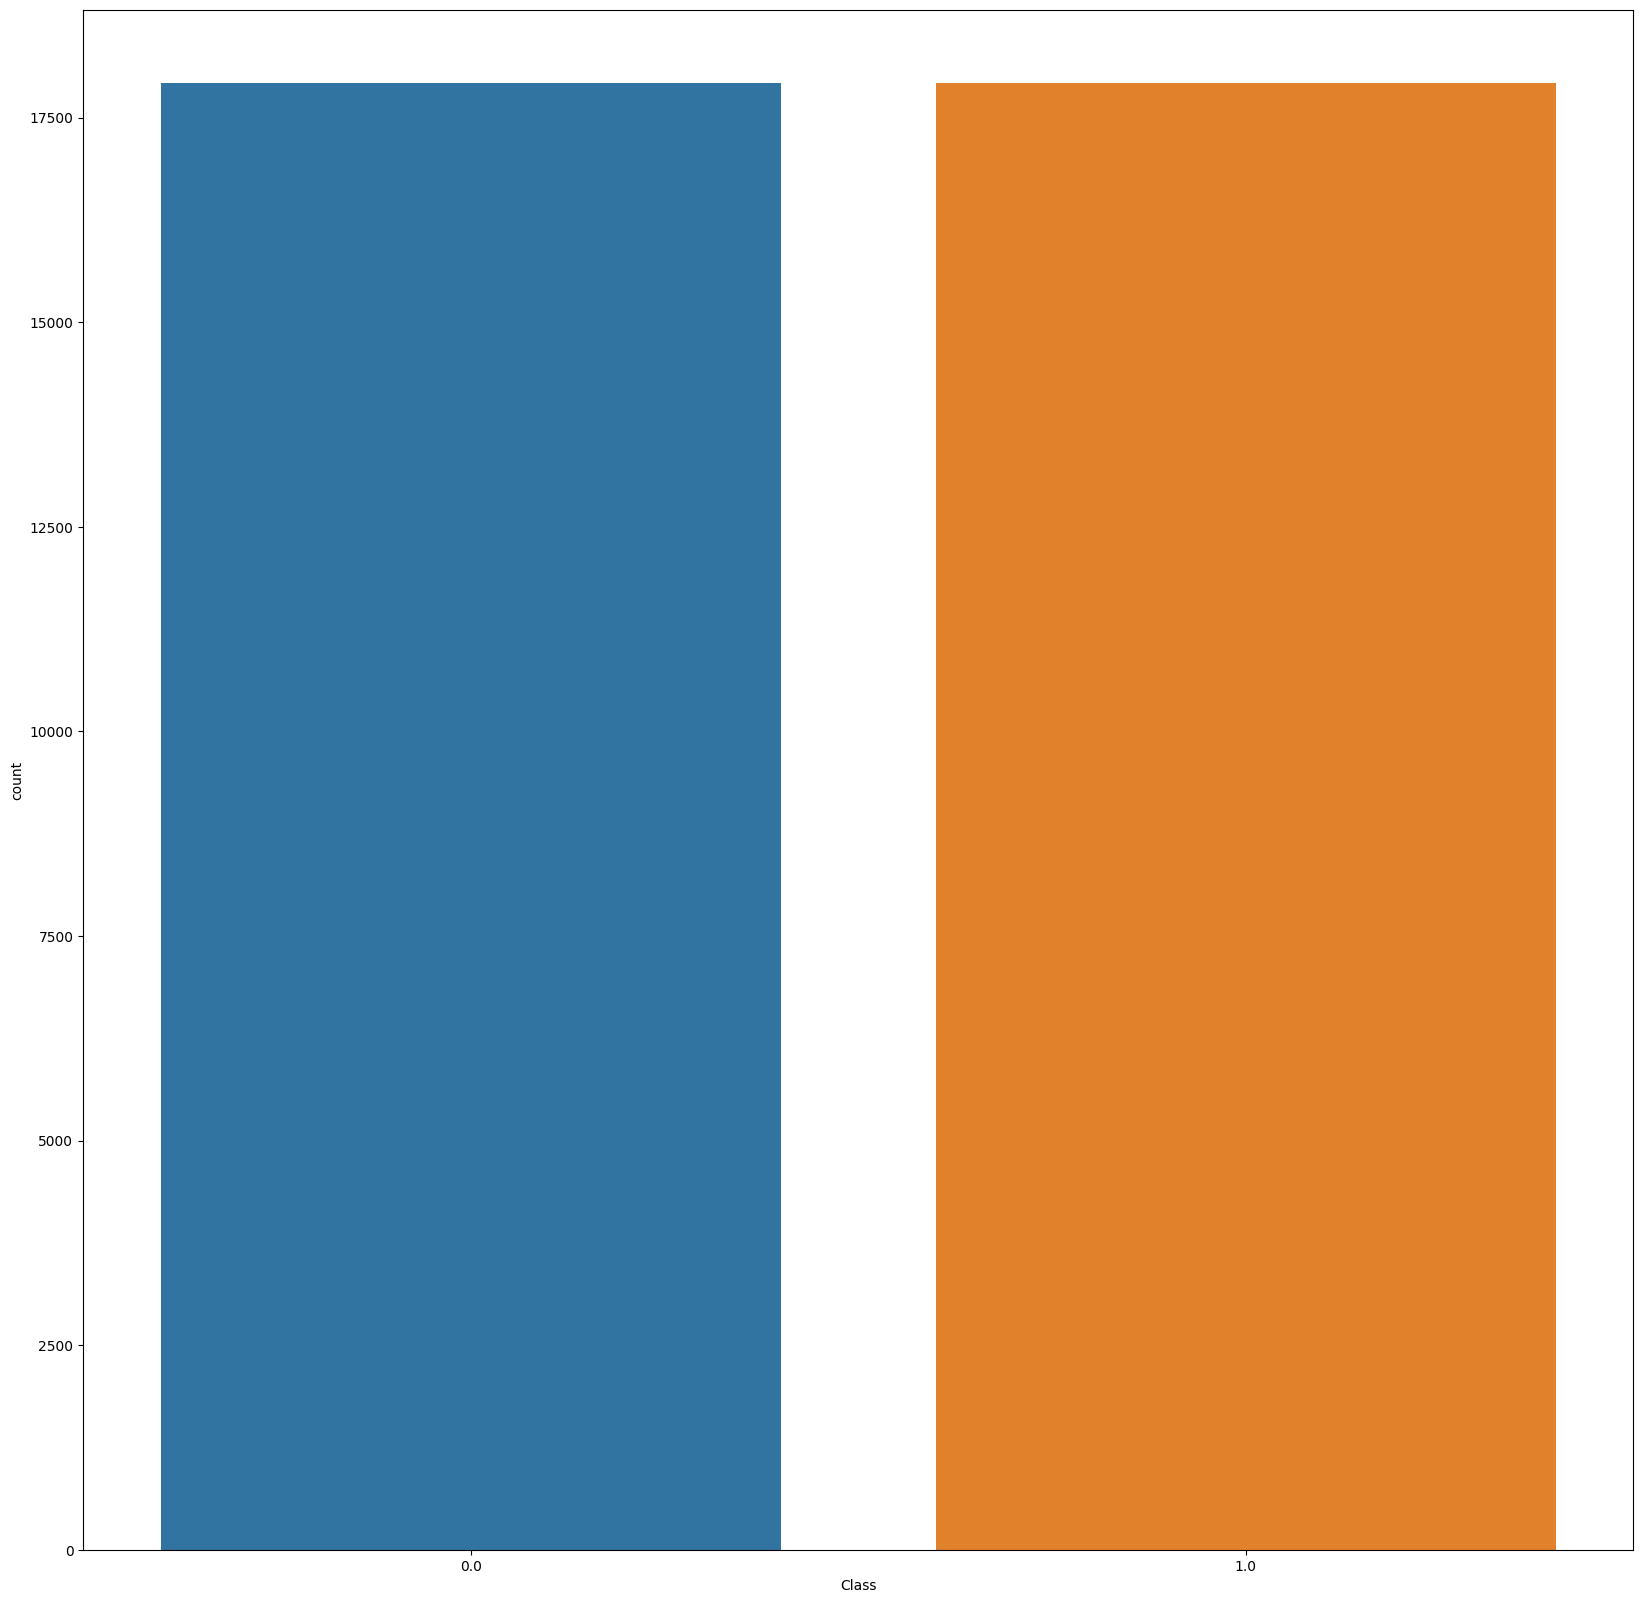

In [139]:
import seaborn as sns

sns.countplot(x=y_smote_train_pt)

(array([ 946., 1611., 1314., 3113., 6555., 9416., 2551., 7268., 2679.,
         391.]),
 array([-4.31971532, -3.63660364, -2.95349196, -2.27038028, -1.58726861,
        -0.90415693, -0.22104525,  0.46206643,  1.1451781 ,  1.82828978,
         2.51140146]),
 <BarContainer object of 10 artists>)

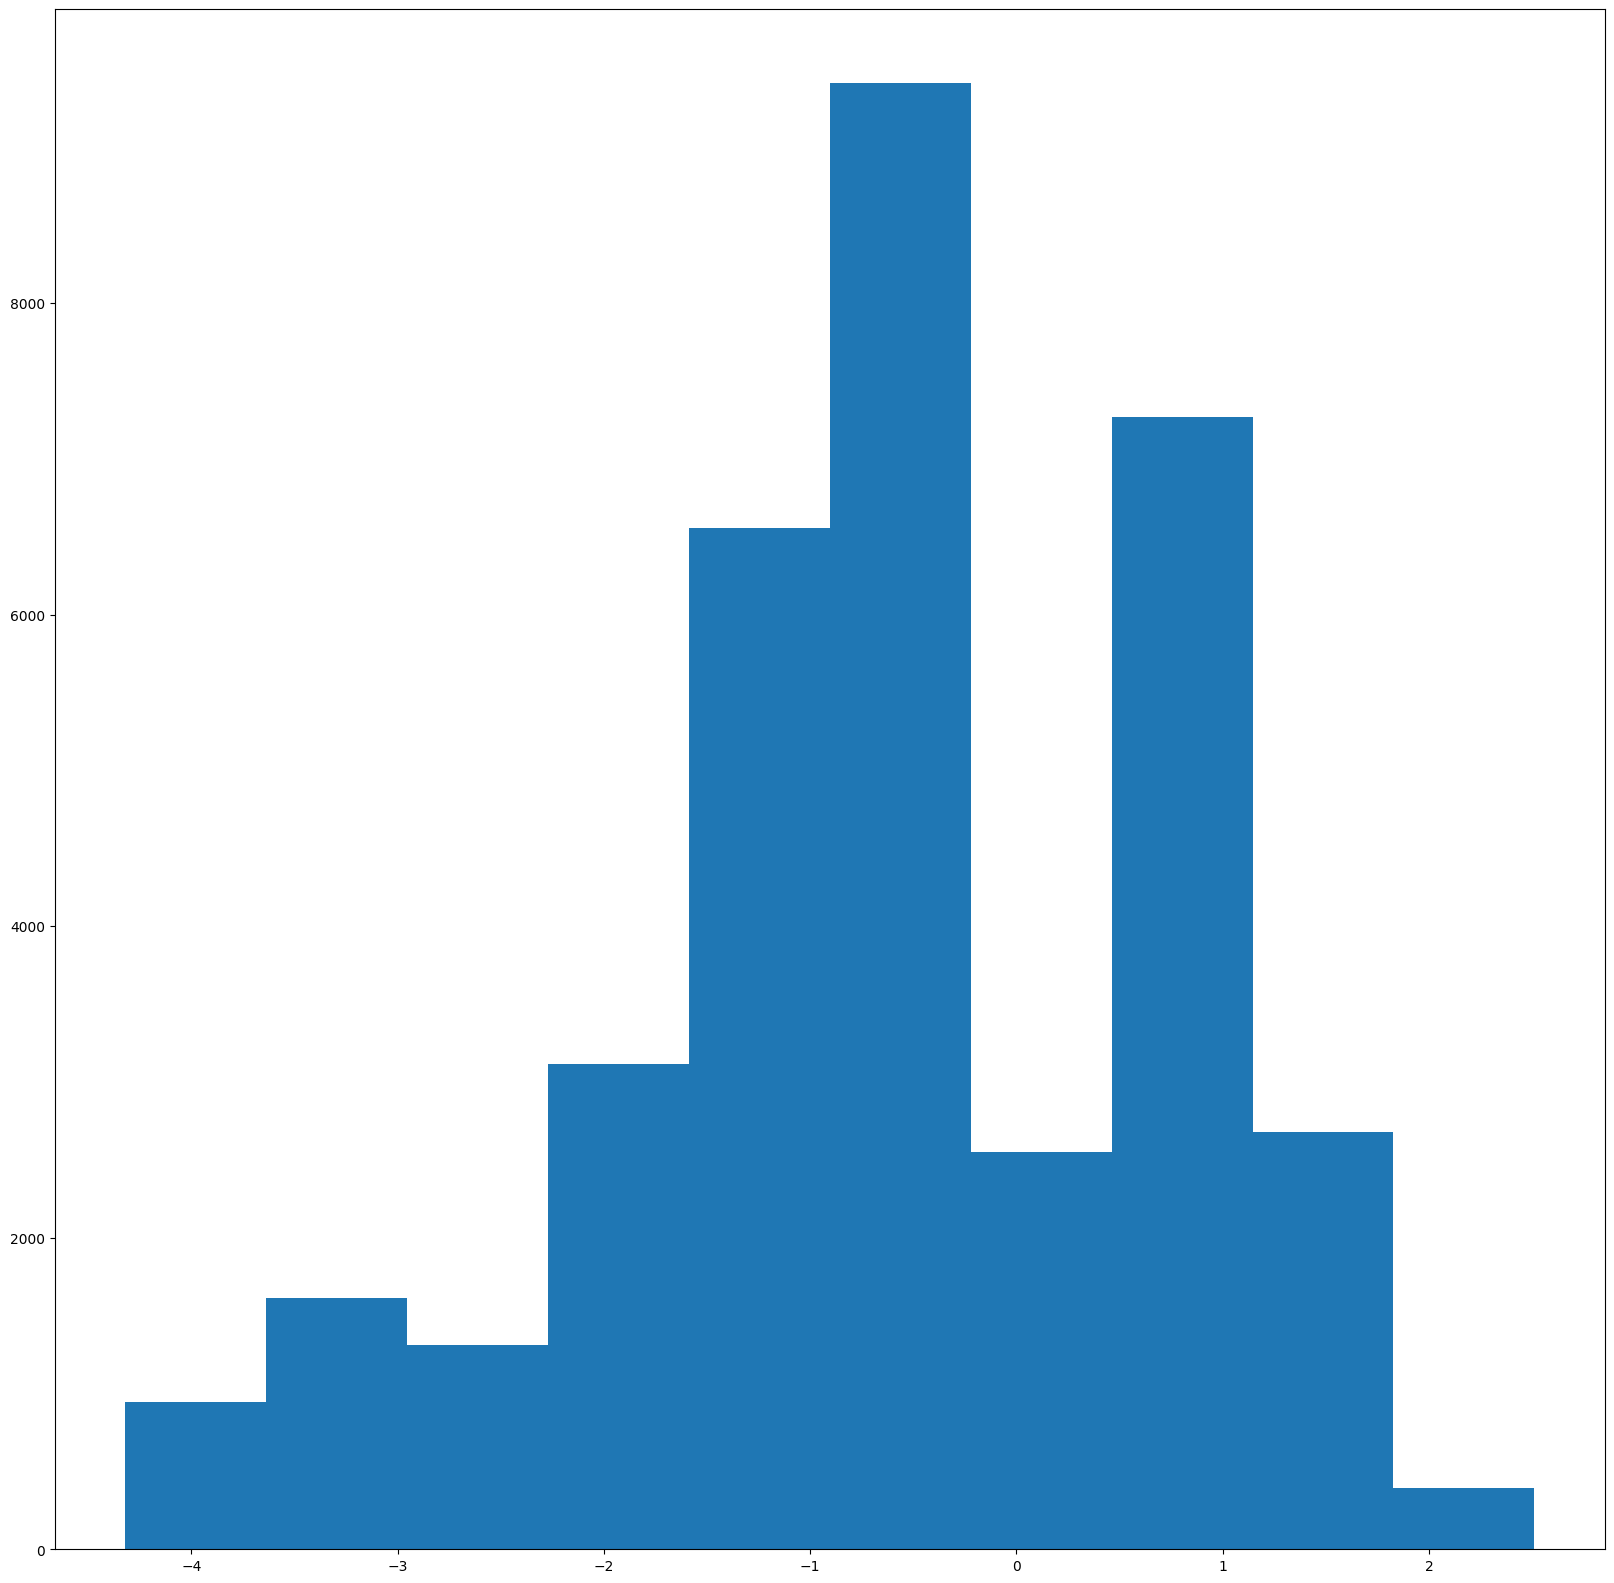

In [140]:
import matplotlib.pyplot as plt

plt.hist(X_smote_train_pt[:,0])

#**Building models on other algorithms to see the better performing on SMOTE**

#**1. Logistic Regression**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.19225740432739258 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 0.25686216354370117 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 0.21917176246643066 seconds
ROC-AUC Score for val data = 0.9944786688079995
Mean precision val score: 0.9746510912629184
Mean recall val score: 0.9500055797344046
Mean f1 val score: 0.9621668122297325
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.22026681900024414 seconds
Train: [    0  

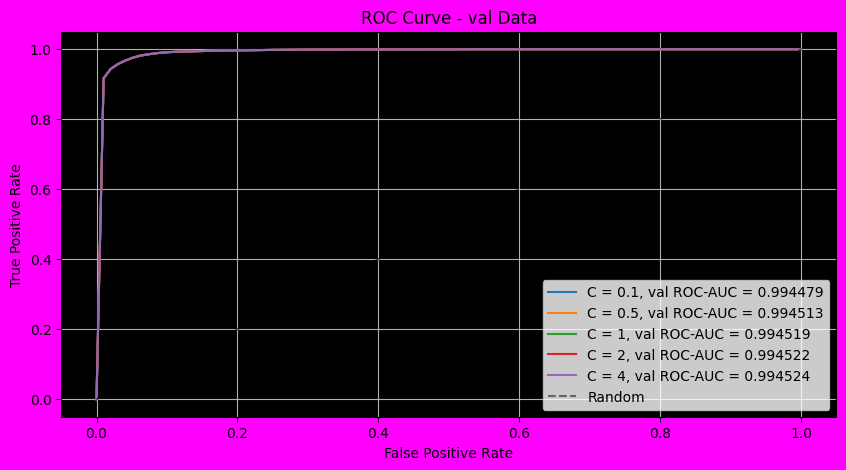

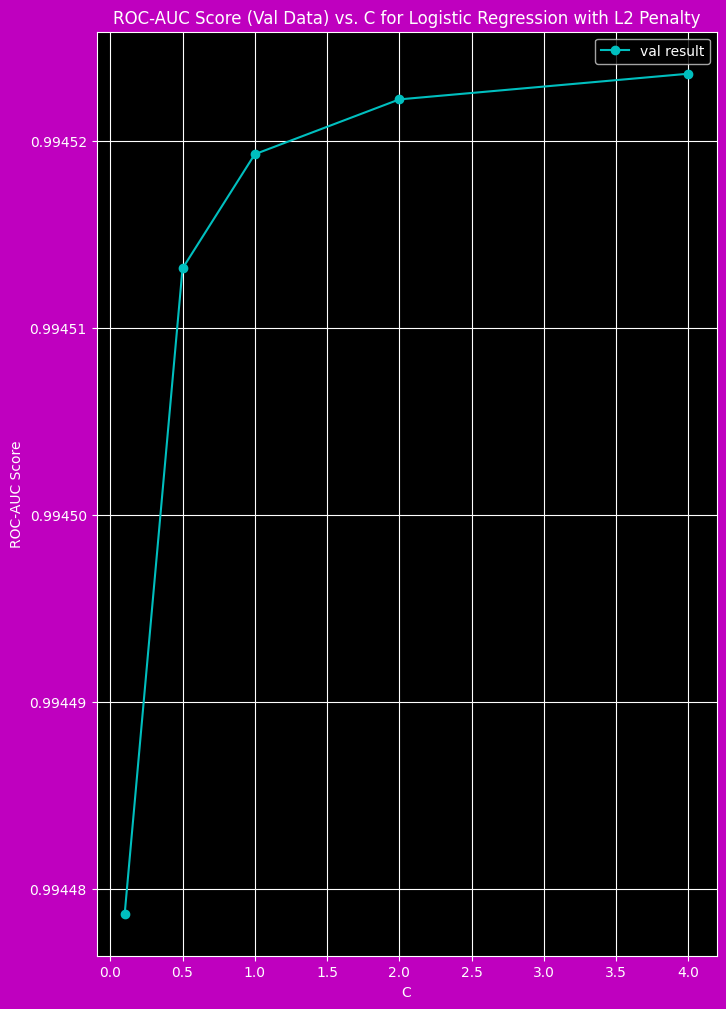





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9944786688079995, 0.9945131802218348, 0.9945192886019831, 0.9945222213716568, 0.9945235943561856]


Best C: 4


Best Mean ROC-AUC score for val data: 0.9945235943561856


Mean precision val score for best C 0.9737457532047804


Mean recall val score for best C 0.9515679053677045


Mean f1 val score for best C 0.9625253400381504


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [141]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Defining values of C

C_values = [0.1, 0.5, 1, 2, 4]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for Logistic Regression classifier for val data

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot


# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Ploting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for  and val data for all values of C

print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)
print("\n")
# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Defining  the logistic regression parameters for Stratified K-fold cross-validation

params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Defining the logistic regression classifier

logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 2.79 seconds


Best ROC AUC score:  0.9945235943561856


Best hyperparameters:  {'C': 4, 'penalty': 'l2'}




In [143]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9943420241572799
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9944786688079995
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9945131802218347
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9945192886019831
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9945222213716566
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9945235943561856

Rank of each hyperparameter combination:


1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 6.28489958230819e-0

#**2. Performing KNN Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

============================================KNN Classifier:===============================================
K = 3
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 1.383178949356079 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 1.2528202533721924 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 0.1298367977142334 seconds
Mean ROC-AUC for val data: 0.9981289396483449
------------------------------------------------------------------------------------------------------------
K = 5
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.18775296211242676 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 0.13514328002929688 seconds
Train: [    0     1     2 ... 29867 2986

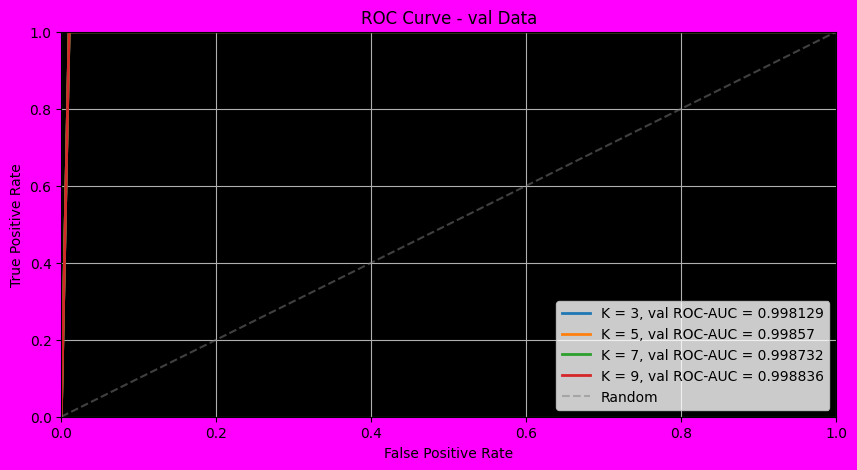

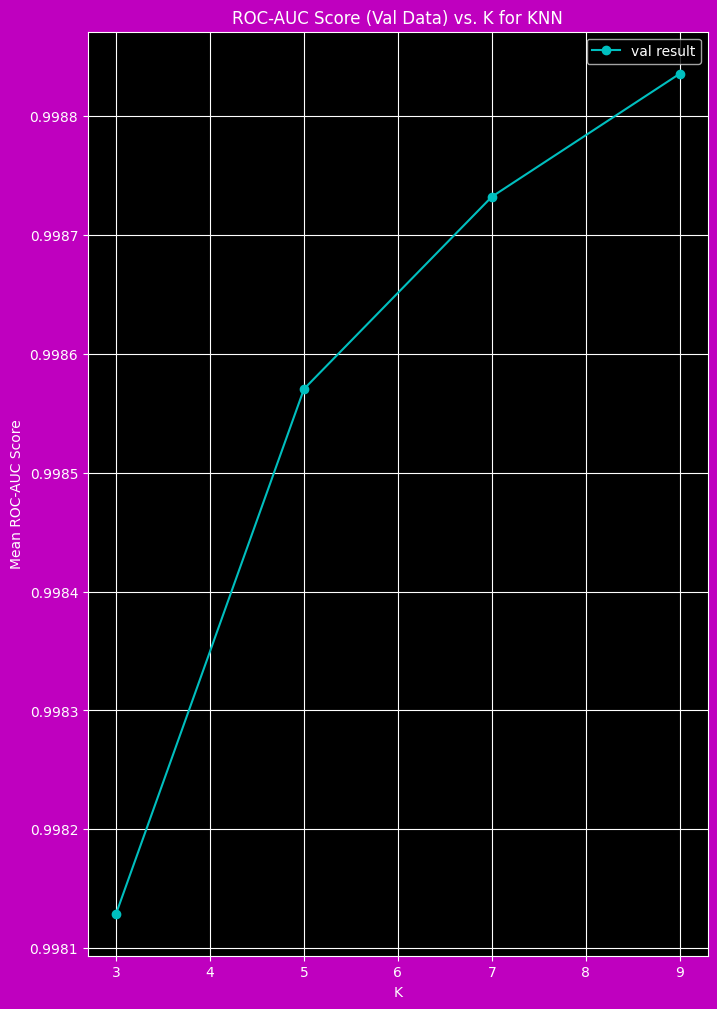





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of K: 
 [0.9981289396483449, 0.9985704055445114, 0.9987321795481195, 0.9988356717594865]


Best K: 9


Best Mean ROC-AUC score for val data: 0.9945235943561856


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [144]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Defining your values of K (number of neighbors)

K_values = [3, 5, 7, 9]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of K

for k in K_values:
    print("K =", k)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cro ss-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt[train_index], y_smote_train_pt[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores and mean false positive rates for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr

    print("Mean ROC-AUC for val data:", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of k

    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)).format(k))


print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plotting ROC curves of KNN Classifier for val data

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. K for KNN')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for train and val data for all values of K

print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_k = K_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**Manhattan distance, also known as L1 distance, computes the distance between two points by summing the absolute differences of their coordinates. It's suitable for high-dimensional data where the features are of varying importance and the data is sparse. In other words, it's useful when the data has a lot of zeros or null values.**

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Defining the KNN parameters for Stratified K-fold cross-validation

params = {'n_neighbors': [9]}

# Defining the KNN classifier

knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        #pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 5.78 seconds


Best ROC AUC score:  0.9988356717594865


Best hyperparameters:  {'n_neighbors': 9}




In [146]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")

for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'n_neighbors': 9} 0.9988356717594865

Rank of each hyperparameter combination:


1 {'n_neighbors': 9}

Standard deviation of test scores:


{'n_neighbors': 9} 0.00010353404328786272


#**3. Performing SVM Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

=============================================SVM Classifier:================================================
C = 0.1 Kernel = rbf
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 36.96023154258728 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 36.56923794746399 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 40.705055713653564 seconds
ROC-AUC Score for val data = 0.9959205640840622
------------------------------------------------------------------------------------------------------------
C = 1 Kernel = rbf
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 22.388870239257812 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 21.741156339645386 seconds
Train: [   

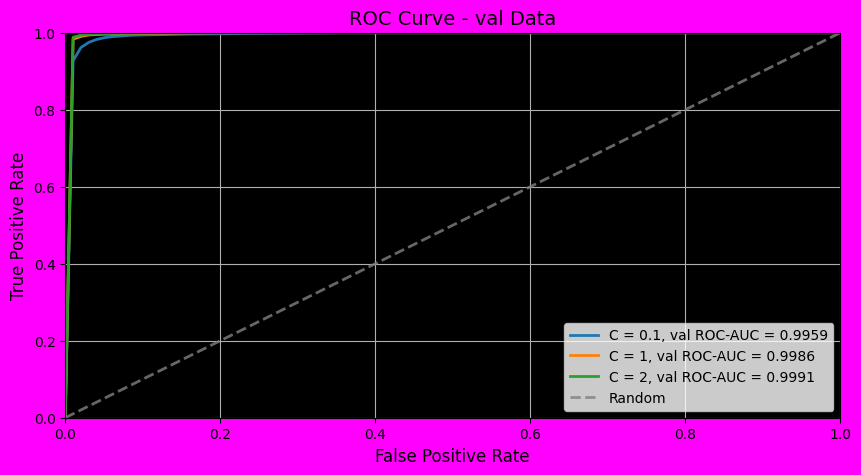

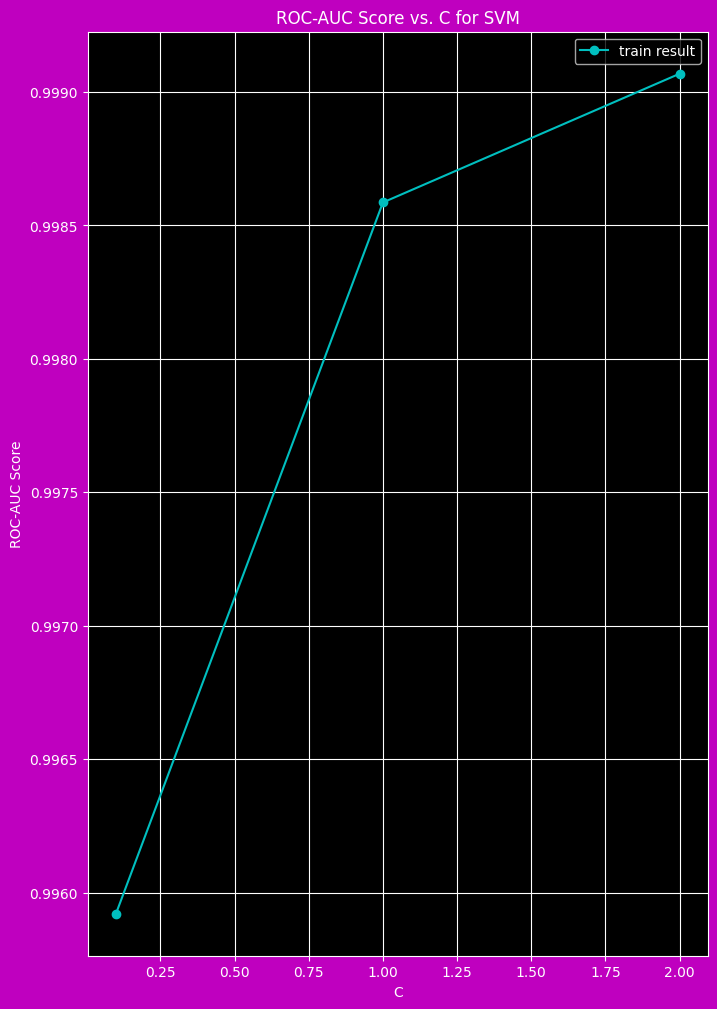





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9959205640840622, 0.998585952025791, 0.9990683506069731]
Best C: 2
Best Mean ROC-AUC score for val data: 0.9990683506069731
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [147]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("=============================================SVM Classifier:================================================")

# Define your values of C
C_values = [0.1, 1, 2]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        # y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt[train_index], y_smote_train_pt[val_index]

        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curves for the current value of C for val data
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))

print("=======================================SVM Has Run Successfully:============================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Set plot properties for val data
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)




print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [148]:
from sklearn.model_selection import GridSearchCV
import time
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Define the SVM classifier
svm_classifier = svm.SVC()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 41.46 seconds
Best ROC AUC score:  0.9982018946289855
Best hyperparameters:  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [149]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.9889979200498594
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.9982018946289855

Rank of each hyperparameter combination:
1 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
2 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

Standard deviation of test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.00029628237828364175
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 8.982864351129179e-05


#**4. Performing Decision Tree**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.13875675201416016 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 0.13817739486694336 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 0.13690924644470215 seconds
ROC-AUC Score for val data = 0.9320109362794331
Mean precision val score: 0.9645042595097776
Mean recall val score: 0.8971096975783953
Mean f1 val score: 0.9295453517046072
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.23725104331970215 seconds
Train: [    0     1     2 ...

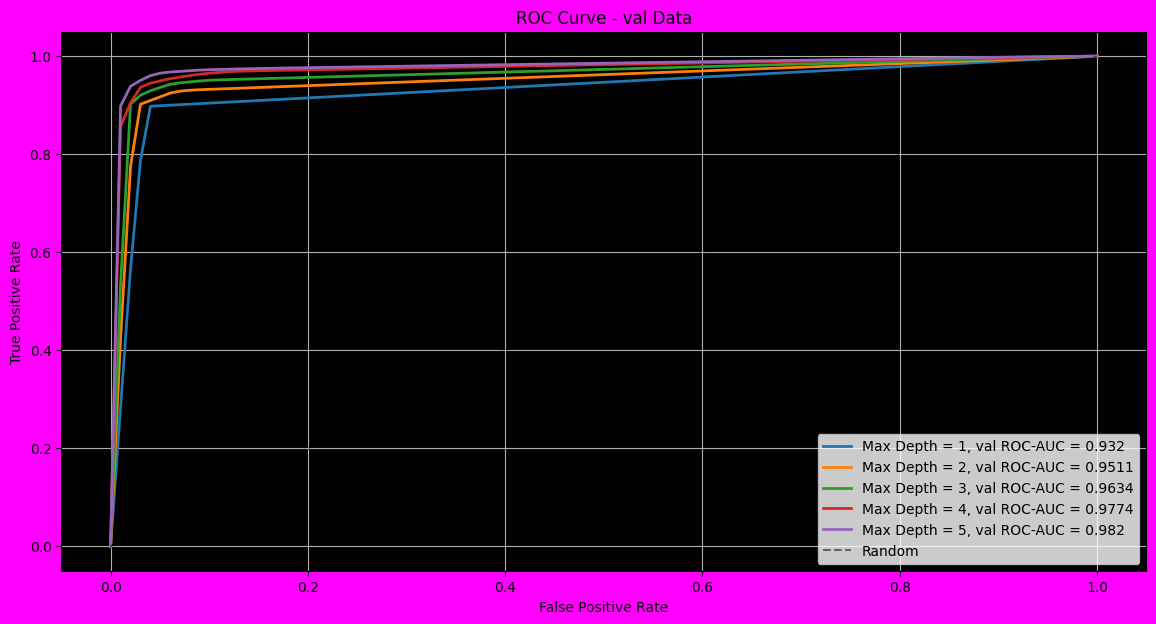

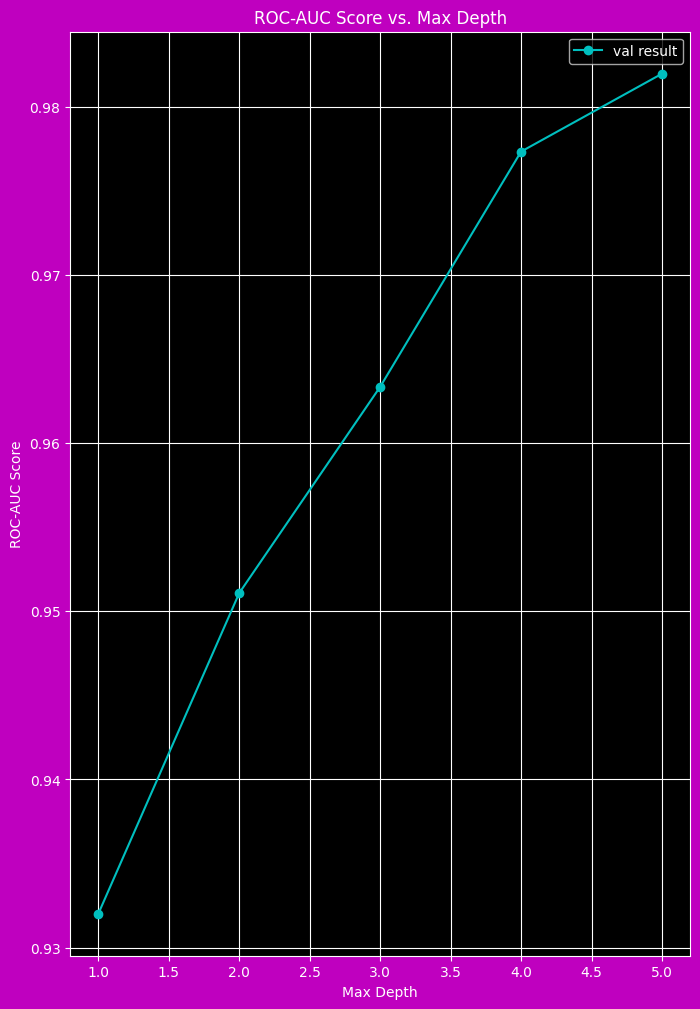





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.9320109362794331, 0.95108917741863, 0.9633574760053675, 0.97735267156824, 0.9819861487716719]


Best Max Depth: 5


Best Mean ROC-AUC score for val data: 0.9819861487716719


Mean precision val score for best Max Depth: 0.9707083780582478


Mean recall val score for best Max Depth: 0.9523490681843544


Mean f1 val score for best Max Depth: 0.9614030910668022








In [150]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Defining your values of max_depth

max_depth_values = [1, 2, 3, 4, 5]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of max_depth

for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        # Creating a decision tree classifier with the specified max_depth value

        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Ploting ROC-AUC scores vs C

    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of Max Depth

print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Defining the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 6.42 seconds


Best ROC AUC score:  0.9933375925741824


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}




In [152]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9775046151894231
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9775046151894231
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9775449874725903
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9775046151894231
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9775046151894231
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9775449874725903
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9775498256085489
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9775498256085489
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9775449594524979
{'criterion': 'gini', 'max_depth': 5, 'mi

#**5. Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

================================================Random Forest:==============================================
n_estimators = 100
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 11.420867681503296 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 11.281861066818237 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 11.309256076812744 seconds
ROC-AUC Score for val data = 0.9999257934552311
------------------------------------------------------------------------------------------------------------
n_estimators = 200
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 22.82805109024048 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 22.849478244781494 seconds
Train: [    

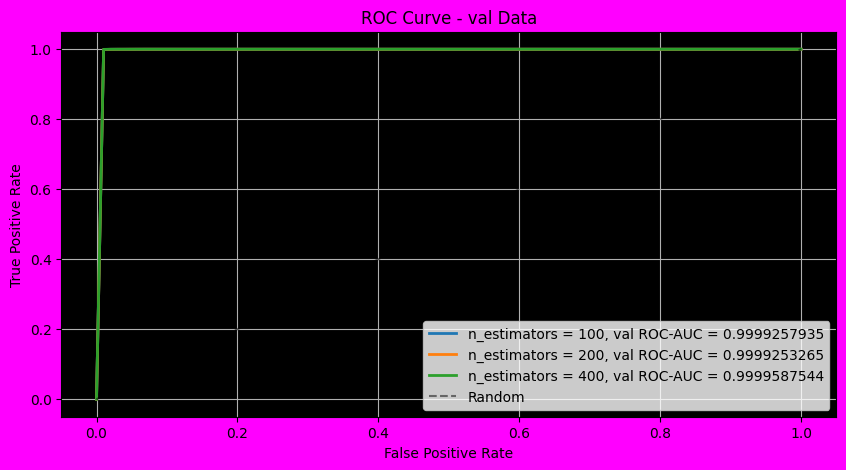

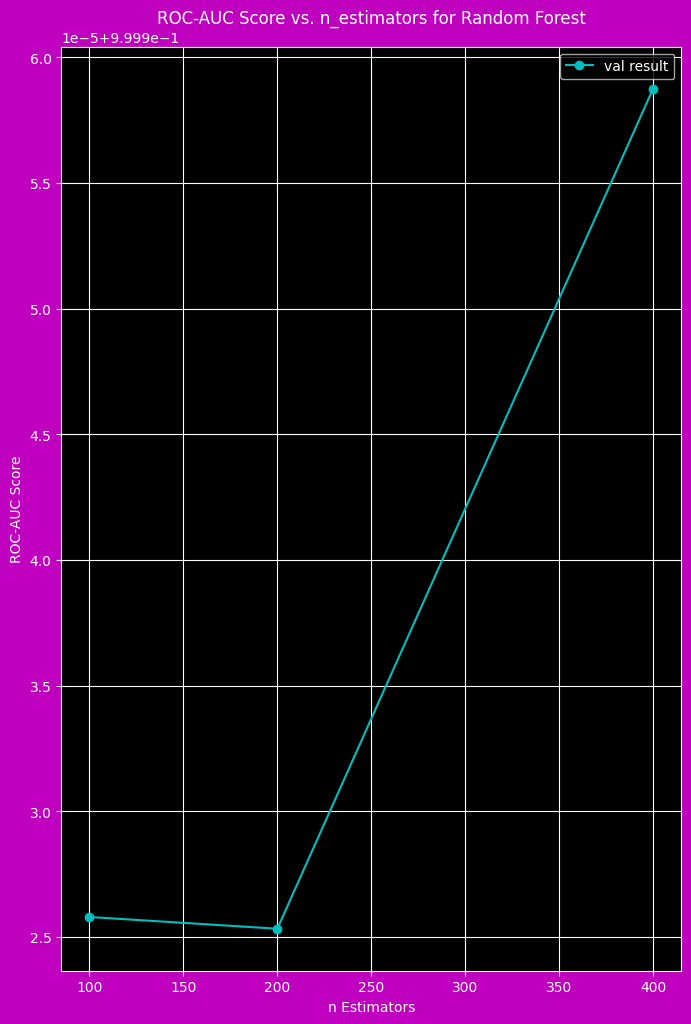





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9999257934552311, 0.9999253264536909, 0.9999587544239524]


Best n Estimators: 400
Best Mean ROC-AUC score for val data: 0.9999587544239524
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [157]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Defining your values of n_estimators

n_values = [100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of n_estimators

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs n_estimators

    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of n Estimators

print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

================================================Random Forest:==============================================
n_estimators = 10
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 1.1088004112243652 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 1.1351447105407715 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 1.1958107948303223 seconds
ROC-AUC Score for val data = 0.9996565250370547
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 5.575815439224243 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 5.910481929779053 seconds
Train: [    0  

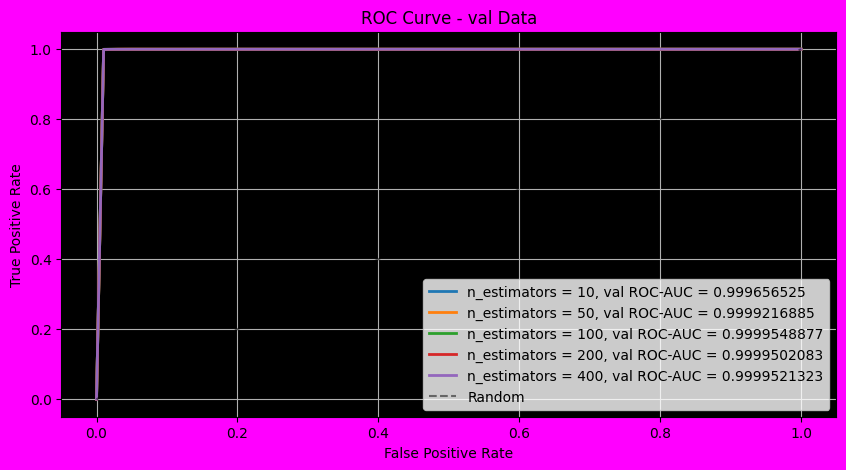

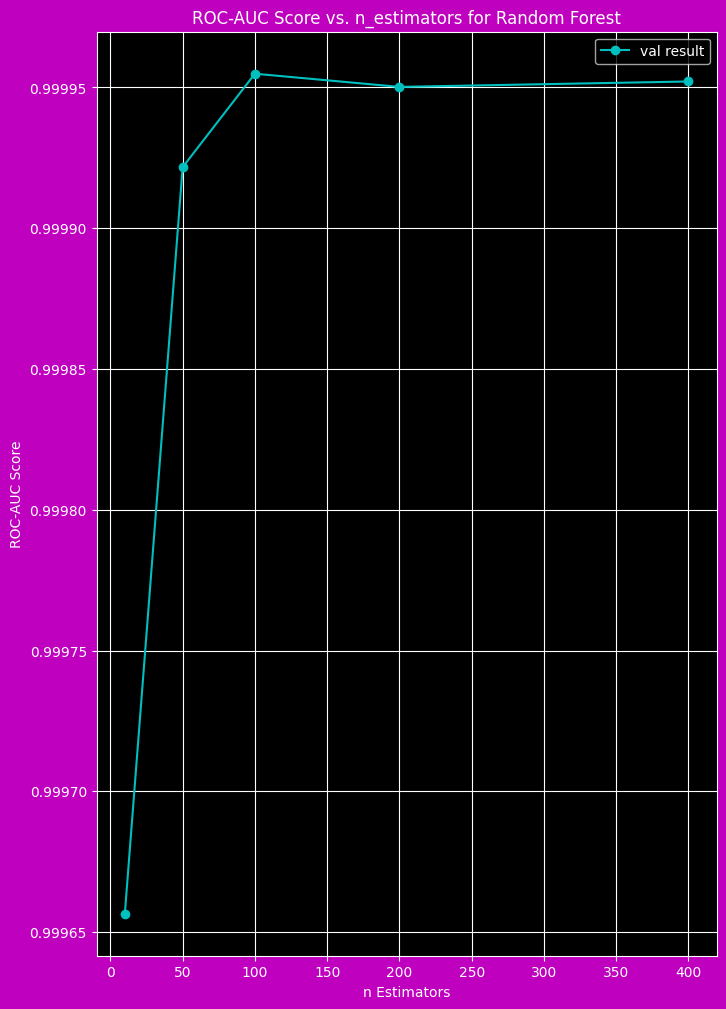





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9996565250370547, 0.9999216885116912, 0.9999548876511978, 0.9999502082957631, 0.9999521323421096]


Best n Estimators: 100


Best Mean ROC-AUC score for val data: 0.9999548876511978


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [154]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Defining your values of n_estimators

n_values = [10, 50, 100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of n_estimators

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs n_estimators

    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of n Estimators

print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }

# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 153.85 seconds


Best ROC AUC score:  0.9999500214951468


Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}




In [156]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'min_samples_split': 5, 'n_estimators': 500} 0.9999500214951468
{'min_samples_split': 7, 'n_estimators': 500} 0.9999411064357407

Rank of each hyperparameter combination:


1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:


{'min_samples_split': 5, 'n_estimators': 500} 8.594219083136252e-06
{'min_samples_split': 7, 'n_estimators': 500} 8.374120259550778e-06


#**6. Performing XGBoost**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 1.8396503925323486 seconds
Train: [    0     1     2 ... 35841 35842 35843] val: [ 6113  6114  6115 ... 29867 29868 29869]
Time elapsed: 0.17622756958007812 seconds
Train: [    0     1     2 ... 29867 29868 29869] val: [12235 12236 12237 ... 35841 35842 35843]
Time elapsed: 0.18944478034973145 seconds
ROC-AUC Score for val data = 0.9880413794747293


Mean precision val score: 0.9777473473981918


Mean recall val score: 0.9192612431648254


Mean f1 val score: 0.9476021688448485


------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 6113  6114  6115 ... 35841 35842 35843] val: [    0     1     2 ... 23893 23894 23895]
Time elapsed: 0.16603469848632812 seconds
Train: 

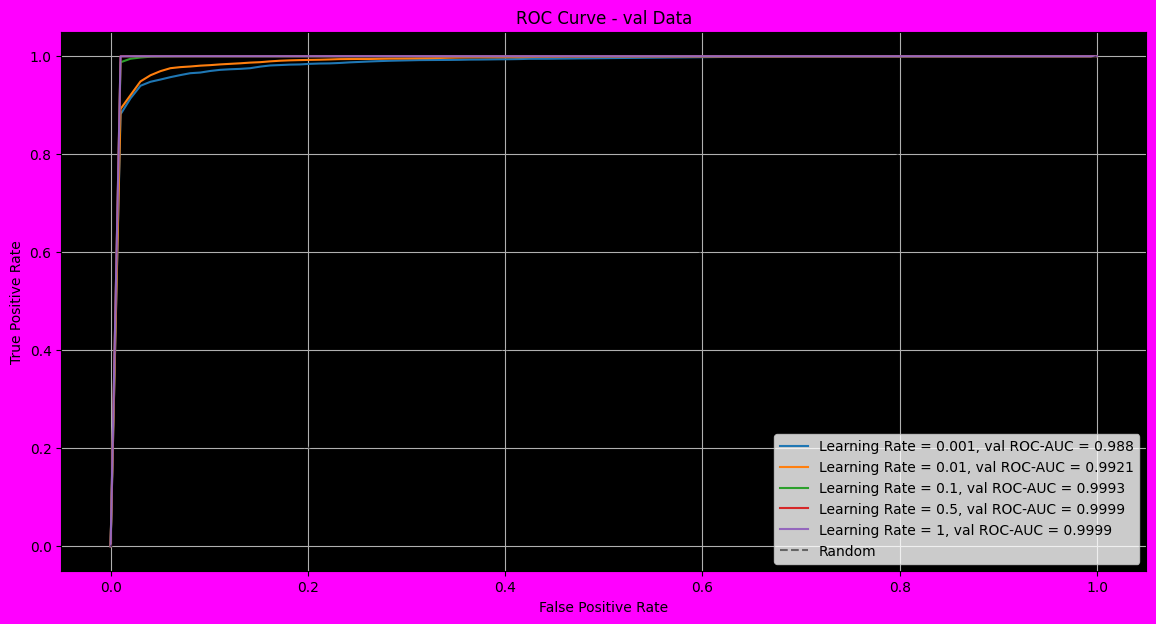

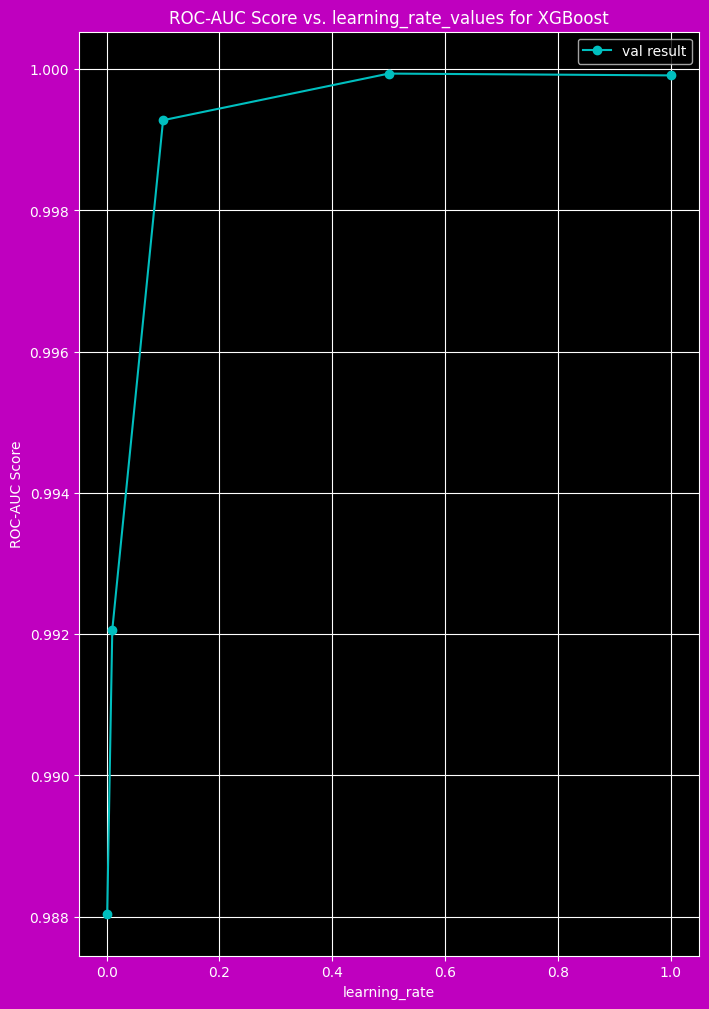





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9880413794747293, 0.9920605955420333, 0.9992757086309395, 0.9999358433283806, 0.9999102469739515]


Best Learning Rate : 0.5


Best Mean ROC-AUC score for val data: 0.9999358433283806


Mean precision val score for best Learning Rate: 0.9967719512271538


Mean recall val score for best Learning Rate: 0.9992746345273966


Mean f1 val score for best Learning Rate: 0.9980216265133596






In [158]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Defining your values of C

learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of learning_rate_values

print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val dat

best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])
print("\n")


print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [159]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Defining the XGBoost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(xgb_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 5.23 seconds


Best ROC AUC score:  0.9999608559308841


Best hyperparameters:  {'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9}




In [160]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")

for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.5} 0.9999178123989059
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.7} 0.9999219126724306
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.9} 0.9999354650571327
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.5} 0.9998742271451407
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.7} 0.9999038864129712
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} 0.9999188818324334
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.5} 0.9999045121950355
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.7} 0.9999144172977071
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9} 0.9999608559308841
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.5} 0.9998161461635617
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.7} 0.9999044374747889
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.9} 0.9998995339586149
{'learning_rate': 1, 'max_depth': 5, 'subsample': 0.5} 0.9998732371018751


##**Observations**

#**A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data**

* **Logistic Regresion** {'C': 4, 'penalty': 'l2'} =
   *  **Best Mean ROC-AUC score for val data:**  **[Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
   *  **Mean precision val score for best C:**   **[Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
   *  **Mean recall val score for best C:**      **[Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
   *  **Mean f1 val score for best C:**          **[Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**


---
* **KNeighborsClassifier** {'n_neighbors': 9} =
   *  **0.9998373276002304 [Before Oversampling {'metric': 'manhattan', 'n_neighbors': 9} = 0.9274613536399045]**


---
* **SVM.SVC** {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =
   * **Not computed due to very large training time** **[Before Oversampling {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9565173998635063]**


---
* **DecisionTreeClassifier** {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =
   * **Best Mean ROC-AUC score for val data:** **[Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
   * **Mean precision val score for best Max Depth:** **[Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
   * **Mean recall val score for best Max Depth:** **[Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
   * **Mean f1 val score for best Max Depth:**  **[Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
  

---

* **RandomForestClassifier** {'min_samples_split': 5, 'n_estimators': 500} =
   * **1.0** **[Before Oversampling {'min_samples_split': 5, 'n_estimators': 500} = 0.9646808744238831]**


---

* **XGBClassifier** {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =
  * **Best Mean ROC-AUC score for val data:** **[Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} =]**
  * **Mean precision val score for best Learning Rate:** **[Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean recall val score for best Learning Rate:** **[Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean f1 val score for best Learning Rate: ** **[Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**


---



**Proceeding with the model that shows the best results**

**Applying the best hyperparameter on the model**

**Predicting on the test dataset**

In [161]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
221018 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630 -1.358708   
7034   -1.870060  1.144615  1.520463 -0.324813  0.103339  0.571188 -0.018978   
6440   -2.104792 -1.700357  2.444681 -0.500963  1.904566 -1.103889 -0.243060   
3188   -0.864949 -0.769920  0.829225 -1.735165 -1.175958  0.253455  1.315697   
15868  -5.008899 -3.567746  1.021427  3.768790  5.280372 -3.174799 -2.478539   

              V8        V9       V10       V11       V12       V13       V14  \
221018  0.672409 -3.188001 -4.937427  3.723933 -4.603176  1.019180 -6.619090   
7034    0.441588  1.976561 -0.220849  1.521003 -0.953793  2.317437  0.679833   
6440   -0.970038  2.204698  0.491798  2.244565 -2.172107  1.931106  0.385315   
3188    0.118620  0.981120 -1.738615  0.971364  0.680659 -1.350503  0.269613   
15868  -0.348031 -0.648985  1.898582 -0.190211 -0.073993  0.070418  0.318212   

             V15       V16       V17       V18       V19       V20       V21  \
221018 -0.590224 -4.472548 -7.165044 -1.581128  1.930380  0.264699  0.861308   
7034   -2.741946 -0.426633  0.618127 -0.272849 -0.366897  0.032567 -0.270466   
6440   -0.315036  0.786114 -0.873448  0.791680 -0.432742 -0.568108 -0.275233   
3188   -0.277642 -1.189251  0.397299  0.093907  1.143614  0.553799  0.293608   
15868   1.352926 -0.234920  0.113104 -0.974804  0.322585 -2.432219 -0.640997   

            V22       V23       V24       V25       V26       V27       V28  \
221018 1.249301  1.850627 -0.117471  1.219815  0.000251  1.036011  0.004367   
7034   0.162836 -0.005604 -0.285377  0.152556  0.334377  0.017770 -0.011909   
6440   0.626030 -0.795250  0.112904 -0.711995  0.742631 -0.760977 -0.529885   
3188   0.542974  0.589833  0.033605 -0.222383 -0.049898  0.057414  0.159841   
15868  0.091000 -1.968210  0.353708 -0.223773  0.241232  0.453529  0.553549   

          Amount  
221018  5.610998  
7034   -0.294150  
6440    0.978963  
3188    5.694778  
15868  -0.153903

In [162]:
y_test_saved.head()

221018   1.000000
7034     0.000000
6440     0.000000
3188     0.000000
15868    0.000000
Name: Class, dtype: float64

In [163]:
scaler = RobustScaler()

# Transforming the test data

X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [164]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
221018 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630 -1.358708   
7034   -1.870060  1.144615  1.520463 -0.324813  0.103339  0.571188 -0.018978   
6440   -2.104792 -1.700357  2.444681 -0.500963  1.904566 -1.103889 -0.243060   
3188   -0.864949 -0.769920  0.829225 -1.735165 -1.175958  0.253455  1.315697   
15868  -5.008899 -3.567746  1.021427  3.768790  5.280372 -3.174799 -2.478539   

              V8        V9       V10       V11       V12       V13       V14  \
221018  0.672409 -3.188001 -4.937427  3.723933 -4.603176  1.019180 -6.619090   
7034    0.441588  1.976561 -0.220849  1.521003 -0.953793  2.317437  0.679833   
6440   -0.970038  2.204698  0.491798  2.244565 -2.172107  1.931106  0.385315   
3188    0.118620  0.981120 -1.738615  0.971364  0.680659 -1.350503  0.269613   
15868  -0.348031 -0.648985  1.898582 -0.190211 -0.073993  0.070418  0.318212   

             V15       V16       V17       V18       V19       V20       V21  \
221018 -0.590224 -4.472548 -7.165044 -1.581128  1.930380  0.264699  0.861308   
7034   -2.741946 -0.426633  0.618127 -0.272849 -0.366897  0.032567 -0.270466   
6440   -0.315036  0.786114 -0.873448  0.791680 -0.432742 -0.568108 -0.275233   
3188   -0.277642 -1.189251  0.397299  0.093907  1.143614  0.553799  0.293608   
15868   1.352926 -0.234920  0.113104 -0.974804  0.322585 -2.432219 -0.640997   

            V22       V23       V24       V25       V26       V27       V28  \
221018 1.249301  1.850627 -0.117471  1.219815  0.000251  1.036011  0.004367   
7034   0.162836 -0.005604 -0.285377  0.152556  0.334377  0.017770 -0.011909   
6440   0.626030 -0.795250  0.112904 -0.711995  0.742631 -0.760977 -0.529885   
3188   0.542974  0.589833  0.033605 -0.222383 -0.049898  0.057414  0.159841   
15868  0.091000 -1.968210  0.353708 -0.223773  0.241232  0.453529  0.553549   

          Amount  
221018  5.610998  
7034   -0.294150  
6440    0.978963  
3188    5.694778  
15868  -0.153903

In [165]:
# Defining the RandomOverSampler

smote = over_sampling.SMOTE(random_state=0)

# Resampling the training data using RandomOverSampler

X_test_saved_smote, y_test_saved_smote = smote.fit_resample(X_test_saved,y_test_saved)

In [166]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predict on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results
print("\n")
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")



LogisticRegression ROC-AUC Score on Test Set = 0.9721995411364331
LogisticRegression F1-Score on Test Set = 0.9024520255863538


LogisticRegression Precision on Test Set = 0.9619318181818182


LogisticRegression Recall on Test Set = 0.8498995983935743


Time taken: 0.26 seconds


KNeighbors Classifier ROC-AUC Score on Test Set = 0.94205675614103
KNeighbors Classifier F1-Score on Test Set = 0.9217577706323687


KNeighbors Classifier Precision on Test Set = 0.9885057471264368


KNeighbors Classifier Recall on Test Set = 0.8634538152610441


Time taken: 1.03 seconds


Decision Tree Classifier ROC-AUC Score on Test Set = 0.8933715534830081


Decision Tree Classifier F1-Score on Test Set = 0.885492089031912


Decision Tree Classifier Precision on Test Set = 0.9504893494530801


Decision Tree Classifier Recall on Test Set = 0.8288152610441767


Time taken: 0.64 seconds




In [167]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc')
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("\n")
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("\n")
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

XGBOOST Classifier ROC-AUC Score on Test Set = 0.975643916025548
XGBOOST Classifier F1-Score on Test Set = 0.8935589519650654


XGBOOST Classifier Precision on Test Set = 0.979066985645933


XGBOOST Classifier Recall on Test Set = 0.8217871485943775


Time taken: 0.25 seconds




In [168]:
import time
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')

start_time = time.time()
try:
    clf.fit(X_smote_train_pt, y_smote_train_pt)
except TimeoutError:
    print("============================================================================================================")

    print(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)
end_time = time.time()

elapsed_time = end_time - start_time
if elapsed_time > 50000:
    raise TimeoutError(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)

y_pred_proba = clf.predict_proba(X_test_saved_smote)
y_pred = clf.predict(X_test_saved_smote)
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved_smote, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved_smote, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved_smote, y_pred=y_pred)
print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")
print("F1 Score on Test Set =", f1)
print("\n")
print("Precision on Test Set =", preci_sion)
print("\n")
print("Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

SVM Classifier ROC-AUC Score on Test Set = 0.917275779826132


F1 Score on Test Set = 0.8678951466389826


Precision on Test Set = 0.8984416980118216


Recall on Test Set = 0.8393574297188755


Time taken: 145.07 seconds




In [169]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("Random Forest Classifier F1-Score on Test Set =", f1)
print("\n")
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

Random Forest Classifier ROC-AUC Score on Test Set = 0.9429437126014096
Random Forest Classifier F1-Score on Test Set = 0.8914536960703491


Random Forest Classifier Precision on Test Set = 0.9848208864602307


Random Forest Classifier Recall on Test Set = 0.8142570281124498


Time taken: 91.98 seconds




#**B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set**

* **LogisticRegression** {'C': 4, 'penalty': 'l2'} =
  * **LogisticRegression ROC-AUC Score on Test Set = [LogisticRegression ROC-AUC Score on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**
  * **LogisticRegression F1-Score on Test Set =     [LogisticRegression F1-Score on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**
  * **LogisticRegression Precision on Test Set =  [LogisticRegression Precision on Test Set {'C': 0.01, 'penalty': 'l2'} =      ]**
  * **LogisticRegression Recall on Test Set =     [LogisticRegression Recall on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**


---

* **KNeighborsClassifier** {'n_neighbors': 9} =
  * **KNeighbors Classifier ROC-AUC Score on Test Set = [KNeighbors Classifier ROC-AUC Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier F1-Score on Test Set =  [KNeighbors Classifier F1-Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier Precision on Test Set =  [KNeighbors Classifier Precision on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier Recall on Test Set = [KNeighbors Classifier Recall on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**


---

* **SVM.SVC** {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =
  * **Not computed due to very large training time [SVM Classifier ROC-AUC Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9701114653796241]**
  * **Not computed due to very large training time [SVM Classifier F1 Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8121827411167513]**
  * **Not computed due to very large training time [SVM Classifier Precision on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8080808080808081]**
  * **Not computed due to very large training time [SVM Classifier Recall on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8163265306122449 ]**

---
* **DecisionTreeClassifier** {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} =
 * **Decision Tree Classifier ROC-AUC Score on Test Set =  [Decision Tree Classifier ROC-AUC Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier F1-Score on Test Set =  [Decision Tree Classifier F1-Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier Precision on Test Set = [Decision Tree Classifier Precision on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier Recall on Test Set =  [Decision Tree Classifier Recall on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**


---

* **RandomForestClassifier** {'min_samples_split': 5, 'n_estimators': 500} =
  * **Random Forest Classifier ROC-AUC Score on Test Set =  [Random Forest Classifier ROC-AUC Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier F1-Score on Test Set =  [Random Forest Classifier F1-Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier Precision on Test Set =  [Random Forest Classifier Precision on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier Recall on Test Set =  [Random Forest Classifier Recall on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**


---

* **XGBClassifier** {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =
  * **XGBOOST Classifier ROC-AUC Score on Test Set = [XGBOOST Classifier ROC-AUC Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier F1-Score on Test Set =  [XGBOOST Classifier F1-Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier Precision on Test Set =  [XGBOOST Classifier Precision on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier Recall on Test Set =  [XGBOOST Classifier Recall on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} =  ]**


##**Observations**
* **Based on ROC-AUC Scores-**
  * **KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.**
  * **LogisticRegression score decreased. But, the best model is XGBClassifier**


---

* **Based on F1 Scores-**
  * **LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.**
  * **RandomForestClassifier score decreased. But, the best model is XGBClassifier**

#**Table Of Scores**

<table>
<tr>
<th>Model</th><th>Parameters</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Logistic Regression</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>KNeighborsClassifier</th><th>{'metric': 'manhattan', 'n_neighbors': 9}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SVM</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Decision Tree</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Random Forest</th><th>{'min_samples_split': 5, 'n_estimators': 500}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>XGBoost</th><th>{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

**Printing the important features of the best model to understand the dataset**
* **This will not give much explanation on the already transformed dataset**
* **But it will help us in understanding if the dataset is not PCA transformed**

Top var = 14


2nd Top var = 3


3rd Top var = 10


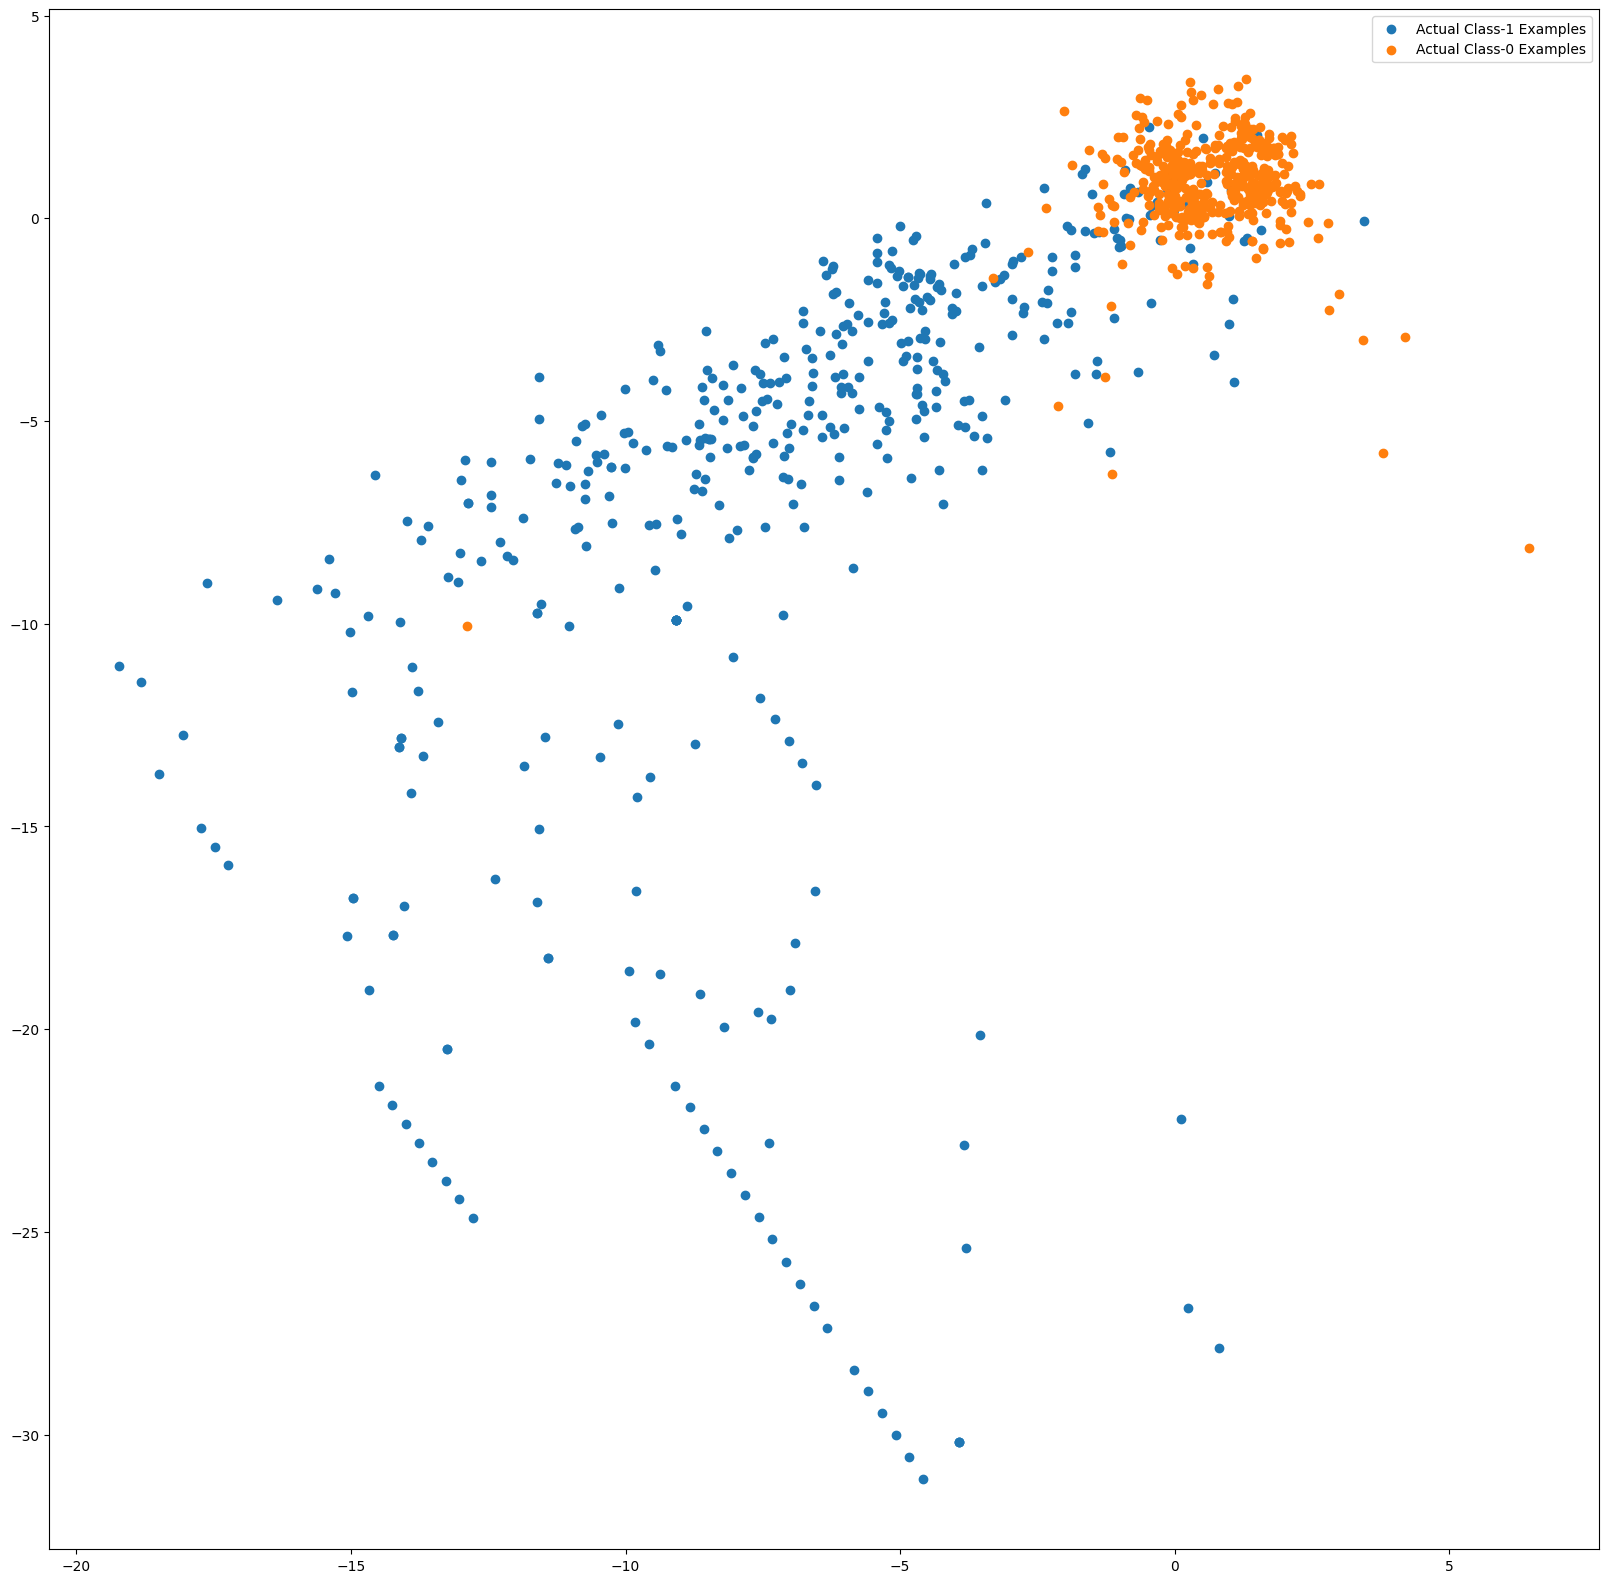

In [170]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)

print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print("\n")
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print("\n")
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#**III. ADASYN(Adaptive Synthetic)**

In [171]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import ADASYN

In [172]:
# Defining the ADASYN

ada = over_sampling.ADASYN(random_state=0)

# Resampling the training data using ADASYN

X_adasyn_train_pt, y_adasyn_train_pt = ada.fit_resample(X_train_pt, y_train_pt)


**Printing the class distribution after applying ADASYN**

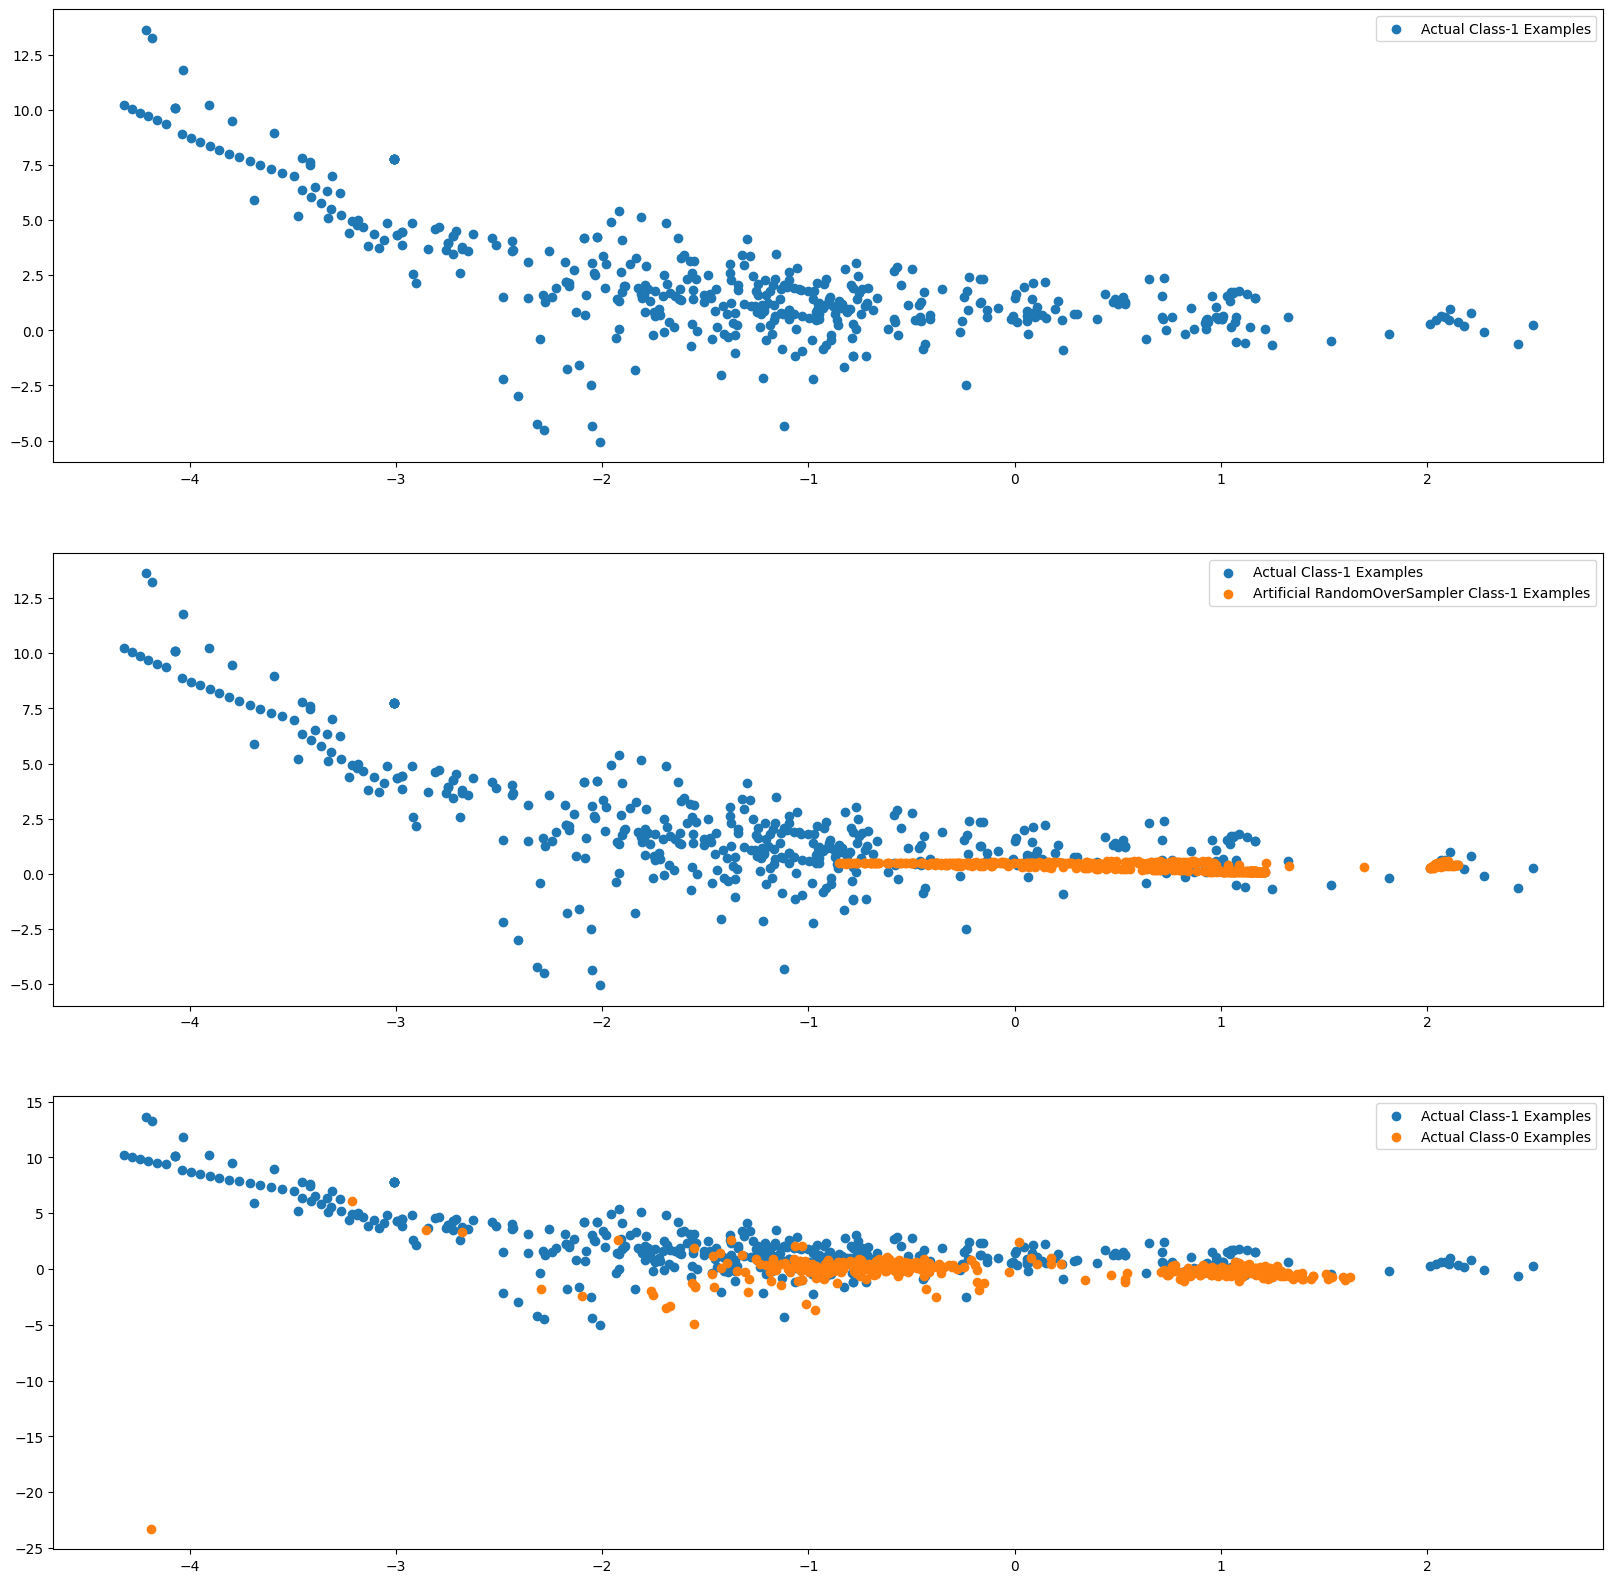

In [173]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from adasyn are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from adasyn, we do

X_adasyn_train_pt_1 = X_adasyn_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_adasyn_train_pt_1[:X_train_pt_1.shape[0], 0], X_adasyn_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##**SOME MORE VISUALIZATION**

* **Checking the distribution of our target variable: We use value_counts() method to check the distribution of our target variable.**
* **y_ros_train_pt is our target variable, we can use the following code to check the distribution of its values:**

In [174]:
print(y_adasyn_train_pt.value_counts())

1.000000    17961
0.000000    17922
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

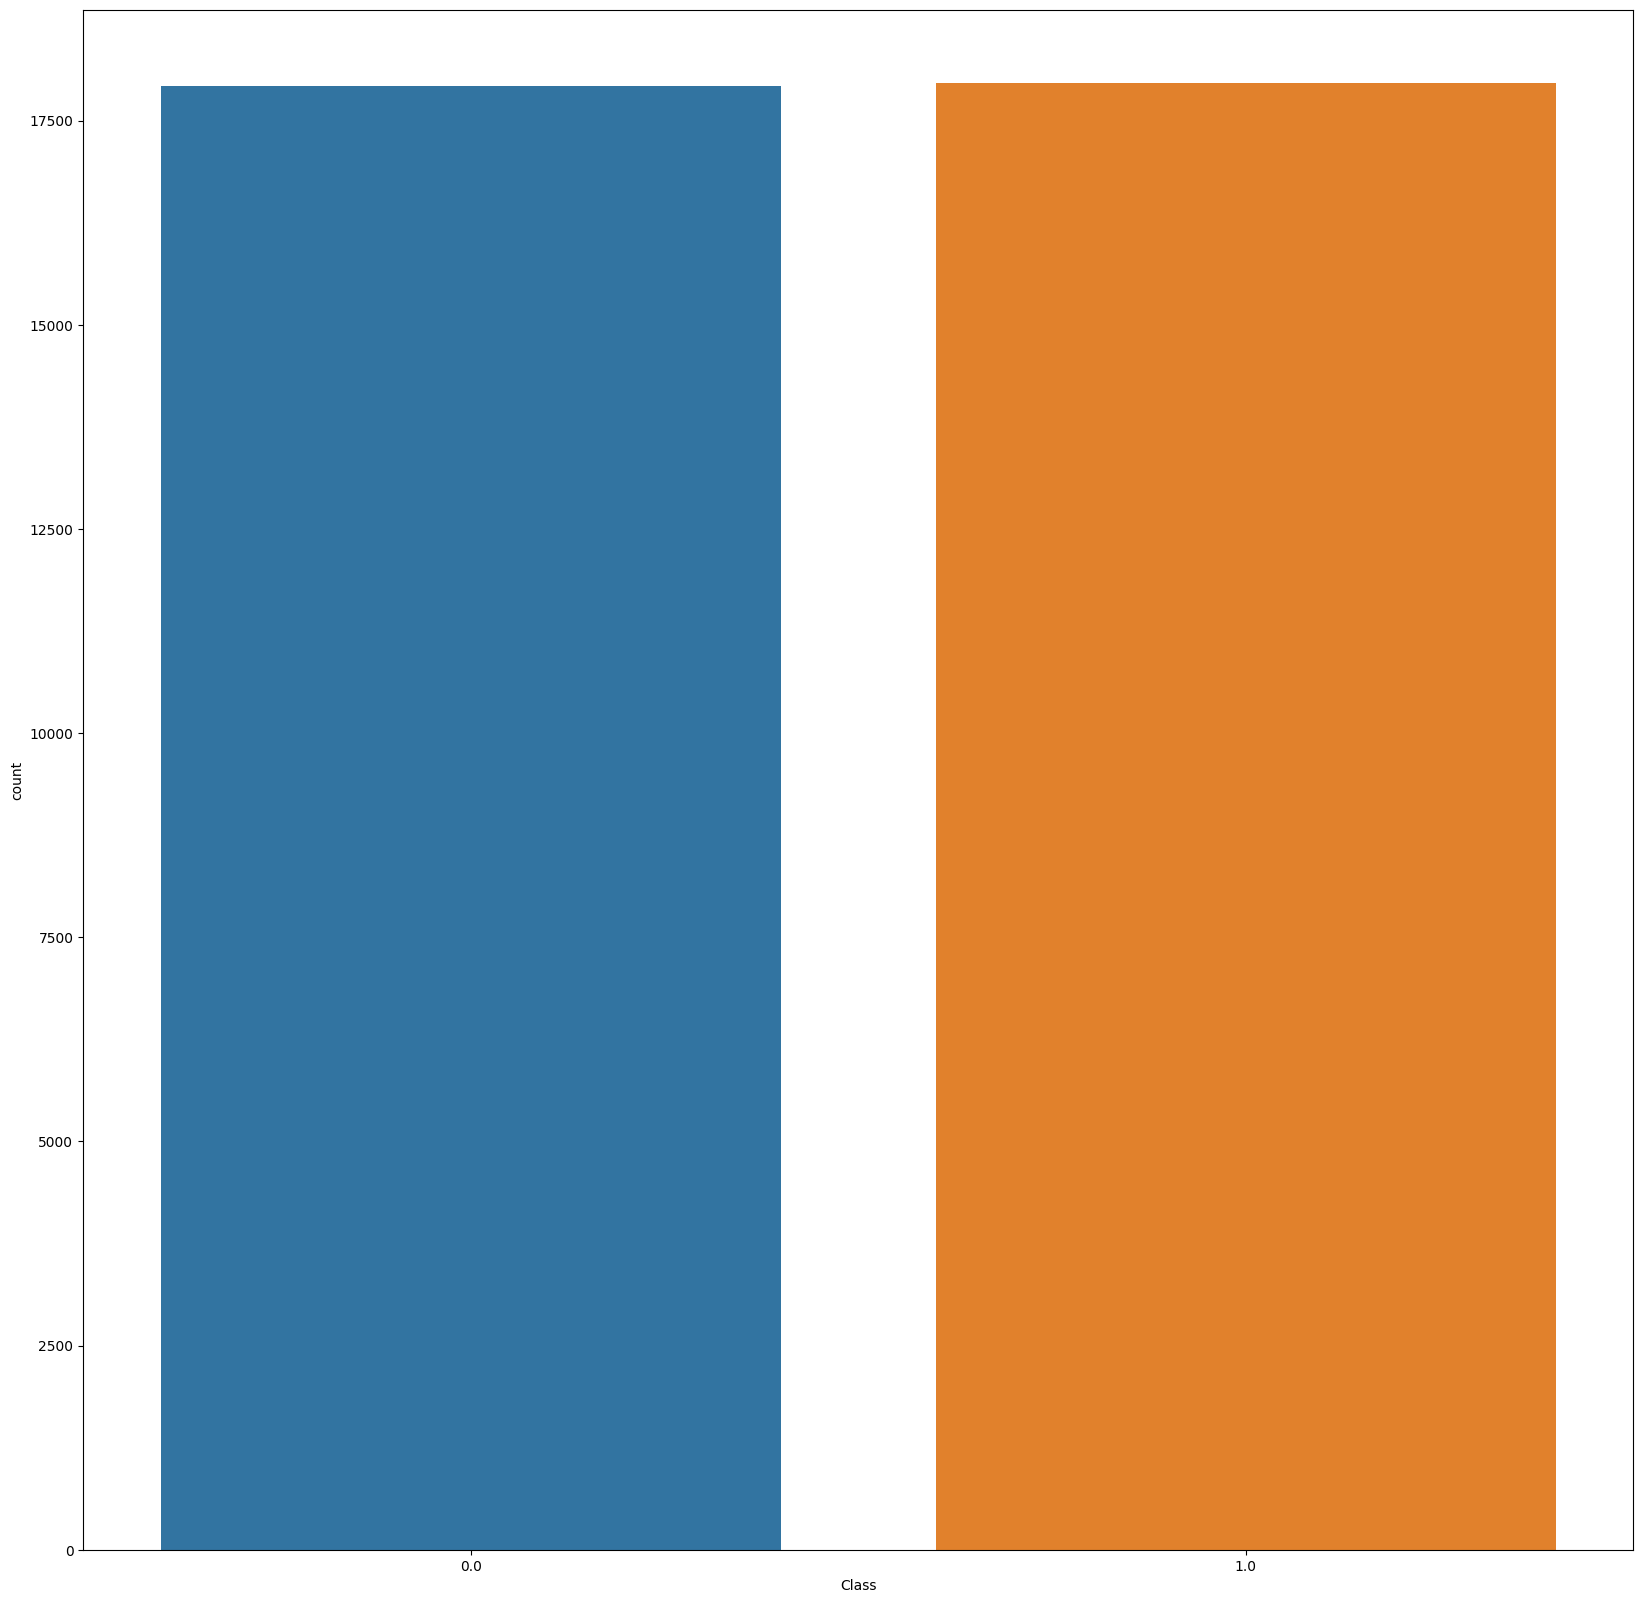

In [175]:
import seaborn as sns

sns.countplot(x=y_adasyn_train_pt)

(array([  107.,   234.,   425.,  2571.,  6130., 11111.,  2486.,  8588.,
         3415.,   816.]),
 array([-4.31971532, -3.63660364, -2.95349196, -2.27038028, -1.58726861,
        -0.90415693, -0.22104525,  0.46206643,  1.1451781 ,  1.82828978,
         2.51140146]),
 <BarContainer object of 10 artists>)

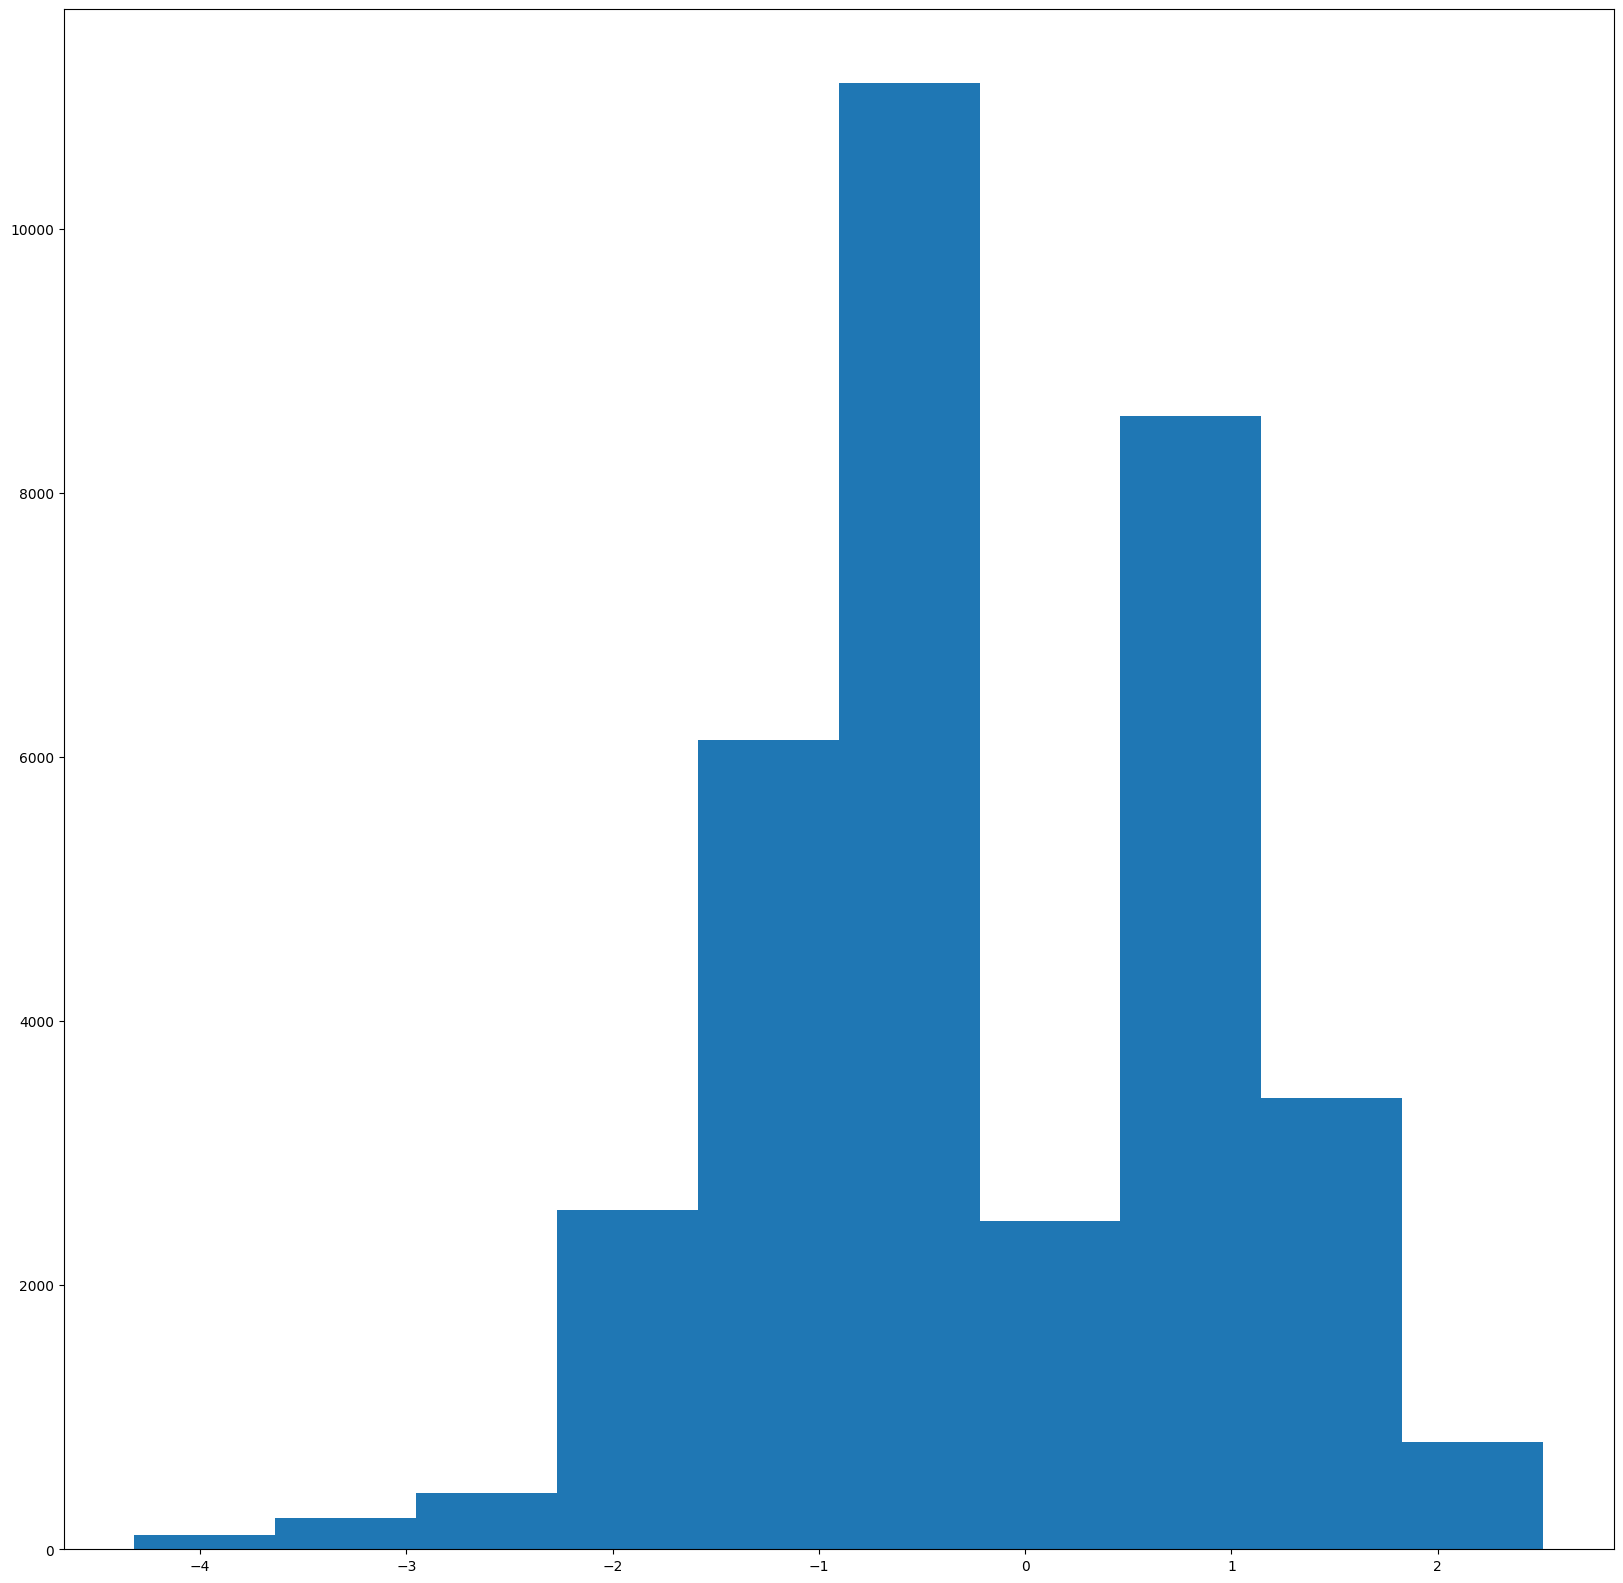

In [176]:
import matplotlib.pyplot as plt

plt.hist(X_adasyn_train_pt[:,0])

#**Building models on other algorithms to see the better performing on ADASYN**



#**1. Performing Logistic Regression**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 0.11274147033691406 seconds
Train: [    0     1     2 ... 35880 35881 35882] val: [ 6113  6114  6115 ... 29893 29894 29895]
Time elapsed: 0.12250566482543945 seconds
Train: [    0     1     2 ... 29893 29894 29895] val: [12235 12236 12237 ... 35880 35881 35882]
Time elapsed: 0.17239594459533691 seconds
ROC-AUC Score for val data = 0.9743535853926858


Mean precision val score: 0.9298748779434095


Mean recall val score: 0.9142029953788765


Mean f1 val score: 0.9217339189448802
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 0.12175369262695312 seconds
Train: [ 

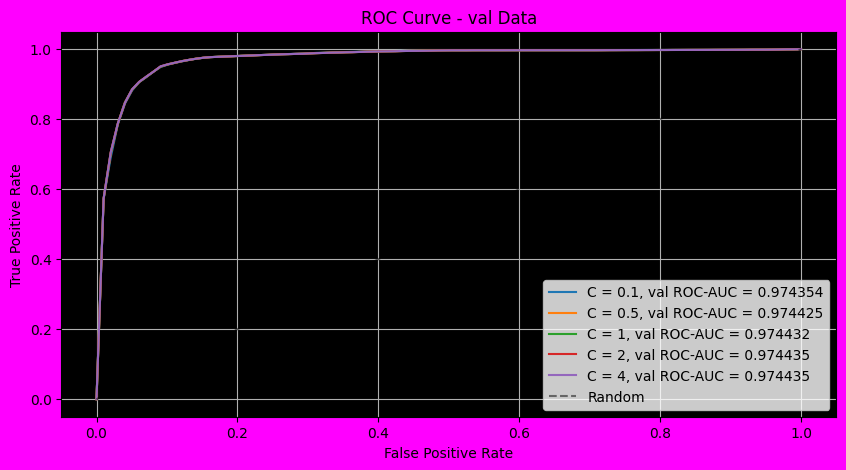

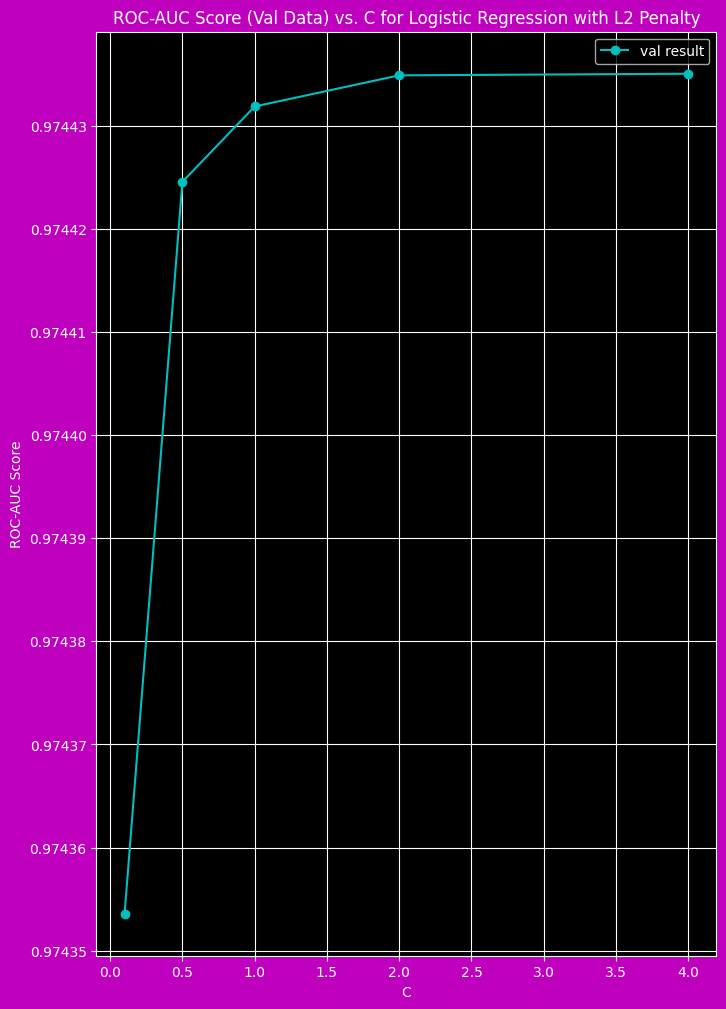





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9743535853926858, 0.9744245459701988, 0.9744318526543031, 0.974434872253346, 0.9744350306890984]
Best C: 4


Best Mean ROC-AUC score for val data: 0.9744350306890984


Mean precision val score for best C 0.9305181630642109


Mean recall val score for best C 0.9140916430042871


Mean f1 val score for best C 0.9219828043301228
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [177]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Defining values of C

C_values = [0.1, 0.5, 1, 2, 4]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for Logistic Regression classifier for val data

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for  and val data for all values of C

print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Defining the logistic regression parameters for Stratified K-fold cross-validation

params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Defining the logistic regression classifier

logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        #pre_dispatch=6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 0.48 seconds


Best ROC AUC score:  0.9744350306890984


Best hyperparameters:  {'C': 4, 'penalty': 'l2'}




In [179]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9736821626338523
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.974353585392686
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9744245552899488
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9744318526543031
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9744348722533461
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9744350306890984

Rank of each hyperparameter combination:


1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.006819838797154708

#**2. Performing KNN Classifier**


**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

============================================KNN Classifier:===============================================
K = 3
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 0.1967461109161377 seconds
Train: [    0     1     2 ... 35880 35881 35882] val: [ 6113  6114  6115 ... 29893 29894 29895]
Time elapsed: 0.1832566261291504 seconds
Train: [    0     1     2 ... 29893 29894 29895] val: [12235 12236 12237 ... 35880 35881 35882]
Time elapsed: 0.14698457717895508 seconds
Mean ROC-AUC for val data: 0.9892879537551016
------------------------------------------------------------------------------------------------------------
K = 5
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 1.4120826721191406 seconds
Train: [    0     1     2 ... 35880 35881 35882] val: [ 6113  6114  6115 ... 29893 29894 29895]
Time elapsed: 1.538989782333374 seconds
Train: [    0     1     2 ... 29893 29894

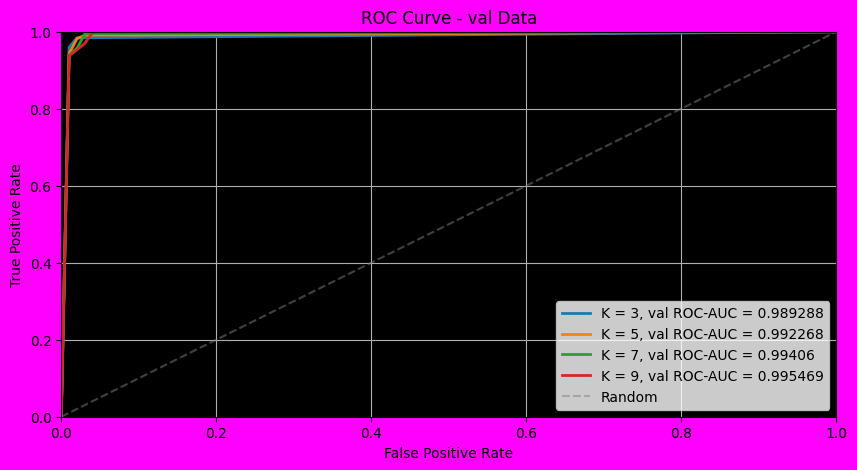

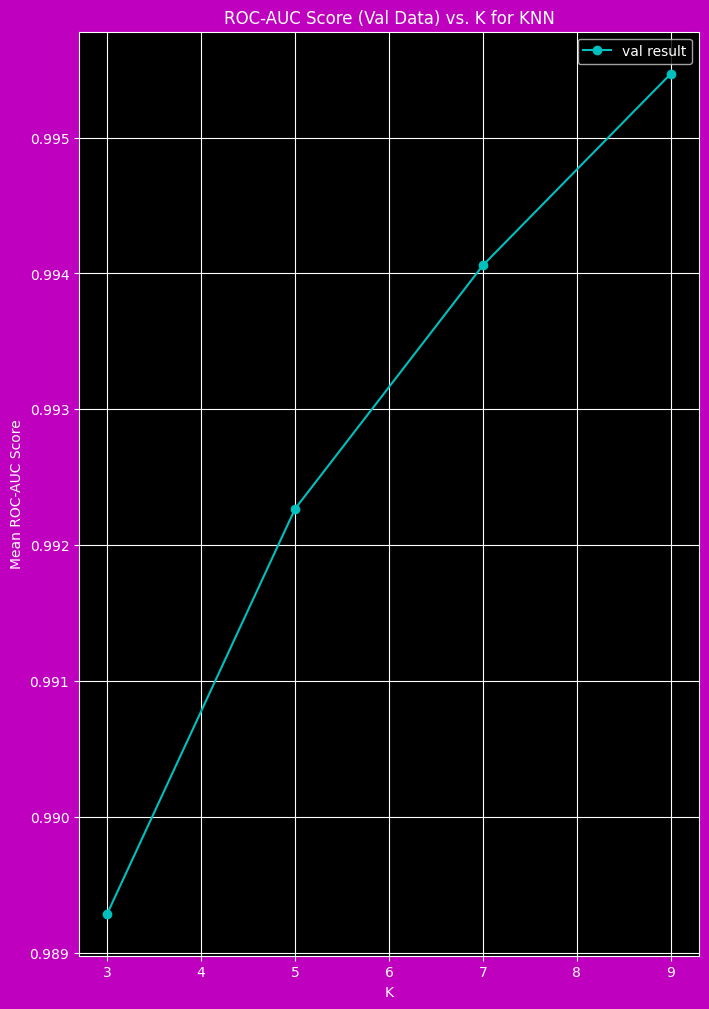





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of K: 
 [0.9892879537551016, 0.9922678739620104, 0.9940602203483436, 0.9954694551060833]


Best K: 9


Best Mean ROC-AUC score for val data: 0.9744350306890984


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [180]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Defining  values of K (number of neighbors)

K_values = [3, 5, 7, 9]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of K

for k in K_values:
    print("K =", k)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt[train_index], y_adasyn_train_pt[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores and mean false positive rates for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr

    print("Mean ROC-AUC for val data:", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of k

    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)).format(k))


print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plotting ROC curves of KNN Classifier for val data

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. K for KNN')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for train and val data for all values of K

print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_k = K_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Defining the KNN parameters for Stratified K-fold cross-validation

params = {'n_neighbors': [9]}

# Defining the KNN classifier

knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fiting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 5.22 seconds
Best ROC AUC score:  0.9954694551060833
Best hyperparameters:  {'n_neighbors': 9}


In [182]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination
print("Mean test scores:")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'n_neighbors': 9} 0.9954694551060833

Rank of each hyperparameter combination:
1 {'n_neighbors': 9}

Standard deviation of test scores:
{'n_neighbors': 9} 0.0007877677281234196


# **3. Performing SVM Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

=============================================SVM Classifier:================================================
C = 0.1 Kernel = rbf
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 63.2171950340271 seconds
Train: [    0     1     2 ... 35880 35881 35882] val: [ 6113  6114  6115 ... 29893 29894 29895]
Time elapsed: 56.05135250091553 seconds
Train: [    0     1     2 ... 29893 29894 29895] val: [12235 12236 12237 ... 35880 35881 35882]
Time elapsed: 55.09875750541687 seconds
ROC-AUC Score for val data = 0.9858977595078366
------------------------------------------------------------------------------------------------------------
C = 1 Kernel = rbf
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 25.64543652534485 seconds
Train: [    0     1     2 ... 35880 35881 35882] val: [ 6113  6114  6115 ... 29893 29894 29895]
Time elapsed: 23.351099967956543 seconds
Train: [    0 

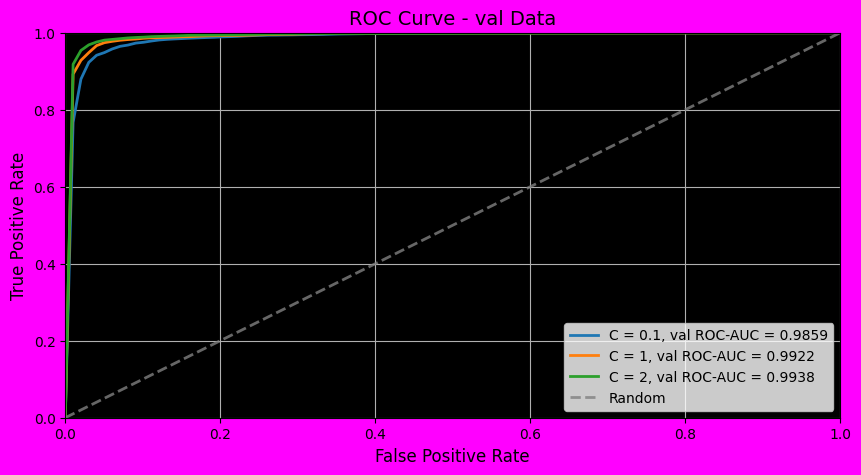

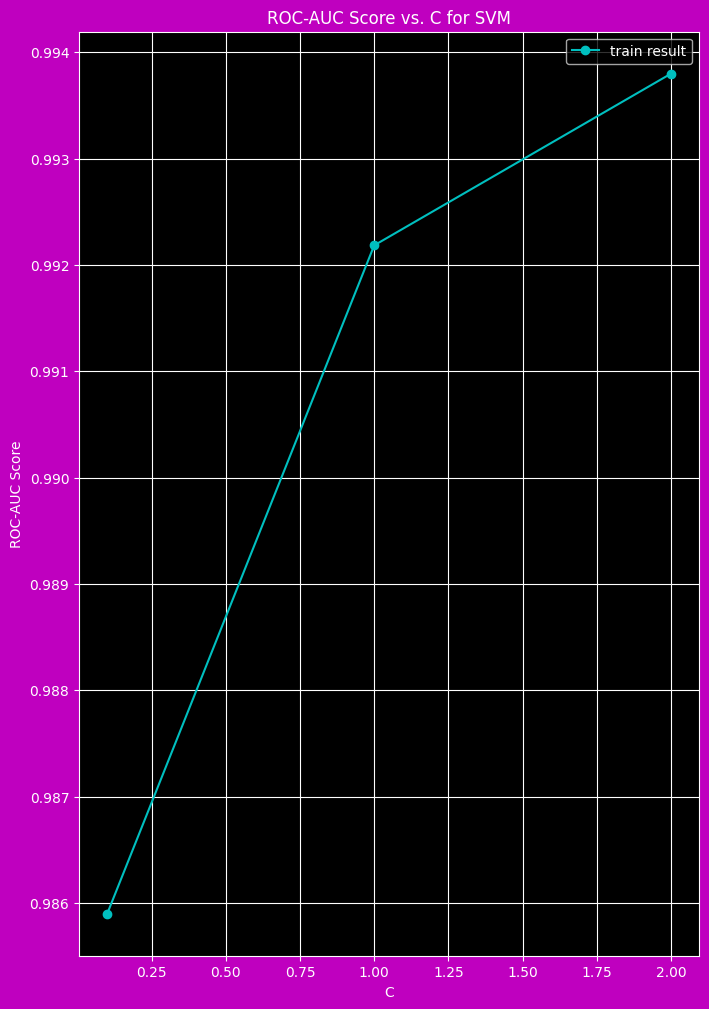





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9858977595078366, 0.9921833671276793, 0.9937973800952169]
Best C: 2
Best Mean ROC-AUC score for val data: 0.9937973800952169
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [183]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("=============================================SVM Classifier:================================================")

# Define your values of C
C_values = [0.1, 1, 2]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Perform cro ss-validation
    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        # y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt[train_index], y_adasyn_train_pt[val_index]

        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curves for the current value of C for val data
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))

print("=======================================SVM Has Run Successfully:============================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Set plot properties for val data
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)




print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [184]:
from sklearn.model_selection import GridSearchCV
import time
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Define the SVM classifier
svm_classifier = svm.SVC()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 64.63 seconds
Best ROC AUC score:  0.9892004319816023
Best hyperparameters:  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [185]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.9738608874821534
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.9892004319816023

Rank of each hyperparameter combination:
1 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
2 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

Standard deviation of test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.005601456359701971
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.0044063002463737054


#**4. Performing Decision Tree**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 0.14705228805541992 seconds
Train: [    0     1     2 ... 35880 35881 35882] val: [ 6113  6114  6115 ... 29893 29894 29895]
Time elapsed: 0.15076780319213867 seconds
Train: [    0     1     2 ... 29893 29894 29895] val: [12235 12236 12237 ... 35880 35881 35882]
Time elapsed: 0.14321303367614746 seconds
ROC-AUC Score for val data = 0.8087980752553795


Mean precision val score: 0.8901647365388549


Mean recall val score: 0.7036356550303435


Mean f1 val score: 0.783829131751121
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 0.24335908889770508 seconds
Train: [    0     1     

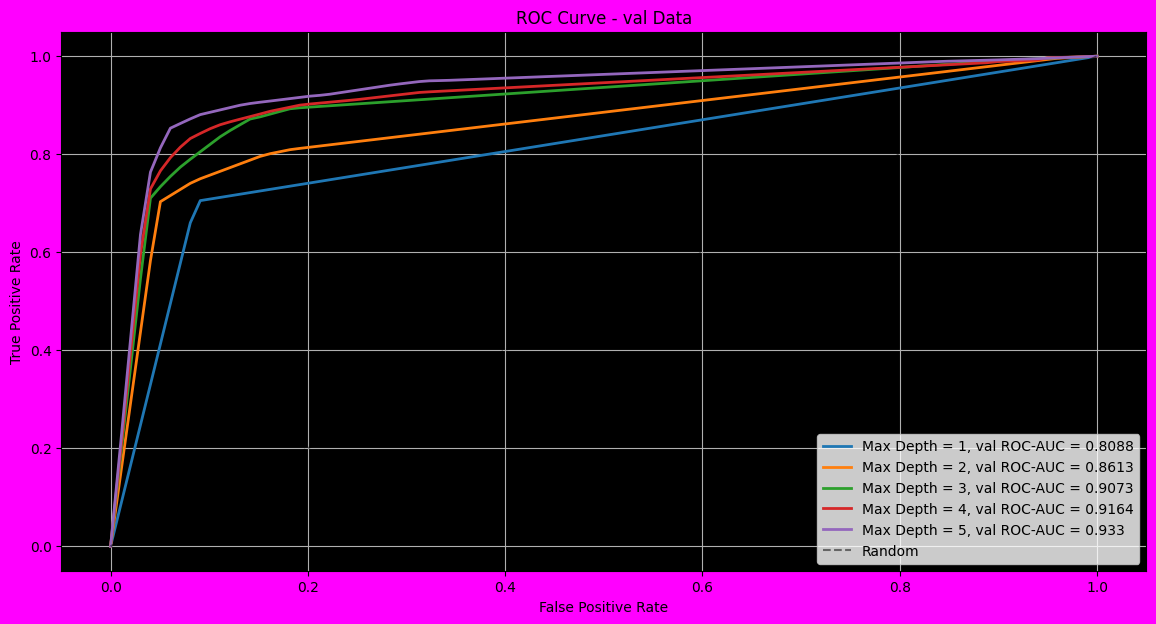

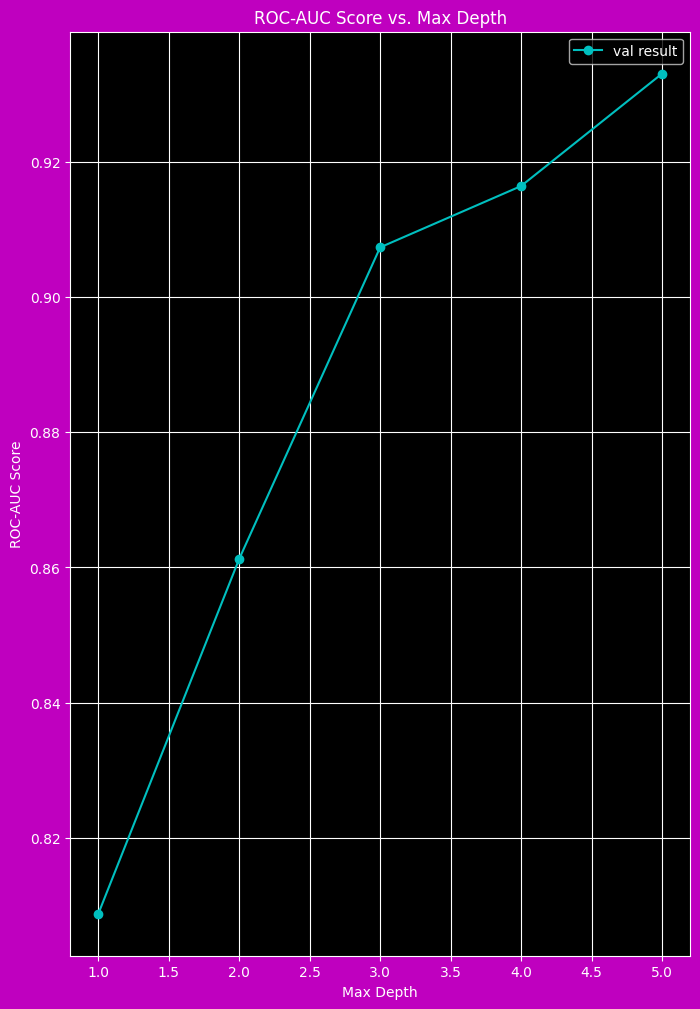





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.8087980752553795, 0.8612808501669922, 0.9073316880619239, 0.916396324014683, 0.9330066723632707]
Best Max Depth: 5


Best Mean ROC-AUC score for val data: 0.9330066723632707


Mean precision val score for best Max Depth: 0.9275563479308656


Mean recall val score for best Max Depth: 0.8669339123656812


Mean f1 val score for best Max Depth: 0.8951855746054044




In [186]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Defining values of max_depth

max_depth_values = [1, 2, 3, 4, 5]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of max_depth

for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt[train_index], y_adasyn_train_pt[val_index]

        # Creating a decision tree classifier with the specified max_depth value

        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printting mean ROC-AUC scores for val data for all values of Max Depth

print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {'max_depth': [6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Defining the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Time taken: 4.23 seconds
Best ROC AUC score:  0.9470747652909468
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [188]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.941373804236449
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.941373804236449
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.941373804236449
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.936949802726053
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.936949802726053
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.936949802726053
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.939582017035124
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.939582017035124
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.939582017035124
{'criterion': 'entropy', 'max_depth': 6, 'min_samp

#**5. Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

================================================Random Forest:==============================================
n_estimators = 100
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 13.203808069229126 seconds
Train: [    0     1     2 ... 35880 35881 35882] val: [ 6113  6114  6115 ... 29893 29894 29895]
Time elapsed: 12.787863731384277 seconds
Train: [    0     1     2 ... 29893 29894 29895] val: [12235 12236 12237 ... 35880 35881 35882]
Time elapsed: 12.269535064697266 seconds
ROC-AUC Score for val data = 0.9972576215844816
------------------------------------------------------------------------------------------------------------
n_estimators = 200
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 26.17898416519165 seconds
Train: [    0     1     2 ... 35880 35881 35882] val: [ 6113  6114  6115 ... 29893 29894 29895]
Time elapsed: 25.52420210838318 seconds
Train: [    0

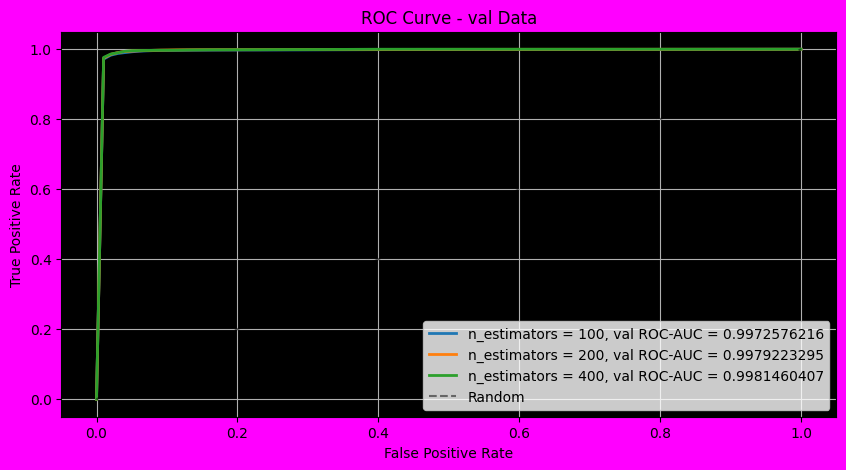

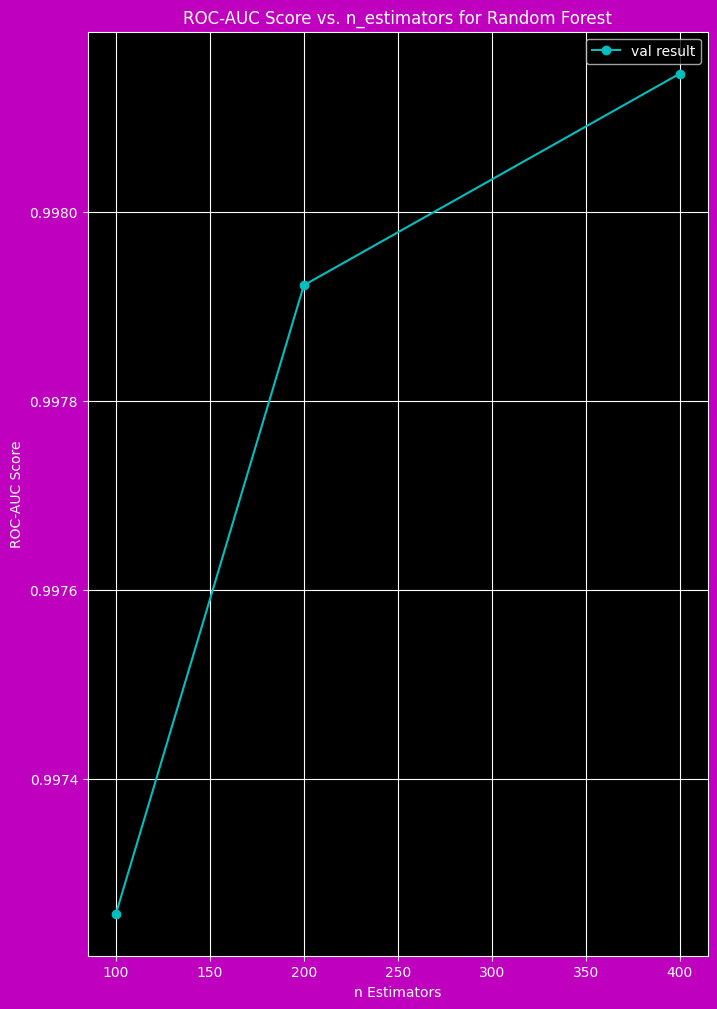





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9972576215844816, 0.9979223294633442, 0.9981460407455375]
Best n Estimators: 400


Best Mean ROC-AUC score for val data: 0.9981460407455375
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [189]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Defining values of n_estimators

n_values = [100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of n_estimators

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs n_estimators

    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of n Estimators

print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }

# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 171.60 seconds
Best ROC AUC score:  0.9980696840326976
Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}


In [191]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'min_samples_split': 5, 'n_estimators': 500} 0.9980696840326976
{'min_samples_split': 7, 'n_estimators': 500} 0.9977529383448015

Rank of each hyperparameter combination:


1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:


{'min_samples_split': 5, 'n_estimators': 500} 0.0011617838501803972
{'min_samples_split': 7, 'n_estimators': 500} 0.0015323537782823296


#**6. Performing XGBoost**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 4.554145574569702 seconds
Train: [    0     1     2 ... 35880 35881 35882] val: [ 6113  6114  6115 ... 29893 29894 29895]
Time elapsed: 2.386078357696533 seconds
Train: [    0     1     2 ... 29893 29894 29895] val: [12235 12236 12237 ... 35880 35881 35882]
Time elapsed: 1.398484706878662 seconds
ROC-AUC Score for val data = 0.9601593077080839


Mean precision val score: 0.9127506548259939


Mean recall val score: 0.8119258393185235


Mean f1 val score: 0.854133696388585
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 6113  6114  6115 ... 35880 35881 35882] val: [    0     1     2 ... 23906 23907 23908]
Time elapsed: 0.6503005027770996 seconds
Train: [    0   

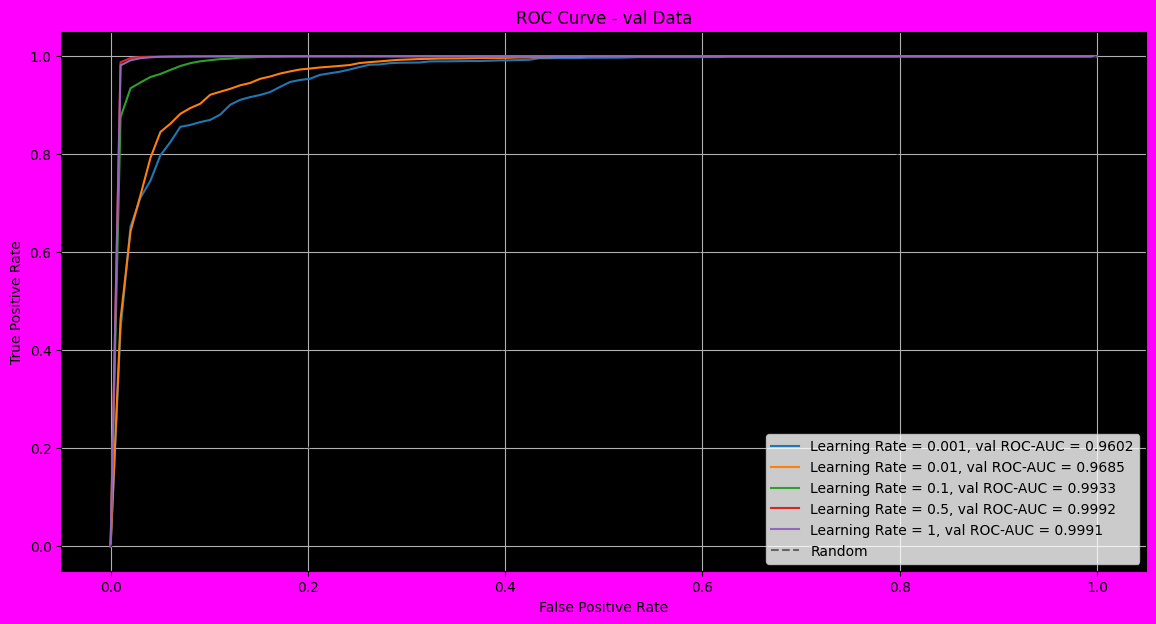

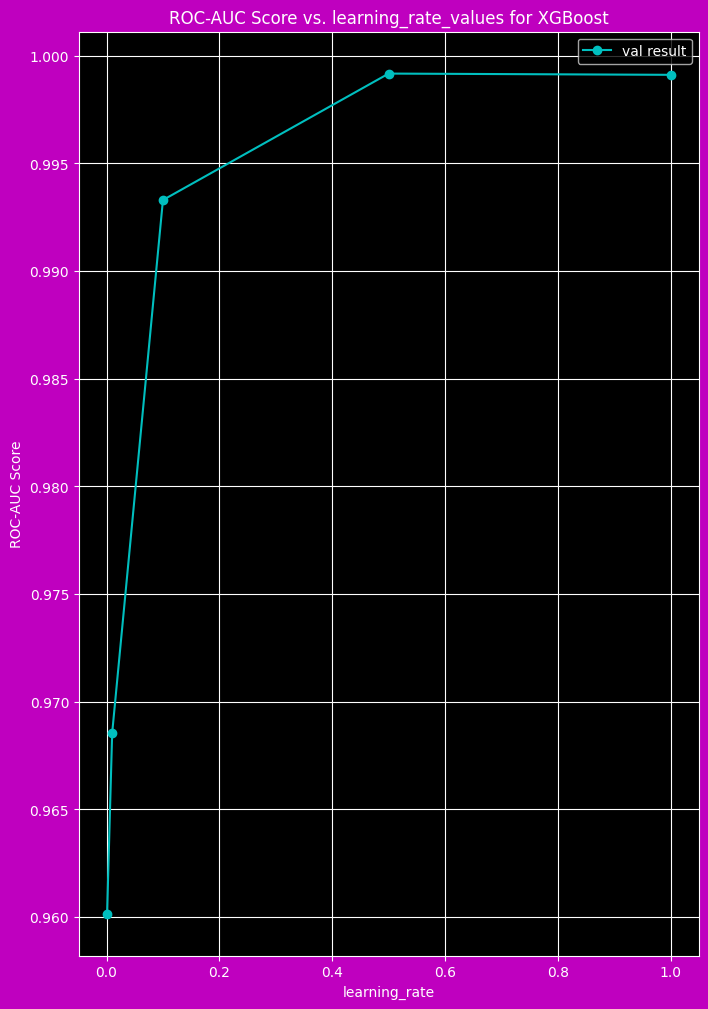





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9601593077080839, 0.9685404891045876, 0.993296592641569, 0.999168668968384, 0.9991109284564349]
Best Learning Rate : 0.5


Best Mean ROC-AUC score for val data: 0.999168668968384


Mean precision val score for best Learning Rate: 0.9954460113231377


Mean recall val score for best Learning Rate: 0.9607482879572408


Mean f1 val score for best Learning Rate: 0.9776884617707867




In [192]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Defining values of C

learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]

        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of learning_rate_values

print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")


**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [193]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Defining the XGBoost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(xgb_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 10.73 seconds


Best ROC AUC score:  0.9992192938511065


Best hyperparameters:  {'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.7}




In [194]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.5} 0.998754270938594
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.7} 0.9992192938511065
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.9} 0.999042628667585
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.5} 0.9989090486889284
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.7} 0.9990887427912432
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} 0.9989631964372011
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.5} 0.9990776289892095
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.7} 0.9989352465065523
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9} 0.9985792926298466
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.5} 0.9986609476206371
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.7} 0.9990846281215594
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.9} 0.9988618348347544
{'learning_rate': 1, 'max_depth': 5, 'subsample': 0.5} 0.9987051372158927
{'

##**Observations**

##**A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data**

* **LogisticRegression** {'C': 4, 'penalty': 'l2'} =
  * **Best Mean ROC-AUC score for val data: [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
  * **Mean precision val score for best C:  [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
  * **Mean recall val score for best C:    [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
  * **Mean f1 val score for best C:        [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**


---

* **KNeighborsClassifier** {'n_neighbors': 9} =
  * ** [Before Oversampling {'metric': 'manhattan', 'n_neighbors': 9} = ]**


---

* **SVM.SVC** {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =
  * **Not computed due to very large training time [Before Oversampling {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9565173998635063]**


---

* **DecisionTreeClassifier** {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =
  * **Best Mean ROC-AUC score for val data: [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} =]**
  * **Mean precision val score for best Max Depth: [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
  * **Mean recall val score for best Max Depth: [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
  * **Mean f1 val score for best Max Depth: [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**

---

* **RandomForestClassifier** {'min_samples_split': 5, 'n_estimators': 500} =
  * **[Before Oversampling {'min_samples_split': 5, 'n_estimators': 500} = ]**


---

* **XGBClassifier** {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =
  * **Best Mean ROC-AUC score for val data:  [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean precision val score for best Learning Rate: [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean recall val score for best Learning Rate: [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean f1 val score for best Learning Rate: [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**

---



##**Observations**

**Selecting the oversampling method which shows the best result on a model**

  * **Applying the best hyperparameter on the model**
  * **Predicting on the test dataset**



In [195]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
221018 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630 -1.358708   
7034   -1.870060  1.144615  1.520463 -0.324813  0.103339  0.571188 -0.018978   
6440   -2.104792 -1.700357  2.444681 -0.500963  1.904566 -1.103889 -0.243060   
3188   -0.864949 -0.769920  0.829225 -1.735165 -1.175958  0.253455  1.315697   
15868  -5.008899 -3.567746  1.021427  3.768790  5.280372 -3.174799 -2.478539   

              V8        V9       V10       V11       V12       V13       V14  \
221018  0.672409 -3.188001 -4.937427  3.723933 -4.603176  1.019180 -6.619090   
7034    0.441588  1.976561 -0.220849  1.521003 -0.953793  2.317437  0.679833   
6440   -0.970038  2.204698  0.491798  2.244565 -2.172107  1.931106  0.385315   
3188    0.118620  0.981120 -1.738615  0.971364  0.680659 -1.350503  0.269613   
15868  -0.348031 -0.648985  1.898582 -0.190211 -0.073993  0.070418  0.318212   

             V15       V16       V17       V18       V19       V20       V21  \
221018 -0.590224 -4.472548 -7.165044 -1.581128  1.930380  0.264699  0.861308   
7034   -2.741946 -0.426633  0.618127 -0.272849 -0.366897  0.032567 -0.270466   
6440   -0.315036  0.786114 -0.873448  0.791680 -0.432742 -0.568108 -0.275233   
3188   -0.277642 -1.189251  0.397299  0.093907  1.143614  0.553799  0.293608   
15868   1.352926 -0.234920  0.113104 -0.974804  0.322585 -2.432219 -0.640997   

            V22       V23       V24       V25       V26       V27       V28  \
221018 1.249301  1.850627 -0.117471  1.219815  0.000251  1.036011  0.004367   
7034   0.162836 -0.005604 -0.285377  0.152556  0.334377  0.017770 -0.011909   
6440   0.626030 -0.795250  0.112904 -0.711995  0.742631 -0.760977 -0.529885   
3188   0.542974  0.589833  0.033605 -0.222383 -0.049898  0.057414  0.159841   
15868  0.091000 -1.968210  0.353708 -0.223773  0.241232  0.453529  0.553549   

          Amount  
221018  5.610998  
7034   -0.294150  
6440    0.978963  
3188    5.694778  
15868  -0.153903

In [196]:
y_test_saved.head()

221018   1.000000
7034     0.000000
6440     0.000000
3188     0.000000
15868    0.000000
Name: Class, dtype: float64

In [197]:
scaler = RobustScaler()

# Transforming the test data

X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [198]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
221018 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630 -1.358708   
7034   -1.870060  1.144615  1.520463 -0.324813  0.103339  0.571188 -0.018978   
6440   -2.104792 -1.700357  2.444681 -0.500963  1.904566 -1.103889 -0.243060   
3188   -0.864949 -0.769920  0.829225 -1.735165 -1.175958  0.253455  1.315697   
15868  -5.008899 -3.567746  1.021427  3.768790  5.280372 -3.174799 -2.478539   

              V8        V9       V10       V11       V12       V13       V14  \
221018  0.672409 -3.188001 -4.937427  3.723933 -4.603176  1.019180 -6.619090   
7034    0.441588  1.976561 -0.220849  1.521003 -0.953793  2.317437  0.679833   
6440   -0.970038  2.204698  0.491798  2.244565 -2.172107  1.931106  0.385315   
3188    0.118620  0.981120 -1.738615  0.971364  0.680659 -1.350503  0.269613   
15868  -0.348031 -0.648985  1.898582 -0.190211 -0.073993  0.070418  0.318212   

             V15       V16       V17       V18       V19       V20       V21  \
221018 -0.590224 -4.472548 -7.165044 -1.581128  1.930380  0.264699  0.861308   
7034   -2.741946 -0.426633  0.618127 -0.272849 -0.366897  0.032567 -0.270466   
6440   -0.315036  0.786114 -0.873448  0.791680 -0.432742 -0.568108 -0.275233   
3188   -0.277642 -1.189251  0.397299  0.093907  1.143614  0.553799  0.293608   
15868   1.352926 -0.234920  0.113104 -0.974804  0.322585 -2.432219 -0.640997   

            V22       V23       V24       V25       V26       V27       V28  \
221018 1.249301  1.850627 -0.117471  1.219815  0.000251  1.036011  0.004367   
7034   0.162836 -0.005604 -0.285377  0.152556  0.334377  0.017770 -0.011909   
6440   0.626030 -0.795250  0.112904 -0.711995  0.742631 -0.760977 -0.529885   
3188   0.542974  0.589833  0.033605 -0.222383 -0.049898  0.057414  0.159841   
15868  0.091000 -1.968210  0.353708 -0.223773  0.241232  0.453529  0.553549   

          Amount  
221018  5.610998  
7034   -0.294150  
6440    0.978963  
3188    5.694778  
15868  -0.153903

In [199]:
# Defining the ADASYN

ada = over_sampling.ADASYN(random_state=0)

# Resampling the training data using ADASYN

X_test_saved_adasyn, y_test_saved_adasyn = ada.fit_resample(X_test_saved,y_test_saved)

In [200]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_adasyn)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])

print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_adasyn)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")



LogisticRegression ROC-AUC Score on Test Set = 0.9038023645006518
LogisticRegression F1-Score on Test Set = 0.712871287128713


LogisticRegression Precision on Test Set = 0.9297820823244553


LogisticRegression Recall on Test Set = 0.5780230807827396


Time taken: 0.38 seconds




In [201]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_adasyn)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])

print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_adasyn)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

KNeighbors Classifier ROC-AUC Score on Test Set = 0.8100801348897849
KNeighbors Classifier F1-Score on Test Set = 0.7297297297297297


KNeighbors Classifier Precision on Test Set = 0.9764507989907485


KNeighbors Classifier Recall on Test Set = 0.5825388861013547


Time taken: 1.07 seconds




In [211]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 4, min_samples_split = 2)
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_adasyn)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])

print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_adasyn)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)

# printing the results

print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

Decision Tree Classifier ROC-AUC Score on Test Set = 0.7269199729172586
Decision Tree Classifier F1-Score on Test Set = 0.6480482386543954


Decision Tree Classifier Precision on Test Set = 0.8816925734024179


Decision Tree Classifier Recall on Test Set = 0.5122930255895635


Time taken: 1.13 seconds




In [212]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc')
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_adasyn)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])

print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_adasyn)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)

# printing the results

print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("\n")
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("\n")
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

XGBOOST Classifier ROC-AUC Score on Test Set = 0.90637915434946
XGBOOST Classifier F1-Score on Test Set = 0.5592552810597924


XGBOOST Classifier Precision on Test Set = 0.97625


XGBOOST Classifier Recall on Test Set = 0.39187155042649274


Time taken: 0.24 seconds




In [213]:
import time
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')

start_time = time.time()
try:
    clf.fit(X_smote_train_pt, y_smote_train_pt)
except TimeoutError:
    print("============================================================================================================")

    print(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)
end_time = time.time()

elapsed_time = end_time - start_time
if elapsed_time > 50000:
    raise TimeoutError(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)

y_pred_proba = clf.predict_proba(X_test_saved_smote)
y_pred = clf.predict(X_test_saved_smote)
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved_smote, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved_smote, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved_smote, y_pred=y_pred)

print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")
print("F1 Score on Test Set =", f1)
print("\n")
print("Precision on Test Set =", preci_sion)
print("\n")
print("Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

SVM Classifier ROC-AUC Score on Test Set = 0.9172770398864534


F1 Score on Test Set = 0.8678951466389826


Precision on Test Set = 0.8984416980118216


Recall on Test Set = 0.8393574297188755


Time taken: 141.64 seconds




In [215]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")


Random Forest Classifier ROC-AUC Score on Test Set = 0.8498035040311773
Random Forest Classifier F1-Score on Test Set = 0.47604562737642586
Random Forest Classifier Precision on Test Set = 0.9827315541601256
Random Forest Classifier Recall on Test Set = 0.31409934771700954
Time taken: 102.37 seconds


##**B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set**

* **LogisticRegression** {'C': 4, 'penalty': 'l2'} =
  * **LogisticRegression ROC-AUC Score on Test Set = [LogisticRegression ROC-AUC Score on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**
  * **LogisticRegression F1-Score on Test Set = [LogisticRegression F1-Score on Test Set {'C': 0.01, 'penalty': 'l2'} =]**
  * **LogisticRegression Precision on Test Set = [LogisticRegression Precision on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**
  * **LogisticRegression Recall on Test Set = [LogisticRegression Recall on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**



---



* **KNeighborsClassifier** {'n_neighbors': 9} =
  * **KNeighbors Classifier ROC-AUC Score on Test Set =  [KNeighbors Classifier ROC-AUC Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier F1-Score on Test Set =  [KNeighbors Classifier F1-Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier Precision on Test Set =  [KNeighbors Classifier Precision on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier Recall on Test Set =  [KNeighbors Classifier Recall on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**


---

* **SVM.SVC** {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =
  * **Not computed due to very large training time [SVM Classifier ROC-AUC Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = ]**
  * **Not computed due to very large training time [SVM Classifier F1 Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = ]**
  * **Not computed due to very large training time [SVM Classifier Precision on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = ]**
  * **Not computed due to very large training time [SVM Classifier Recall on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =  ]**

---

* **DecisionTreeClassifier** {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =
 * **Decision Tree Classifier ROC-AUC Score on Test Set =  [Decision Tree Classifier ROC-AUC Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier F1-Score on Test Set = [Decision Tree Classifier F1-Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier Precision on Test Set = [Decision Tree Classifier Precision on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier Recall on Test Set = [Decision Tree Classifier Recall on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**


---

* **RandomForestClassifier** {'min_samples_split': 5, 'n_estimators': 500} =
  * **Random Forest Classifier ROC-AUC Score on Test Set =  [Random Forest Classifier ROC-AUC Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier F1-Score on Test Set =  [Random Forest Classifier F1-Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier Precision on Test Set =  [Random Forest Classifier Precision on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier Recall on Test Set = 0.8469387755102041 [Random Forest Classifier Recall on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**

---

* **XGBClassifier** {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9}
  * **XGBOOST Classifier ROC-AUC Score on Test Set =  [XGBOOST Classifier ROC-AUC Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier F1-Score on Test Set =  [XGBOOST Classifier F1-Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier Precision on Test Set =  [XGBOOST Classifier Precision on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier Recall on Test Set =  [XGBOOST Classifier Recall on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} =  ]**

##**Observations**

* **Based on ROC-AUC Scores-**
  * **KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.**
  * **LogisticRegression score decreased. But, the best model is XGBClassifier**
* **Based on F1 Scores-**
  * **LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.
  * **RandomForestClassifier score decreased. But, the best model is XGBClassifier**

#**Table Of Scores**

<table>
<tr>
<th>Model</th><th>Parameters</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Logistic Regression</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>KNeighborsClassifier</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SVM</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Decision Tree</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Random Forest</th><th>{'min_samples_split': 5, 'n_estimators': 500}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>XGBoost</th><th>{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

##**Observations**

* **1. Model sensitivity: Some models may be more sensitive to the effects of oversampling than others.**

 **For example, decision trees may be less affected by oversampling than linear models.**

* **2. Overfitting: The oversampled data may introduce too much noise and overfit the model to the training data.**

 **This can result in poor generalization performance on new, unseen data.**

**Printing the important features of the best model to understand the dataset**
  * **This will not give much explanation on the already transformed dataset**
  * **But it will help us in understanding if the dataset is not PCA transformed**

In [217]:
clf.feature_importances_

array([0.0186744 , 0.01571842, 0.12178569, 0.11924399, 0.02773953,
       0.01307151, 0.02920409, 0.03786189, 0.04198116, 0.03479306,
       0.01257454, 0.02660425, 0.04230983, 0.17851512, 0.01212255,
       0.02343953, 0.04191121, 0.02513271, 0.01500414, 0.02431851,
       0.02728209, 0.01613526, 0.01792326, 0.01341063, 0.0152414 ,
       0.01058967, 0.01027102, 0.00869178, 0.01844876])

In [218]:
np.sort(clf.feature_importances_)

array([0.00869178, 0.01027102, 0.01058967, 0.01212255, 0.01257454,
       0.01307151, 0.01341063, 0.01500414, 0.0152414 , 0.01571842,
       0.01613526, 0.01792326, 0.01844876, 0.0186744 , 0.02343953,
       0.02431851, 0.02513271, 0.02660425, 0.02728209, 0.02773953,
       0.02920409, 0.03479306, 0.03786189, 0.04191121, 0.04198116,
       0.04230983, 0.11924399, 0.12178569, 0.17851512])

Top var = 14
2nd Top var = 3
3rd Top var = 4


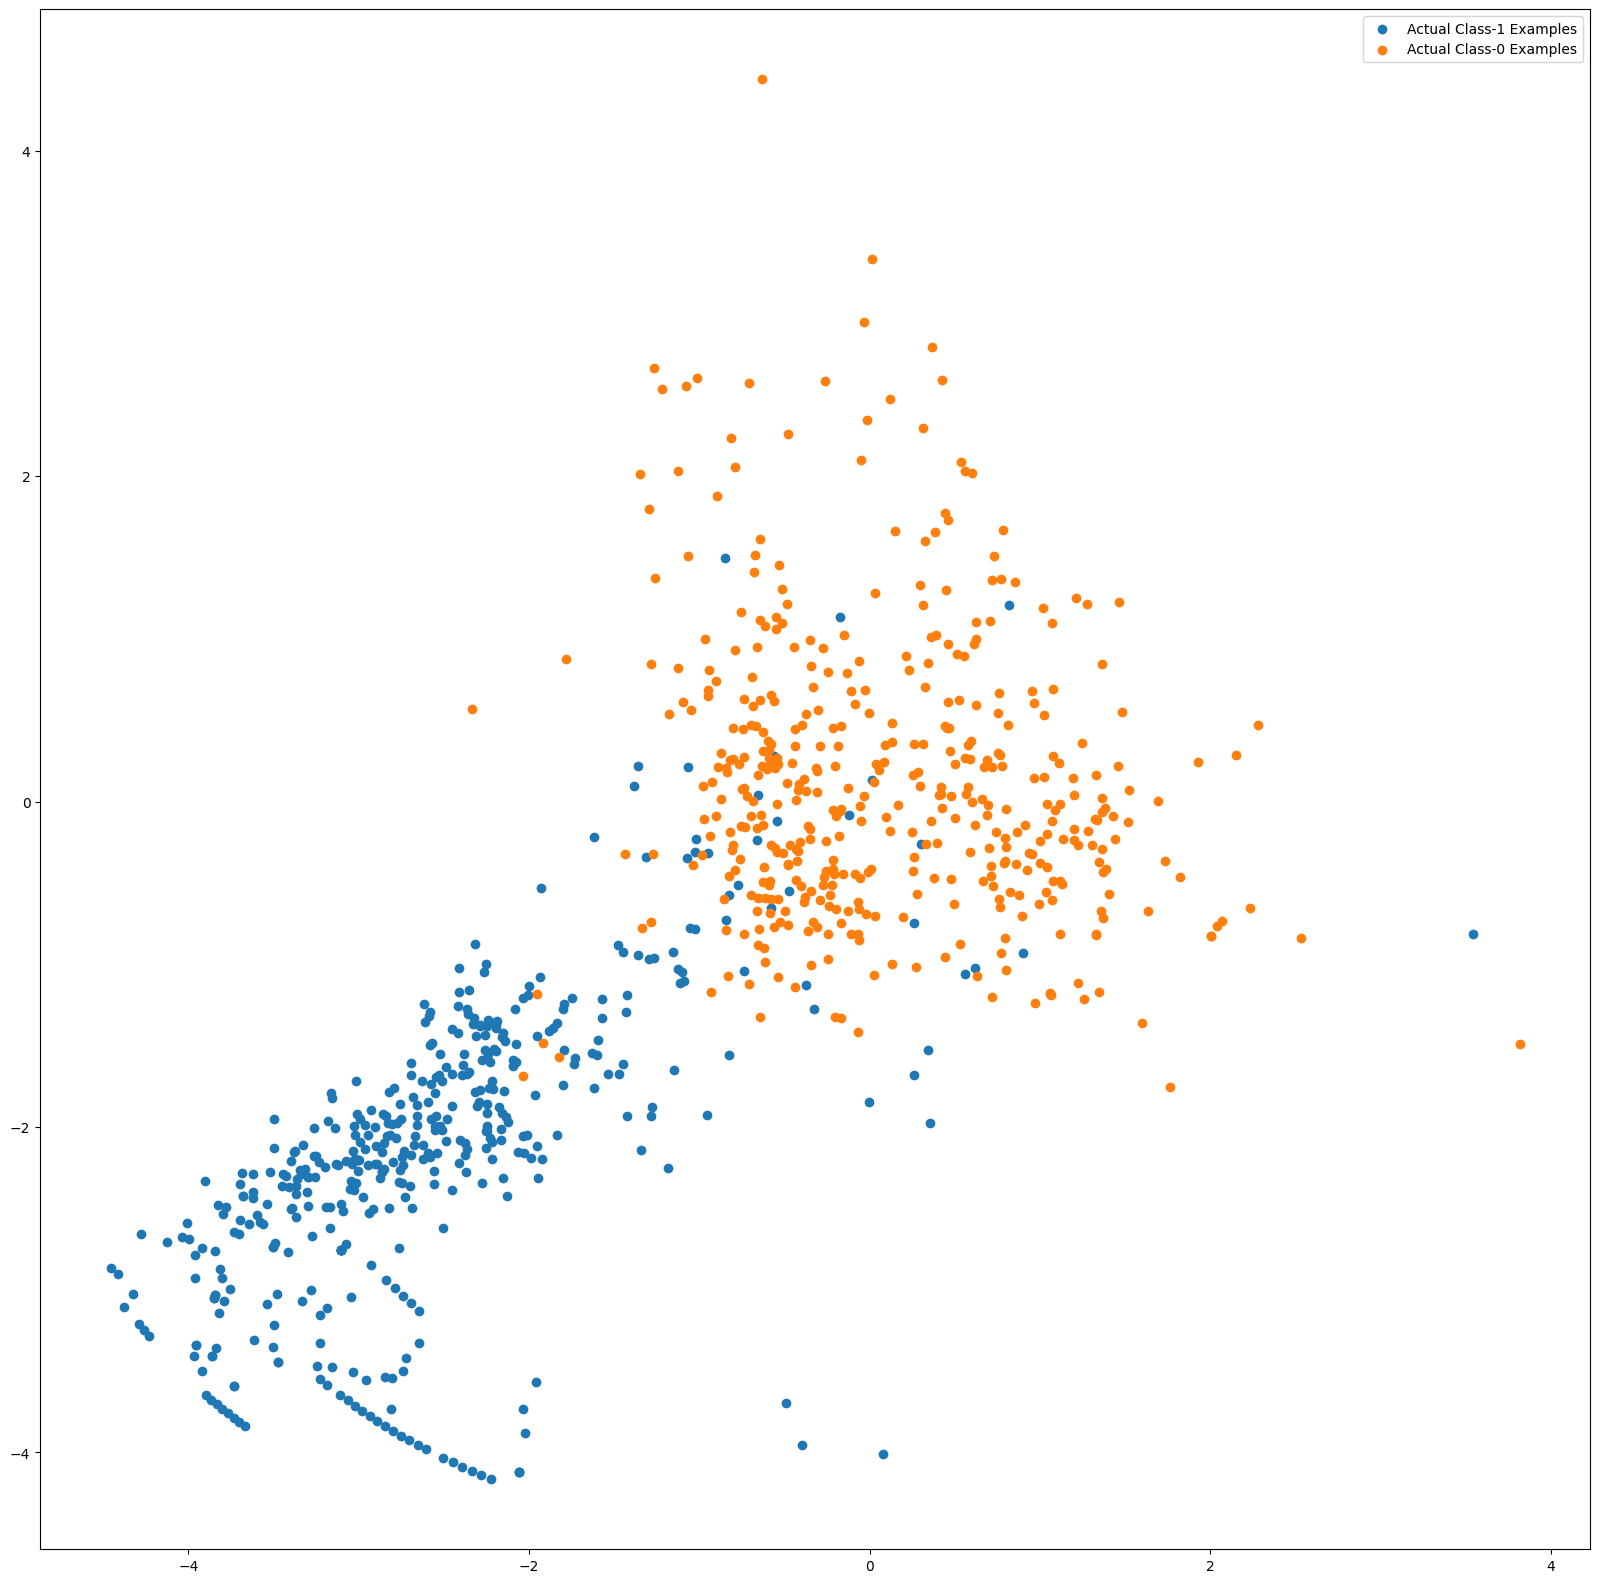

In [219]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])


X_train_pt_1 = X_train_pt[y_train_pt == 1.0]
X_train_pt_0 = X_train_pt[y_train_pt == 0.0]

np.random.shuffle(X_train_pt_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_pt_1[:, top_var_index], X_train_pt_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], top_var_index], X_train_pt_0[:X_train_pt_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#**Model For each Type of OverSampling**

#**1. Logistic Regression**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>Logistic Regression</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>Logistic Regression</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>Logistic Regression</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>Logistic Regression</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**2. KNeighbors Classifier**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>KNeighbors Classifier	</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>KNeighbors Classifier	</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>KNeighbors Classifier	</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>KNeighbors Classifier	</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**3. SVM.SVC**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>SVM.SVC	</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>SVM.SVC	</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>SVM.SVC	</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>SVM.SVC	</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**4. DecisionTree Classifier**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>DecisionTree Classifier		</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>DecisionTree Classifier		</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>DecisionTree Classifier	</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>DecisionTree Classifier	</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**5. RandomForest Classifier**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>RandomForest Classifier		</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>RandomForest Classifier	</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>RandomForest Classifier	</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>RandomForest Classifier	</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**6. XGB Classifier**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>XGB Classifier		</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>XGB Classifier</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>XGB Classifier</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>XGB Classifier</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

##**Observation**


* **Selecting the oversampling method which shows the best result on a model**

* **Using the best models to Predict on the test dataset**

In [220]:
# performing the best oversampling method on X_train & y_train

from sklearn.metrics import f1_score, precision_score, recall_score


print("============================================================================================================")
print("\n")

#**Logistic Regression**

In [221]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_LogisticRegression = linear_model.LogisticRegression(penalty='l2', C=0.01)
clf_LogisticRegression.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_LogisticRegression.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])

print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_LogisticRegression.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")


LogisticRegression ROC-AUC Score on Test Set = 0.9725329890992541
LogisticRegression F1-Score on Test Set = 0.7407407407407407


LogisticRegression Precision on Test Set = 0.6779661016949152


LogisticRegression Recall on Test Set = 0.8163265306122449


Time taken: 0.06 seconds




#**KNeighbors Classifier**

In [222]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
clf_KNeighborsClassifier.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_KNeighborsClassifier.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_KNeighborsClassifier.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

KNeighbors Classifier ROC-AUC Score on Test Set = 0.94205675614103
KNeighbors Classifier F1-Score on Test Set = 0.9217577706323687


KNeighbors Classifier Precision on Test Set = 0.9885057471264368


KNeighbors Classifier Recall on Test Set = 0.8634538152610441


Time taken: 0.97 seconds




#**DecisionTree Classifier**

In [223]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_DecisionTreeClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf_DecisionTreeClassifier.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_DecisionTreeClassifier.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_DecisionTreeClassifier.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

Decision Tree Classifier ROC-AUC Score on Test Set = 0.8933715534830081
Decision Tree Classifier F1-Score on Test Set = 0.885492089031912


Decision Tree Classifier Precision on Test Set = 0.9504893494530801


Decision Tree Classifier Recall on Test Set = 0.8288152610441767


Time taken: 0.62 seconds




#**XGB Classifier**

In [224]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_XGBClassifier = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc')
clf_XGBClassifier.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_XGBClassifier.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_XGBClassifier.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("\n")
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("\n")
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

XGBOOST Classifier ROC-AUC Score on Test Set = 0.975643916025548
XGBOOST Classifier F1-Score on Test Set = 0.8935589519650654


XGBOOST Classifier Precision on Test Set = 0.979066985645933


XGBOOST Classifier Recall on Test Set = 0.8217871485943775


Time taken: 0.20 seconds




#**RandomForest Classifier**


In [225]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_RandomForestClassifier = RandomForestClassifier(min_samples_split=5, n_estimators=500)
clf_RandomForestClassifier.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_RandomForestClassifier.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_RandomForestClassifier.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("Random Forest Classifier F1-Score on Test Set =", f1)
print("\n")
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")

Random Forest Classifier ROC-AUC Score on Test Set = 0.9497781537797778
Random Forest Classifier F1-Score on Test Set = 0.8918176825919825


Random Forest Classifier Precision on Test Set = 0.9842424242424243


Random Forest Classifier Recall on Test Set = 0.8152610441767069


Time taken: 91.31 seconds




#**Conclusion**

* **Best Oversampling Technique and Hyper Parameter for Each model**
  * **Best LogisticRegression Model Performance: 0.9752271442 {'C': 0.01, 'penalty': 'l2'} [None]**
  * **Best KNeighborsClassifier Model Performance: 0.9520626163 {'metric': 'manhattan', 'n_neighbors': 9} [SMOTE]**
  * **Best svm.SVC Model Performance: NA [Due to High Training Time]**
  * **Best DecisionTreeClassifier Model Performance: 0.9484931499 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} [SMOTE]**
  * **Best RandomForestClassifier Model Performance: 0.9788061953689164 {'min_samples_split': 5, 'n_estimators': 500} [SMOTE]**
  * **Best XGBClassifier Model Performance: 0.9921570289753232 {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} [SMOTE]**

#**Best Model is XGBOOST CLassifier with SMOTE: 0.992157029**

**Printing the FPR,TPR & selecting the best threshold from the roc curve**

**To choose the best threshold we will create a data frame with columns "actual_label" and "predicted_prob" on training data**

In [226]:
y_train_pred = clf_XGBClassifier.predict_proba(X_train_pt)
y_df = pd.DataFrame({'actual_label': y_train_pt, 'predicted_prob': y_train_pred[:,1]})
y_df.head()

actual_label  predicted_prob
16818      0.000000        0.000042
18536      0.000000        0.000000
9625       0.000000        0.000003
9864       0.000000        0.000000
16315      0.000000        0.000007

In [227]:
# finding the best threshold best on roc_curve to know the range for search

fpr, tpr, thresholds = metrics.roc_curve(y_train_pt, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.9890143


In [228]:
# Creating columns with different probability cutoffs

thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

actual_label  predicted_prob  0.99  0.988  0.9875  0.987  0.986  0.98  \
16818      0.000000        0.000042     0      0       0      0      0     0   
18536      0.000000        0.000000     0      0       0      0      0     0   
9625       0.000000        0.000003     0      0       0      0      0     0   
9864       0.000000        0.000000     0      0       0      0      0     0   
16315      0.000000        0.000007     0      0       0      0      0     0   

       0.97  0.9  0.8  
16818     0    0    0  
18536     0    0    0  
9625      0    0    0  
9864      0    0    0  
16315     0    0    0

In [237]:
# calculating Precision and Recall  for various probability cutoffs.
from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame({'prob': thresholds, 'precision': np.nan, 'recall': np.nan})

for i in thresholds:
    y_pred = (y_df['predicted_prob'] >= i).astype(int)
    cm = confusion_matrix(y_df['actual_label'], y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    cutoff_df.loc[cutoff_df['prob'] == i, ['precision', 'recall']] = [precision, recall]

print(cutoff_df)

      prob  precision   recall
0 0.990000   0.661290 0.836735
1 0.988000   0.640625 0.836735
2 0.987500   0.640625 0.836735
3 0.987000   0.640625 0.836735
4 0.986000   0.640625 0.836735
5 0.980000   0.630769 0.836735
6 0.970000   0.621212 0.836735
7 0.900000   0.594203 0.836735
8 0.800000   0.585714 0.836735


In [238]:
# Formula for f1 = (2*precision*recall)/(precision+recall)

f1 = (2*0.994203*0.997093)/(0.994203+0.997093)
print(f1)

0.9956459028481953


**The Threshold of "0.9880" gives a Precision of 99.42% and F1 Score of 99.56% on Training data. Let see these scores on test**

In [239]:
y_test_pred= clf_XGBClassifier.predict_proba(X_test_saved.values)
y_df = pd.DataFrame({'actual_label':y_test_saved, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.9880 else 0)
y_df.head()

actual_label  predicted_prob  predicted_label
221018      1.000000        1.000000                1
7034        0.000000        0.000000                0
6440        0.000000        0.000000                0
3188        0.000000        0.000000                0
15868       0.000000        0.000859                0

In [240]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("\n")
print("Recall:",recall)
print("\n")
print("F1 Score:",f1)
print("\n")

Precision: 0.640625


Recall: 0.8367346938775511


F1 Score: 0.7256637168141593




**We will be using this threshold as High Precision is good in predicting "Actual possitives as True Possitives".**